<a href="https://colab.research.google.com/github/Sai1721/Wash-trading-detection/blob/main/Wash_Trading_Sprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("/content/NEAR_token_transaction_data.xlsx")

In [ ]:
df.sample(10)

Transaction Hash   Blockno  \
9016   0x1d3633fe90cd60e63ee7d913e9e97dcd521d8609130f...  19690156   
9759   0x6a7c46595853ce592b8d545ccfd70e5896e55f5ce870...  19728522   
9976   0xfef6d9760256bee20e14bef5554dc2345827ccbc5b53...  19738091   
7693   0x3882091c6e68b949a2e01e79f766bc355d4c9183df0d...  19620247   
16629  0x969818f468e5df31f9394097bc717faec4aeb8d800d0...  20013434   
2400   0x3746649a1935892d350cf14a3b676b909b743ce212ee...  19270058   
10944  0x29a92bff8f3a9e3079c57a16c05091199628ce87a979...  19787613   
5877   0x8b02b09550fe796a44a9390a0e7f0905e7c309711a97...  19516029   
13771  0x09f03cc22a36056bdefd2fb78c34a3208cdb996f8a49...  19891560   
520    0xa7bd975f2ff0acaf4cbb30ca2a4408e0615b0e3e0b9e...  18951112   

       UnixTimestamp      DateTime (UTC)  \
9016      1713537863 2024-04-19 14:44:23   
9759      1714001495 2024-04-24 23:31:35   
9976      1714117007 2024-04-26 07:36:47   
7693      1712691875 2024-04-09 19:44:35   
16629     1717443551 2024-06-03 19:39:11   
2400      1708445999 2024-02-20 16:19:59   
10944     1714715471 2024-05-03 05:51:11   
5877      1711424759 2024-03-26 03:45:59   
13771     1715971523 2024-05-17 18:45:23   
520       1704580379 2024-01-06 22:32:59   

                                             From  \
9016   0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67   
9759   0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
9976   0xe37e799d5077682fa0a244d46e5649f71457bd09   
7693   0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
16629  0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67   
2400   0x74de5d4fcbf63e00296fd95d33236b9794016631   
10944  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
5877   0x1111111254eeb25477b68fb85ed929f73a960582   
13771  0x2e3e100a950a07822b7836c26ae316a033681b56   
520    0x2bbcf7a4674da27445b9a08345eda4bc9609a2f9   

                                               To      Quantity  \
9016   0x983dfba1c0724786598af0e63a9a6f94aabd24a1    300.000000   
9759   0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67    109.698787   
9976   0x983dfba1c0724786598af0e63a9a6f94aabd24a1    401.800000   
7693   0x8d27c03fa77f30af3dce552dde5babf65d14861f   1467.959694   
16629  0x983dfba1c0724786598af0e63a9a6f94aabd24a1    282.000000   
2400   0xe37e799d5077682fa0a244d46e5649f71457bd09    699.699772   
10944  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0      0.075712   
5877   0x6889de313803839ce3e15996a86167f639b4a634    570.650586   
13771  0x0000000000000000000000000000000000000000      5.100000   
520    0x0000000000000000000000000000000000000000  11517.150134   

                                      Method  
9016                                    Swap  
9759                                    Swap  
9976                                    Swap  
7693   Insert Cool Text Z8301034834361545146  
16629                                   Swap  
2400                                    Swap  
10944                                   Swap  
5877                                    Swap  
13771                       Transfer To Near  
520                         Transfer To Near

In [ ]:
df.shape

(19836, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Hash  19836 non-null  object        
 1   Blockno           19836 non-null  int64         
 2   UnixTimestamp     19836 non-null  int64         
 3   DateTime (UTC)    19836 non-null  datetime64[ns]
 4   From              19836 non-null  object        
 5   To                19836 non-null  object        
 6   Quantity          19836 non-null  float64       
 7   Method            19836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [ ]:
df.columns

Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object')

In [ ]:
df.describe().T

count                           mean                  min  \
Blockno         19836.0                19684408.376084           18909018.0   
UnixTimestamp   19836.0              1713462542.953418         1704068735.0   
DateTime (UTC)    19836  2024-04-18 17:49:02.953417984  2024-01-01 00:25:35   
Quantity        19836.0                     377.944387                  0.0   

                                25%                  50%                  75%  \
Blockno                  19465974.0           19736657.5           19937545.0   
UnixTimestamp          1710817115.0         1714099703.0         1716527195.0   
DateTime (UTC)  2024-03-19 02:58:35  2024-04-26 02:48:23  2024-05-24 05:06:35   
Quantity                    3.21358            72.444861           293.678666   

                                max             std  
Blockno                  20171862.0   322060.528145  
UnixTimestamp          1719356675.0  3898955.715296  
DateTime (UTC)  2024-06-25 23:04:35             NaN  
Quantity                   750000.0     8007.345063

In [ ]:
df.isna().sum()

Transaction Hash    0
Blockno             0
UnixTimestamp       0
DateTime (UTC)      0
From                0
To                  0
Quantity            0
Method              0
dtype: int64

In [ ]:
df.duplicated().sum()

7

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
col = df.columns

In [ ]:
for i in col:
  print(i,df[i].nunique())

Transaction Hash 9787
Blockno 8427
UnixTimestamp 8427
DateTime (UTC) 8427
From 1823
To 3273
Quantity 13329
Method 88


In [ ]:
df['Method'].value_counts()

Method
Swap                        9427
0x415565b0                  3281
-                           2562
Execute                     1030
Sell To Uniswap              759
                            ... 
Withdraw                       1
Sell Shares                    1
Buy On Uniswap V2Fork          1
I Bribe2Much Z7650399733       1
Unoswap3                       1
Name: count, Length: 88, dtype: int64

In [ ]:
df[df["Method"] == "-"]

Transaction Hash   Blockno  \
17     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
18     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
22     0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...  18912572   
23     0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...  18912669   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  18912669   
...                                                  ...       ...   
19803  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19804  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19819  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19820  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19832  0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...  20171862   

       UnixTimestamp      DateTime (UTC)  \
17        1704111995 2024-01-01 12:26:35   
18        1704111995 2024-01-01 12:26:35   
22        1704111995 2024-01-01 12:26:35   
23        1704113195 2024-01-01 12:46:35   
26        1704113195 2024-01-01 12:46:35   
...              ...                 ...   
19803     1719340607 2024-06-25 18:36:47   
19804     1719340607 2024-06-25 18:36:47   
19819     1719351035 2024-06-25 21:30:35   
19820     1719351035 2024-06-25 21:30:35   
19832     1719356675 2024-06-25 23:04:35   

                                             From  \
17     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
22     0xa6381631e0634e97e23a80a3c57f9582aa959e16   
23     0x6469b34a2a4723163c4902dbbdea728d20693c12   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
...                                           ...   
19803  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19804  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19819  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19820  0x5b93d80da1a359340d1f339fb574bdc56763f995   
19832  0x6469b34a2a4723163c4902dbbdea728d20693c12   

                                               To    Quantity Method  
17     0xa6381631e0634e97e23a80a3c57f9582aa959e16  688.722579      -  
18     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.518486      -  
22     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  688.722579      -  
23     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  689.054661      -  
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  701.284301      -  
...                                           ...         ...    ...  
19803  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  232.050000      -  
19804  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  232.050000      -  
19819  0x5b93d80da1a359340d1f339fb574bdc56763f995   55.349356      -  
19820  0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d   55.349356      -  
19832  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   81.711825      -  

[2562 rows x 8 columns]

In [ ]:
## Replacing "-" value with "Unknown"

df["Method"] = df["Method"].apply(lambda x: x.replace("-","Unknown"))

In [ ]:
df[df["Method"] == "Unknown"]

Transaction Hash   Blockno  \
17     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
18     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
22     0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...  18912572   
23     0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...  18912669   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  18912669   
...                                                  ...       ...   
19803  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19804  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19819  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19820  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19832  0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...  20171862   

       UnixTimestamp      DateTime (UTC)  \
17        1704111995 2024-01-01 12:26:35   
18        1704111995 2024-01-01 12:26:35   
22        1704111995 2024-01-01 12:26:35   
23        1704113195 2024-01-01 12:46:35   
26        1704113195 2024-01-01 12:46:35   
...              ...                 ...   
19803     1719340607 2024-06-25 18:36:47   
19804     1719340607 2024-06-25 18:36:47   
19819     1719351035 2024-06-25 21:30:35   
19820     1719351035 2024-06-25 21:30:35   
19832     1719356675 2024-06-25 23:04:35   

                                             From  \
17     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
22     0xa6381631e0634e97e23a80a3c57f9582aa959e16   
23     0x6469b34a2a4723163c4902dbbdea728d20693c12   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
...                                           ...   
19803  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19804  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19819  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19820  0x5b93d80da1a359340d1f339fb574bdc56763f995   
19832  0x6469b34a2a4723163c4902dbbdea728d20693c12   

                                               To    Quantity   Method  
17     0xa6381631e0634e97e23a80a3c57f9582aa959e16  688.722579  Unknown  
18     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.518486  Unknown  
22     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  688.722579  Unknown  
23     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  689.054661  Unknown  
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  701.284301  Unknown  
...                                           ...         ...      ...  
19803  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  232.050000  Unknown  
19804  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  232.050000  Unknown  
19819  0x5b93d80da1a359340d1f339fb574bdc56763f995   55.349356  Unknown  
19820  0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d   55.349356  Unknown  
19832  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   81.711825  Unknown  

[2562 rows x 8 columns]

# **EDA**

### **Quantity**

In [ ]:
import math

q1 = df["Quantity"].quantile(0.25)
q3 = df["Quantity"].quantile(0.75)

iqr = q3 - q1

lower_bound = max(0,q1 - 1.5 * iqr)

upper_bound = math.ceil(q3 + 1.5 * iqr)

print(f"Lower Bound: {lower_bound} \nUpper Bound: {upper_bound}")

Lower Bound: 0 
Upper Bound: 730


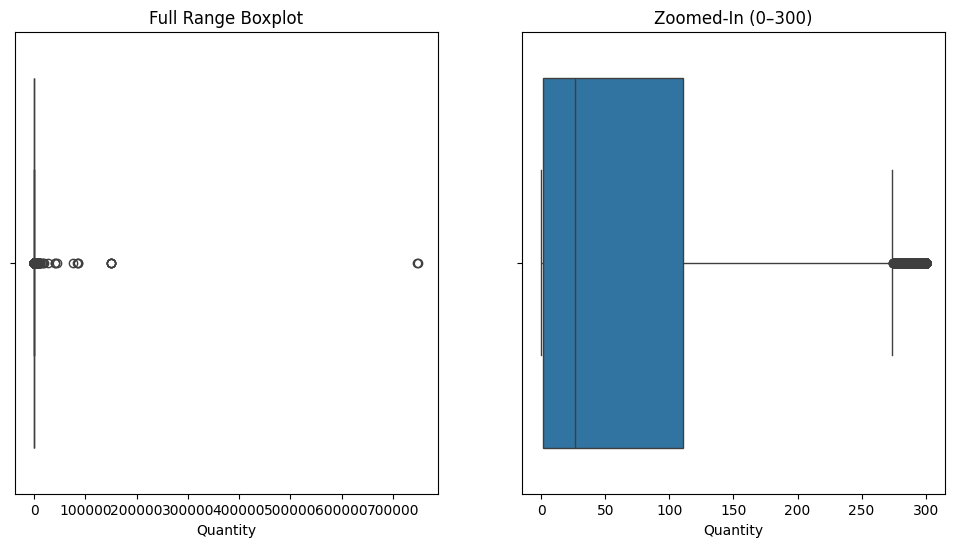

In [ ]:
plt.figure(figsize=(12, 6))

# Full range boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x = df["Quantity"])
plt.title('Full Range Boxplot')

# Zoomed-in boxplot for 75% data
plt.subplot(1, 2, 2)
sns.boxplot(x=df[df["Quantity"] <= 300]["Quantity"])
plt.title('Zoomed-In (0–300)')

plt.show()

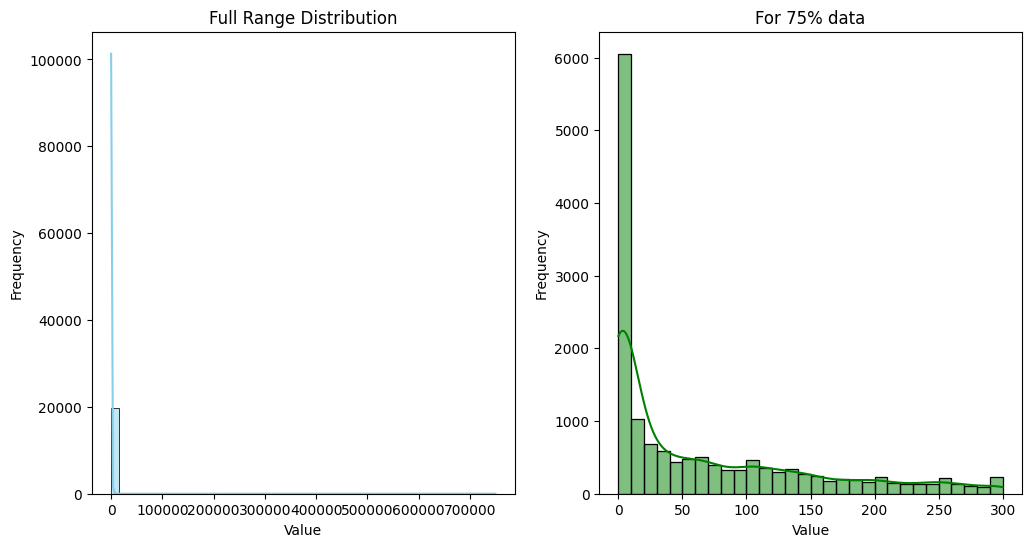

In [ ]:
plt.figure(figsize=(12, 6))

# Full range histogram
plt.subplot(1, 2, 1)
sns.histplot(x = df["Quantity"], bins=50, color='skyblue', edgecolor='black' , kde = True)
plt.title('Full Range Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Zoomed-in histogram for 75% data
plt.subplot(1, 2, 2)
sns.histplot(x=df[df["Quantity"] <= 300]["Quantity"], bins=30, color='green', kde=True)
plt.title('For 75% data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


**Outliers Analysis Using IQR**

In [ ]:
outliers = pd.DataFrame(df[(df["Quantity"] > upper_bound) | (df["Quantity"] < lower_bound)])

In [ ]:
outliers["Quantity"]

42        816.500000
48        810.034476
50        810.034476
76        991.532433
77        991.532433
            ...     
19706     758.799883
19707    1720.940369
19712     746.305913
19815     746.300000
19833    1198.366157
Name: Quantity, Length: 1686, dtype: float64

In [ ]:
print("Shape:",outliers.shape)
print("Minimum:",outliers["Quantity"].min())
print("Maximum",outliers["Quantity"].max())

Shape: (1686, 8)
Minimum: 731.0924444797905
Maximum 750000.0


**Outlier Analysis using Z-Score Method**

In [ ]:
from scipy.stats import zscore
df['Z-Score'] = zscore(df['Quantity'])
z_outliers = df[df['Z-Score'].abs() > 3]

In [ ]:
z_outliers["Quantity"]

1976      40000.000000
2034      40000.000000
6498      45200.000000
6649      26353.968605
14099     75170.000000
14108     84956.000000
14109     84956.000000
14110     84744.585000
14238    150000.000000
14239    150000.000000
14334    150000.000000
14335    150000.000000
14336    150000.000000
15829    750000.000000
15830    748125.000000
Name: Quantity, dtype: float64

In [ ]:
print("Shape:",z_outliers.shape)
print("Minimum:",z_outliers["Quantity"].min())
print("Maximum",z_outliers["Quantity"].max())

Shape: (15, 9)
Minimum: 26353.9686053412
Maximum 750000.0


### **Method**

In [ ]:
df["Method"].nunique()

88

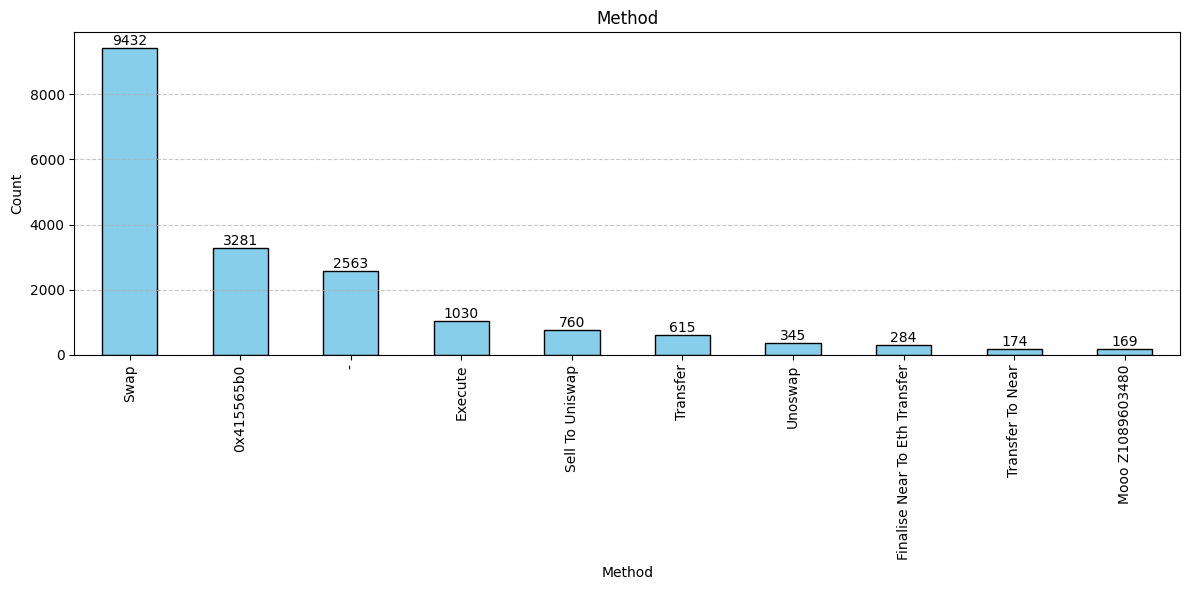

In [ ]:
plt.figure(figsize=(12, 6))
top_10 = df["Method"].value_counts().head(10)
top_10.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Method")
plt.xlabel("Method")
plt.ylabel("Count")
for i, count in enumerate(top_10):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **To column**

In [ ]:
###Check for the valid length of Ethereum Address

invalid_addresses = df[(df['To'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


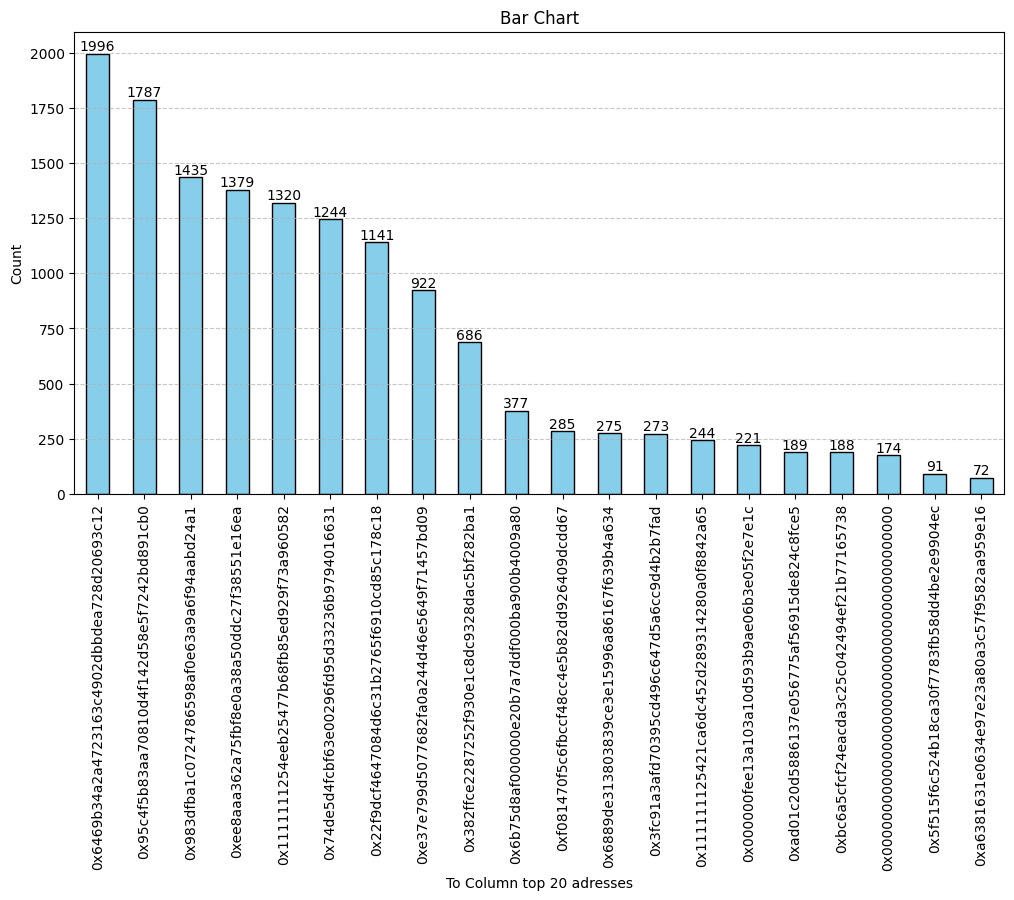

In [ ]:
plt.figure(figsize=(12, 6))
top_20_in_TO_col = df["To"].value_counts().head(20)
top_20_in_TO_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("To Column top 20 adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_in_TO_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **From column**

In [ ]:
### checking for the valid length of ethereum address
invalid_addresses = df[(df['From'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


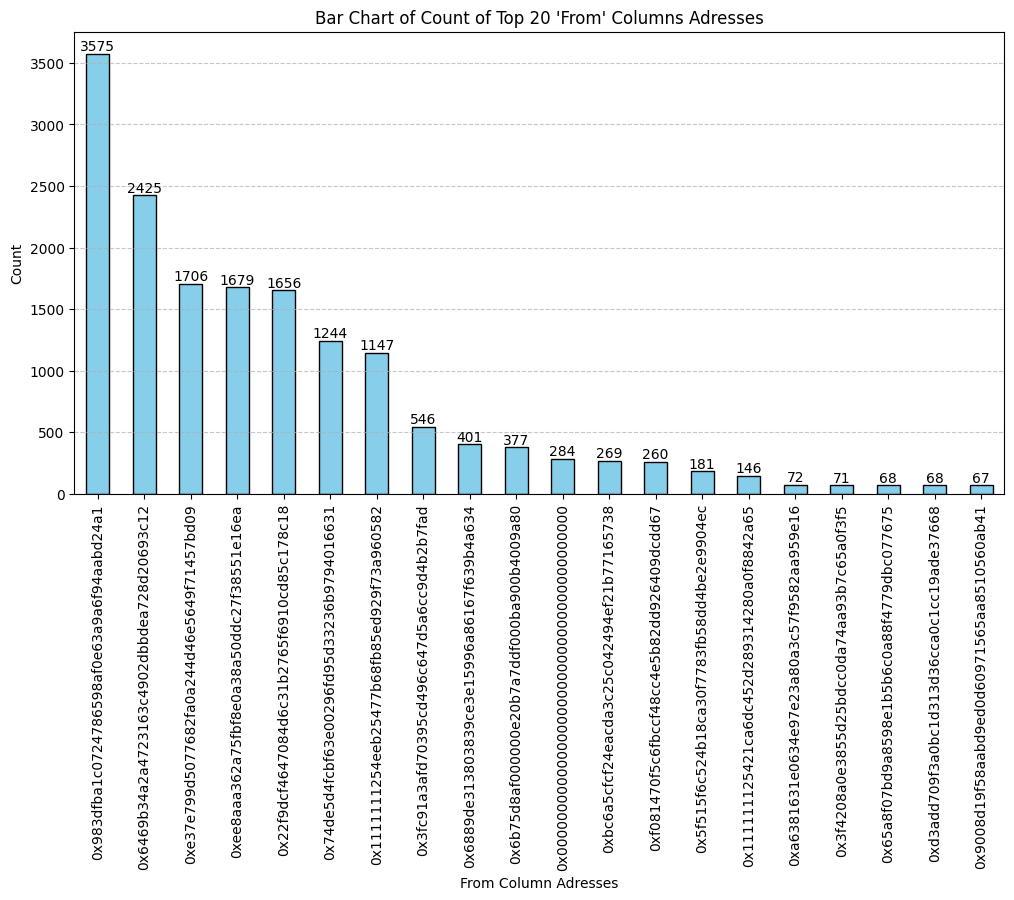

In [ ]:
plt.figure(figsize=(12, 6))
top_20_from_col = df["From"].value_counts().head(20)
top_20_from_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart of Count of Top 20 'From' Columns Adresses")
plt.xlabel("From Column Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_from_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Blockno**

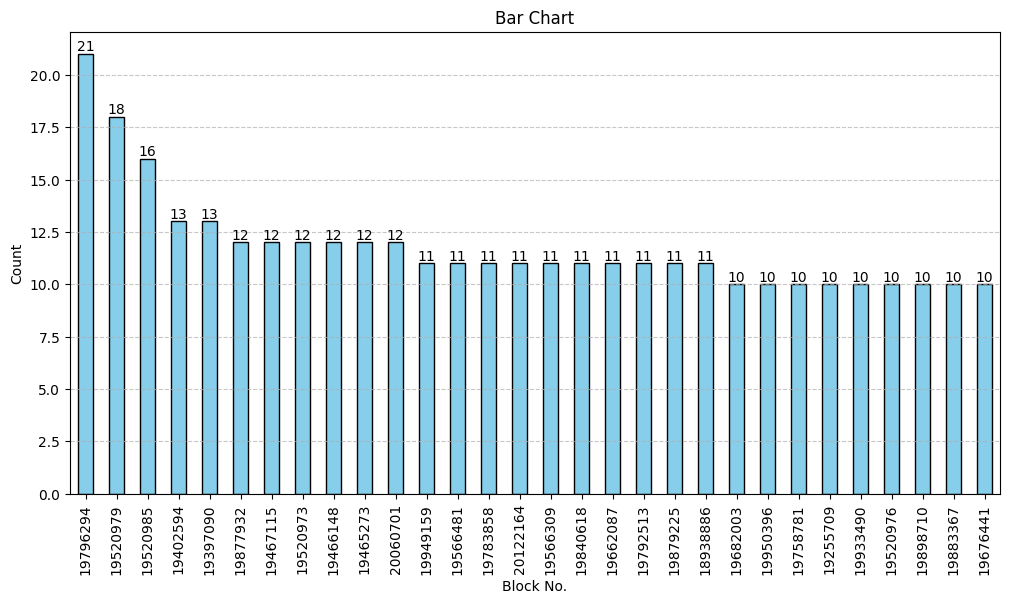

In [ ]:
plt.figure(figsize=(12, 6))
top_30_blocks = df["Blockno"].value_counts().head(30)
top_30_blocks.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Block No.")
plt.ylabel("Count")
for i, count in enumerate(top_30_blocks):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Transaction Hash**

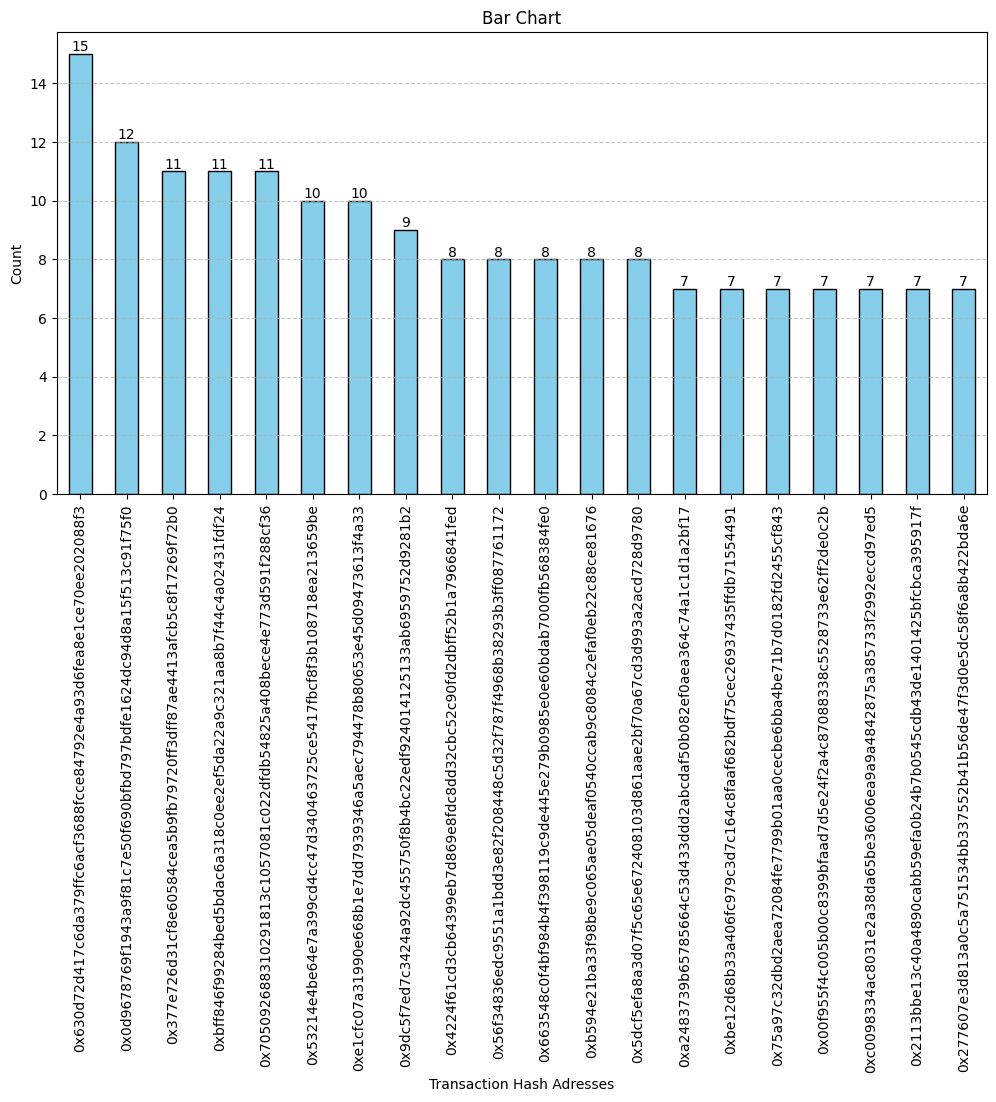

In [ ]:
plt.figure(figsize=(12, 6))
top_20_hash_transactions = df["Transaction Hash"].value_counts().head(20)
top_20_hash_transactions.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Transaction Hash Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_hash_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Bivariate Analysis**

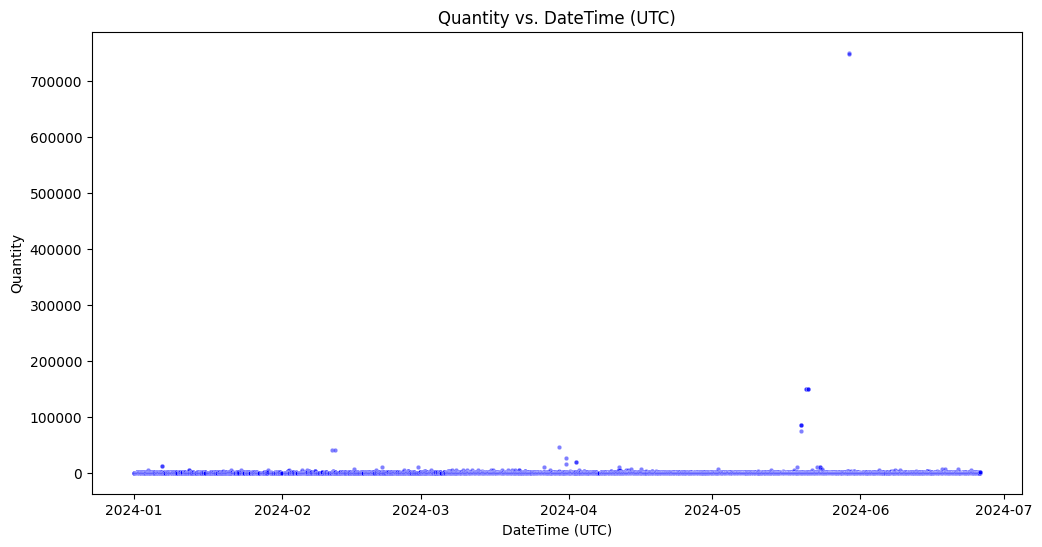

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df['DateTime (UTC)'], y =df['Quantity'], alpha=0.5, color='blue', s=10)
plt.title("Quantity vs. DateTime (UTC)")
plt.xlabel("DateTime (UTC)")
plt.ylabel("Quantity")
plt.show()

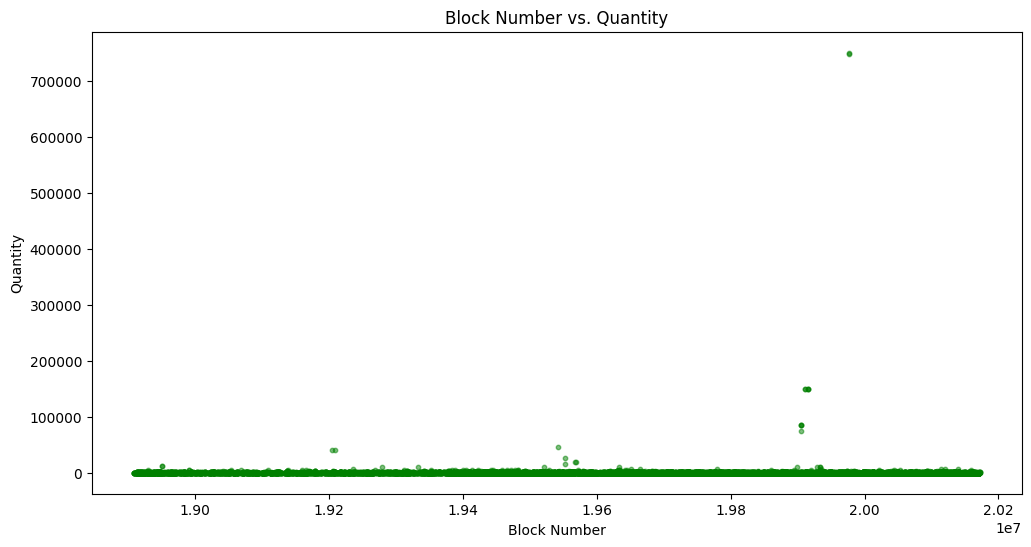

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Blockno'], df['Quantity'], alpha=0.5, color='green', s=10)
plt.title("Block Number vs. Quantity")
plt.xlabel("Block Number")
plt.ylabel("Quantity")
plt.show()


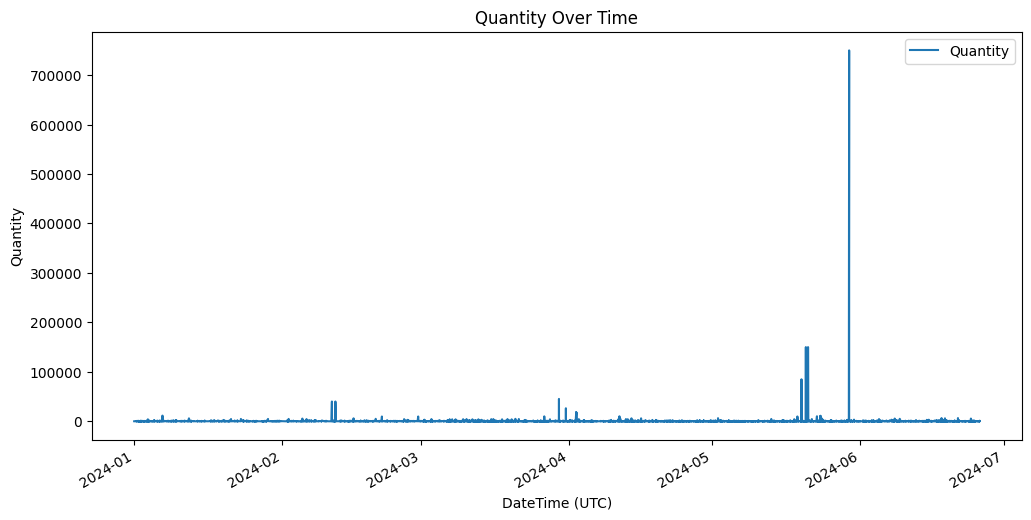

In [ ]:
df.sort_values('DateTime (UTC)').plot(x='DateTime (UTC)', y='Quantity', kind='line', figsize=(12, 6))
plt.title('Quantity Over Time')
plt.xlabel('DateTime (UTC)')
plt.ylabel('Quantity')
plt.show()


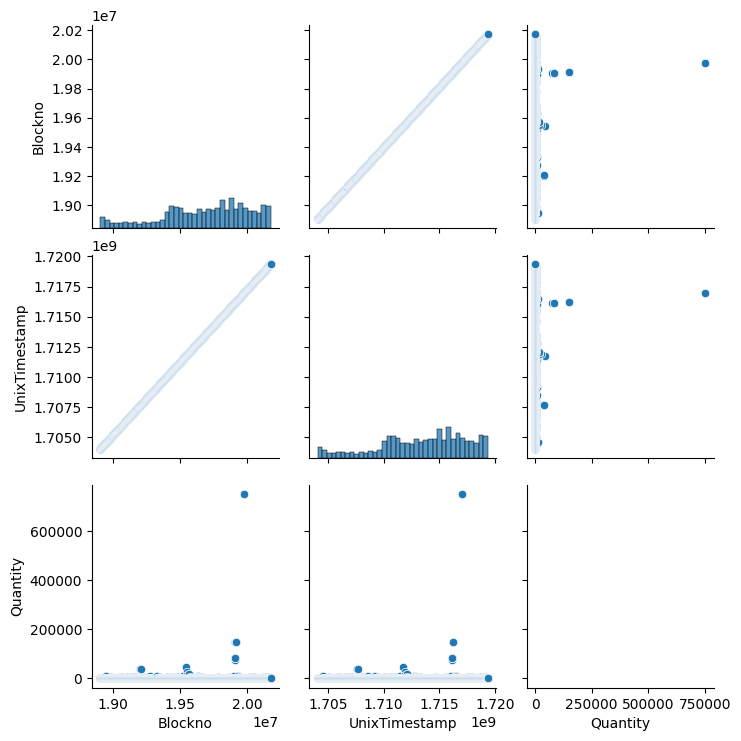

In [ ]:
sns.pairplot(df[['Blockno', 'UnixTimestamp', 'Quantity']])
plt.show()


# **Feature Engineering**

In [ ]:
data = df.copy()  ## making deep copy of df dataframe

In [ ]:
### Creating new features from DateTime column

def new_features_from_DateTime(df):
  data = df.assign(
    month=df["DateTime (UTC)"].dt.month,
    date=df["DateTime (UTC)"].dt.day,
    hour=df["DateTime (UTC)"].dt.hour,
    day_of_week=df["DateTime (UTC)"].dt.day_name(),
    is_weekend=(df["DateTime (UTC)"].dt.dayofweek >= 5).astype(int)
)
  return data

data = new_features_from_DateTime(df)


data.sample(5)


Transaction Hash   Blockno  \
15109  0x2fa45b7af72b538e4bc552b6cd606f9d1605825137f3...  19947546   
8007   0x569657fd16af13e58af9b601e961b87ac189deb409d5...  19639237   
1873   0x487a6aafb92e6df9fbf13588d6e499868b1c2eea9872...  19179025   
17869  0x766ea0ef82c6d8007b88f4f8e25b6e2c10ada85b902b...  20086849   
16977  0xb511edb332b9945bef74c1656542fcbe506d0683f025...  20033832   

       UnixTimestamp      DateTime (UTC)  \
15109     1716648011 2024-05-25 14:40:11   
8007      1712921375 2024-04-12 11:29:35   
1873      1707341699 2024-02-07 21:34:59   
17869     1718329535 2024-06-14 01:45:35   
16977     1717689527 2024-06-06 15:58:47   

                                             From  \
15109  0x74de5d4fcbf63e00296fd95d33236b9794016631   
8007   0x6b75d8af000000e20b7a7ddf000ba900b4009a80   
1873   0x1111111254eeb25477b68fb85ed929f73a960582   
17869  0xefc56498598aa3ff0857d9e7edf84f2242603f99   
16977  0xe37e799d5077682fa0a244d46e5649f71457bd09   

                                               To      Quantity    Method  \
15109  0xf547d2e8c34a35046e67fa0d42b66ec0cfc73f2e  7.570927e+02      Swap   
8007   0x6469b34a2a4723163c4902dbbdea728d20693c12  7.408213e+01   Unknown   
1873   0x6889de313803839ce3e15996a86167f639b4a634  1.118027e+03      Swap   
17869  0x6ff7c06f2dfba12a3b45fe99ceca4cf420a99ec7  2.352400e-15  Transfer   
16977  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  1.342281e+02      Swap   

        Z-Score  month  date  hour day_of_week  is_weekend  
15109  0.047326      5    25    14    Saturday           1  
8007  -0.037959      4    12    11      Friday           0  
1873   0.092395      2     7    21   Wednesday           0  
17869 -0.047209      6    14     1      Friday           0  
16977 -0.030448      6     6    15    Thursday           0

In [ ]:
# Define bins and labels based on the statistics of quantity column
bins = [0, 3.21358, 72.444861, 293.678666, 1000 , float('inf')]  # Min, 25%, 50%, 75%, Max
labels = ["Very Low", "Low", "Medium", "High" , "Very High"]

# Create a new column for Quantity categories
data["Quantity Category"] = pd.cut(data["Quantity"], bins=bins, labels=labels)

# Check the distribution
print(data["Quantity Category"].value_counts())


Quantity Category
Medium       4959
Low          4956
Very Low     4947
High         4224
Very High     735
Name: count, dtype: int64


In [ ]:
# Flag high quantity transactions
data["High Quantity Flag"] = (data["Quantity"] > 294).astype(int)  ### Here we take threshold as 75% quantile of the Quantity column

# Check if From and To addresses are the same (self-transaction)
data["Is Self Transaction"] = (data["From"] == data["To"]).astype(int)

In [ ]:
data.sample(10)

Transaction Hash   Blockno  \
7934   0xd8389858e923e28c4de2b3b73360801634b91cae8b99...  19633916   
10868  0xc9298eff7511198872101eedcc94240b274bcfef597d...  19784754   
12941  0x5d25726c6d5ec6a783123203771be0ebcd1ab055be0b...  19867562   
14056  0xcb929499c86ac2eec40cbe32e65c703e8f0f2100c48d...  19903302   
10049  0x9770acd8e7b679e881b9e456a11bff1e7562fc21528f...  19743423   
17528  0x3a2922f8ce75f50e3c4e423ce0d1dd21ebbdd55218b6...  20066438   
19154  0x2c1a6691e522e5c1900eba7446ab1d5fe7a3f438b459...  20146309   
12962  0x18101f810a8ca9834f75d2b4a22c0c94d04a5d81b918...  19868995   
4824   0xfe6ad764a4ba4f13a9710ab0b7db97a7aef2614b47b1...  19459801   
1275   0x259b955cc3cdb80fff81429257f60dc81390d4d3b91e...  19077299   

       UnixTimestamp      DateTime (UTC)  \
7934      1712857103 2024-04-11 17:38:23   
10868     1714680923 2024-05-02 20:15:23   
12941     1715681375 2024-05-14 10:09:35   
14056     1716113459 2024-05-19 10:10:59   
10049     1714181627 2024-04-27 01:33:47   
17528     1718082995 2024-06-11 05:16:35   
19154     1719047987 2024-06-22 09:19:47   
12962     1715698907 2024-05-14 15:01:47   
4824      1710742103 2024-03-18 06:08:23   
1275      1706108999 2024-01-24 15:09:59   

                                             From  \
7934   0x1d9ce8dbeeb6a5da0fd8415da34f03347a3b90c4   
10868  0xa13dcb946e4ee1375def87db40f622cd3e300be7   
12941  0x663dc15d3c1ac63ff12e45ab68fea3f0a883c251   
14056  0xad3b67bca8935cb510c8d18bd45f0b94f54a968f   
10049  0xe69e7d52c133f1fe56fe80613cb158037c509254   
17528  0xb1f178411cb01677a04d39663dedcbdb3e518334   
19154  0xe37e799d5077682fa0a244d46e5649f71457bd09   
12962  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
4824   0x6889de313803839ce3e15996a86167f639b4a634   
1275   0xe37e799d5077682fa0a244d46e5649f71457bd09   

                                               To    Quantity  \
7934   0x8ef9f2eea0d132aee28d2afac01947e2602606c8  119.848187   
10868  0xe37e799d5077682fa0a244d46e5649f71457bd09   50.405566   
12941  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  168.652246   
14056  0xf0a29b15ecd6b865c1d6326a971b913f9732459f  296.337505   
10049  0x6469b34a2a4723163c4902dbbdea728d20693c12   10.002248   
17528  0x9ba3f47fe7f5a12562ba0a4a5645d8bf9ea1dd8e    5.583132   
19154  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  150.000000   
12962  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   35.041328   
4824   0xe37e799d5077682fa0a244d46e5649f71457bd09  600.000000   
1275   0x6469b34a2a4723163c4902dbbdea728d20693c12  180.000000   

                       Method   Z-Score  month  date  hour day_of_week  \
7934                 Transfer -0.032244      4    11    17    Thursday   
10868                    Swap -0.040915      5     2    20    Thursday   
12941  Strictly Swap And Call -0.026150      5    14    10     Tuesday   
14056                 Unknown -0.010206      5    19    10      Sunday   
10049                 Unoswap -0.045960      4    27     1    Saturday   
17528                 Execute -0.046512      6    11     5     Tuesday   
19154                    Swap -0.028479      6    22     9    Saturday   
12962              0x415565b0 -0.042834      5    14    15     Tuesday   
4824                     Swap  0.027711      3    18     6      Monday   
1275                     Swap -0.024733      1    24    15   Wednesday   

       is_weekend Quantity Category  High Quantity Flag  Is Self Transaction  
7934            0            Medium                   0                    0  
10868           0               Low                   0                    0  
12941           0            Medium                   0                    0  
14056           1              High                   1                    0  
10049           1               Low                   0                    0  
17528           0               Low                   0                    0  
19154           1            Medium                   0                    0  
12962           0               Low  

In [ ]:
# Calculate Z-Score for 'Quantity' and add it to the 'data' DataFrame
from scipy.stats import zscore
data['Z-Score'] = zscore(data['Quantity'])

# Now you can flag outliers based on Z-Score
data["Is Outlier"] = (data["Z-Score"].abs() > 3).astype(int)

In [ ]:
data["Log Quantity"] = np.log1p(data["Quantity"])   ## For Handle Skewness in the Quantity colummn

In [ ]:
# Count transactions per address
data["From Activity Count"] = data["From"].map(data["From"].value_counts())
data["To Activity Count"] = data["To"].map(data["To"].value_counts())

# Count unique addresses
print(data["From"].nunique())
print(data["To"].nunique())


1823
3273


In [ ]:
# Sort by wallet and DateTime
data = data.sort_values(by=["From", "DateTime (UTC)"])

# Cumulative sum of Quantity per wallet
data["Cumulative Quantity"] = data.groupby("From")["Quantity"].cumsum()


In [ ]:
data.sample(10)

Transaction Hash   Blockno  \
8120   0x78b59f5f6aaa46aa448678652a6e01d55c9be308fb14...  19644659   
8784   0xf4b8e6ab276cfd69115b36a6f7ab22bcf922dc1630d1...  19677726   
6155   0xa19bb3715cb2bfbabd19e029de7cfe3b80a010f78f32...  19522756   
13034  0xca9521a15c4d9d5624b86dc1c10fdef7a3cf1e0b8a19...  19874396   
3202   0xe787c1124453164cd82b3aaabbe762db63af9376f896...  19387058   
246    0x9d70b9b02597680052aecaaf07ebeb0235b20db0415b...  18925966   
16982  0xee249160228b0b80320dbc2d4371a21432fa1aa16ce1...  20033838   
7484   0x64fdc9cda6f5f424aba40c1c3bf7e88ad0b3eeeb35ae...  19608728   
4734   0xa8ce7531babcb16d267e1a95b9db06a1a7e727b77481...  19457953   
9647   0x42667a0268f041f35c57438b19228e350cec94866457...  19722448   

       UnixTimestamp      DateTime (UTC)  \
8120      1712987195 2024-04-13 05:46:35   
8784      1713387479 2024-04-17 20:57:59   
6155      1711506815 2024-03-27 02:33:35   
13034     1715764247 2024-05-15 09:10:47   
3202      1709859959 2024-03-08 01:05:59   
246       1704274391 2024-01-03 09:33:11   
16982     1717689599 2024-06-06 15:59:59   
7484      1712552399 2024-04-08 04:59:59   
4734      1710719639 2024-03-17 23:53:59   
9647      1713927947 2024-04-24 03:05:47   

                                             From  \
8120   0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
8784   0xe37e799d5077682fa0a244d46e5649f71457bd09   
6155   0x6469b34a2a4723163c4902dbbdea728d20693c12   
13034  0x6469b34a2a4723163c4902dbbdea728d20693c12   
3202   0x74de5d4fcbf63e00296fd95d33236b9794016631   
246    0x6469b34a2a4723163c4902dbbdea728d20693c12   
16982  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
7484   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
4734   0x6469b34a2a4723163c4902dbbdea728d20693c12   
9647   0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   

                                               To    Quantity  \
8120   0x6b75d8af000000e20b7a7ddf000ba900b4009a80  772.162925   
8784   0x382ffce2287252f930e1c8dc9328dac5bf282ba1   12.985808   
6155   0x74de5d4fcbf63e00296fd95d33236b9794016631   42.241306   
13034  0x1111111254eeb25477b68fb85ed929f73a960582    0.001267   
3202   0x111eeedc5fb4023862d1462ab96b3223e8c2f17a    1.909696   
246    0xc4cd4c7214aa9f00a2a45662b549eadb12a869e1    6.925098   
16982  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.239912   
7484   0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.285803   
4734   0x9e79bd09b514d34c8d585c35154df68657b3f159    0.940079   
9647   0x5f515f6c524b18ca30f7783fb58dd4be2e9904ec  473.006248   

                                                  Method   Z-Score  month  \
8120                                             Unknown  0.049208      4   
8784                                                Swap -0.045588      4   
6155                                                Swap -0.041935      3   
13034                                               Swap -0.047209      5   
3202                                                Swap -0.046971      3   
246                                      Sell To Uniswap -0.046344      1   
16982  Get Initialization Code From Contract Runtime_... -0.047179      6   
7484                                                Swap -0.047173      4   
4734                                             Unoswap -0.047092      3   
9647                                                Swap  0.011854      4   

       ...  day_of_week  is_weekend Quantity Category  High Quantity Flag  \
8120   ...     Saturday           1              High                   1   
8784   ...    Wednesday           0               Low                   0   
6155   ...    Wednesday           0               Low                   0   
13034  ...    Wednesday           0          Very Low                   0   
3202   ...       Friday           0          Very Low                   0   
246    ...    Wednesday           0               Low                   0   
16982  ...     Thursday           0          Very Low                   0   
7484   ...       Mon

**Network analysis**

In [ ]:
import networkx as nx
import pandas as pd


In [ ]:
#Create a directed graph from the 'From' and 'To' columns
G = nx.DiGraph()

# Add edges with weights if required (e.g., using 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Calculate centralities
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Map centralities back to the DataFrame
# Create new columns in the DataFrame to store centrality measures for 'From' nodes
data['from_degree_centrality'] = data['From'].map(degree_centrality)
data['from_betweenness_centrality'] = data['From'].map(betweenness_centrality)
data['from_closeness_centrality'] = data['From'].map(closeness_centrality)

# Similarly, create columns for 'To' nodes
data['to_degree_centrality'] = data['To'].map(degree_centrality)
data['to_betweenness_centrality'] = data['To'].map(betweenness_centrality)
data['to_closeness_centrality'] = data['To'].map(closeness_centrality)



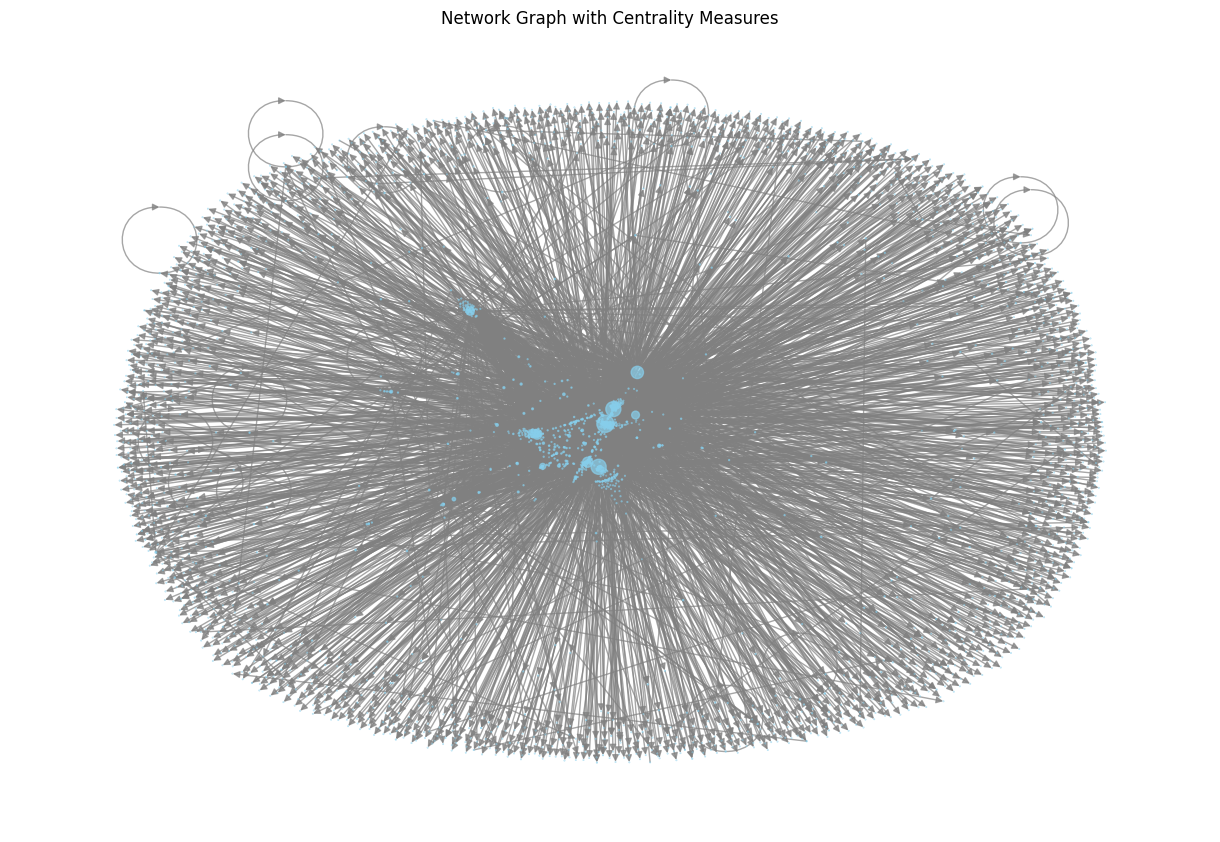

In [ ]:
# Ensure the DataFrame has the feature-engineered columns, including 'From' and 'To'

# Step 1: Create a directed graph from the 'From' and 'To' columns
G = nx.DiGraph()

# Add edges with weights if required (e.g., using 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Step 2: Visualize the graph
plt.figure(figsize=(12, 8))

# Draw the network
# Node size is proportional to degree centrality
node_sizes = [500 * nx.degree_centrality(G)[node] for node in G.nodes()]
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]  # Scale for visualizing edge weights

# Using a spring layout for better spacing of nodes
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    node_size=node_sizes,
    node_color='skyblue',
    edge_color='gray',
    width=1.0,
    alpha=0.7,
    font_size=10
)

# Display the plot
plt.title("Network Graph with Centrality Measures")
plt.show()


In [ ]:
import plotly.graph_objects as go
import networkx as nx

# Assuming 'G' is your networkx graph and 'data' is your DataFrame

# 1. Create node positions for visualization
pos = nx.spring_layout(G)  # You can experiment with other layout algorithms

# 2. Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# 3. Create node traces
node_x = []
node_y = []
node_text = []  # To display node information on hover
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"Address: {node}<br>Degree: {G.degree(node)}")
    # Customize hover text with relevant information

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu', # Choose a colorscale
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# 4. Color nodes based on degree centrality (or other metrics)
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f"Address: {adjacencies[0]}<br>Degree: {len(adjacencies[1])}") # Customize hover text

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# 5. Create the figure and add traces
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='NEAR Token Transaction Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

**Analysis of data**

In [ ]:
data.sample(5)

Transaction Hash  \
DateTime                                                                 
2024-02-23 15:04:59  0x7ce23b4594a073f5a4d080c9b1d996692f26b02c7c0e...   
2024-04-03 07:09:47  0xa9f9cb72b6853c5431b91538c699830bb8867404b6e9...   
2024-01-25 21:04:35  0x42413014d8657c355b5b831f4a391a549f4c5ae3719f...   
2024-01-01 17:43:23  0x5746abd96e36c5b453e29b286ba7bdda0822e0227e94...   
2024-06-18 03:42:11  0x37bc2bed2f9e4f04550f4beca2304ab5c5b9c237c148...   

                      Blockno  UnixTimestamp      DateTime (UTC)  \
DateTime                                                           
2024-02-23 15:04:59  19291068     1708700699 2024-02-23 15:04:59   
2024-04-03 07:09:47  19573669     1712128187 2024-04-03 07:09:47   
2024-01-25 21:04:35  19086195     1706216675 2024-01-25 21:04:35   
2024-01-01 17:43:23  18914142     1704131003 2024-01-01 17:43:23   
2024-06-18 03:42:11  20116040     1718682131 2024-06-18 03:42:11   

                                                           From  \
DateTime                                                          
2024-02-23 15:04:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2024-04-03 07:09:47  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2024-01-25 21:04:35  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
2024-01-01 17:43:23  0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675   
2024-06-18 03:42:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                                             To    Quantity  \
DateTime                                                                      
2024-02-23 15:04:59  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.458544   
2024-04-03 07:09:47  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.099769   
2024-01-25 21:04:35  0xe2d7e8f139902b31444d37b471dd12741bdc3d09  234.293171   
2024-01-01 17:43:23  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  816.500000   
2024-06-18 03:42:11  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.269060   

                         Method  month  date  ...  Log Quantity  \
DateTime                                      ...                 
2024-02-23 15:04:59        Swap      2    23  ...      0.377438   
2024-04-03 07:09:47           -      4     3  ...      0.095100   
2024-01-25 21:04:35  0x415565b0      1    25  ...      5.460832   
2024-01-01 17:43:23  0x415565b0      1     1  ...      6.706251   
2024-06-18 03:42:11  0x415565b0      6    18  ...      0.238276   

                    From Activity Count  To Activity Count  \
DateTime                                                     
2024-02-23 15:04:59                3575               1787   
2024-04-03 07:09:47                3575               1787   
2024-01-25 21:04:35                1656                  2   
2024-01-01 17:43:23                  68               1141   
2024-06-18 03:42:11                3575               1787   

                    Cumulative Quantity  from_degree_centrality  \
DateTime                                                          
2024-02-23 15:04:59       145990.645142                0.034708   
2024-04-03 07:09:47       408475.425622                0.034708   
2024-01-25 21:04:35        53176.616350                0.235562   
2024-01-01 17:43:23          816.500000                0.003129   
2024-06-18 03:42:11       618780.685982                0.034708   

                     from_betweenness_centrality  from_closeness_centrality  \
DateTime                                                                      
2024-02-23 15:04:59                     0.019162                   0.212838   
2024-04-03 07:09:47                     0.019162                   0.212838   
2024-01-25 21:04:35                     0.168209                   0.209364   
2024-01-01 17:43:23                     0.000000                   0.158257   
2024-06-18 03:42:11                     0.019162                   0.212838   

                     to_degree_centrality  to_betweenness_centrality  \
DateTime                         

In [ ]:
data.isnull().sum()

Transaction Hash               0
Blockno                        0
UnixTimestamp                  0
DateTime (UTC)                 0
From                           0
To                             0
Quantity                       0
Method                         0
month                          0
date                           0
hour                           0
day_of_week                    0
is_weekend                     0
Quantity Category              8
High Quantity Flag             0
Is Self Transaction            0
Log Quantity                   0
From Activity Count            0
To Activity Count              0
Cumulative Quantity            0
from_degree_centrality         0
from_betweenness_centrality    0
from_closeness_centrality      0
to_degree_centrality           0
to_betweenness_centrality      0
to_closeness_centrality        0
dtype: int64

In [ ]:
data.describe()

Blockno  UnixTimestamp                 DateTime (UTC)  \
count  1.983600e+04   1.983600e+04                          19836   
mean   1.968441e+07   1.713463e+09  2024-04-18 17:49:02.953417728   
min    1.890902e+07   1.704069e+09            2024-01-01 00:25:35   
25%    1.946597e+07   1.710817e+09            2024-03-19 02:58:35   
50%    1.973666e+07   1.714100e+09            2024-04-26 02:48:23   
75%    1.993754e+07   1.716527e+09            2024-05-24 05:06:35   
max    2.017186e+07   1.719357e+09            2024-06-25 23:04:35   
std    3.220605e+05   3.898956e+06                            NaN   

            Quantity         month          date          hour    is_weekend  \
count   19836.000000  19836.000000  19836.000000  19836.000000  19836.000000   
mean      377.944387      4.092257     15.549808     11.954073      0.288314   
min         0.000000      1.000000      1.000000      0.000000      0.000000   
25%         3.213580      3.000000      8.000000      5.000000      0.000000   
50%        72.444861      4.000000     16.000000     13.000000      0.000000   
75%       293.678666      5.000000     23.000000     18.000000      1.000000   
max    750000.000000      6.000000     31.000000     23.000000      1.000000   
std      8007.345063      1.472873      8.426810      7.159401      0.452989   

       High Quantity Flag  Is Self Transaction  Log Quantity  \
count        19836.000000         19836.000000  19836.000000   
mean             0.249546             0.001966      3.753222   
min              0.000000             0.000000      0.000000   
25%              0.000000             0.000000      1.438313   
50%              0.000000             0.000000      4.296535   
75%              0.000000             0.000000      5.685885   
max              1.000000             1.000000     13.527830   
std              0.432761             0.044298      2.335269   

       From Activity Count  To Activity Count  Cumulative Quantity  \
count         19836.000000       19836.000000         1.983600e+04   
mean           1558.956745         891.886671         1.713438e+05   
min               1.000000           1.000000         0.000000e+00   
25%             284.000000          21.000000         1.935713e+04   
50%            1656.000000        1141.000000         1.308580e+05   
75%            2425.000000        1435.000000         2.720404e+05   
max            3575.000000        1996.000000         1.271448e+06   
std            1225.082804         725.459580         1.728552e+05   

       from_degree_centrality  from_betweenness_centrality  \
count            19836.000000                 19836.000000   
mean                 0.107345                     0.093251   
min                  0.000284                     0.000000   
25%                  0.006543                     0.002834   
50%                  0.070555                     0.045942   
75%                  0.234993                     0.140243   
max                  0.302418                     0.373287   
std                  0.106419                     0.117657   

       from_closeness_centrality  to_degree_centrality  \
count               19836.000000          19836.000000   
mean                    0.190624              0.085812   
min                     0.000000              0.000284   
25%                     0.162960              0.000853   
50%                     0.209364              0.011949   
75%                     0.213470              0.157610   
max                     0.234901              0.302418   
std                     0.042784              0.107406   

       to_betweenness_centrality  to_closeness_centrality  
count               19836.000000             19836.000000  
mean                    0.074193                 0.177424  
min                     0.000000                 0.000000  
25%                     0.000000                 0.144766  
50%                     0.012924                 0.176537  
75%                

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19836 entries, 2024-01-01 10:30:59 to 2024-05-01 02:30:35
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction Hash             19836 non-null  object        
 1   Blockno                      19836 non-null  int64         
 2   UnixTimestamp                19836 non-null  int64         
 3   DateTime (UTC)               19836 non-null  datetime64[ns]
 4   From                         19836 non-null  object        
 5   To                           19836 non-null  object        
 6   Quantity                     19836 non-null  float64       
 7   Method                       19836 non-null  object        
 8   month                        19836 non-null  int32         
 9   date                         19836 non-null  int32         
 10  hour                         19836 non-null  int32         
 11  day_of

 Distribution of transactions by method

<ipython-input-51-b09b09322055>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




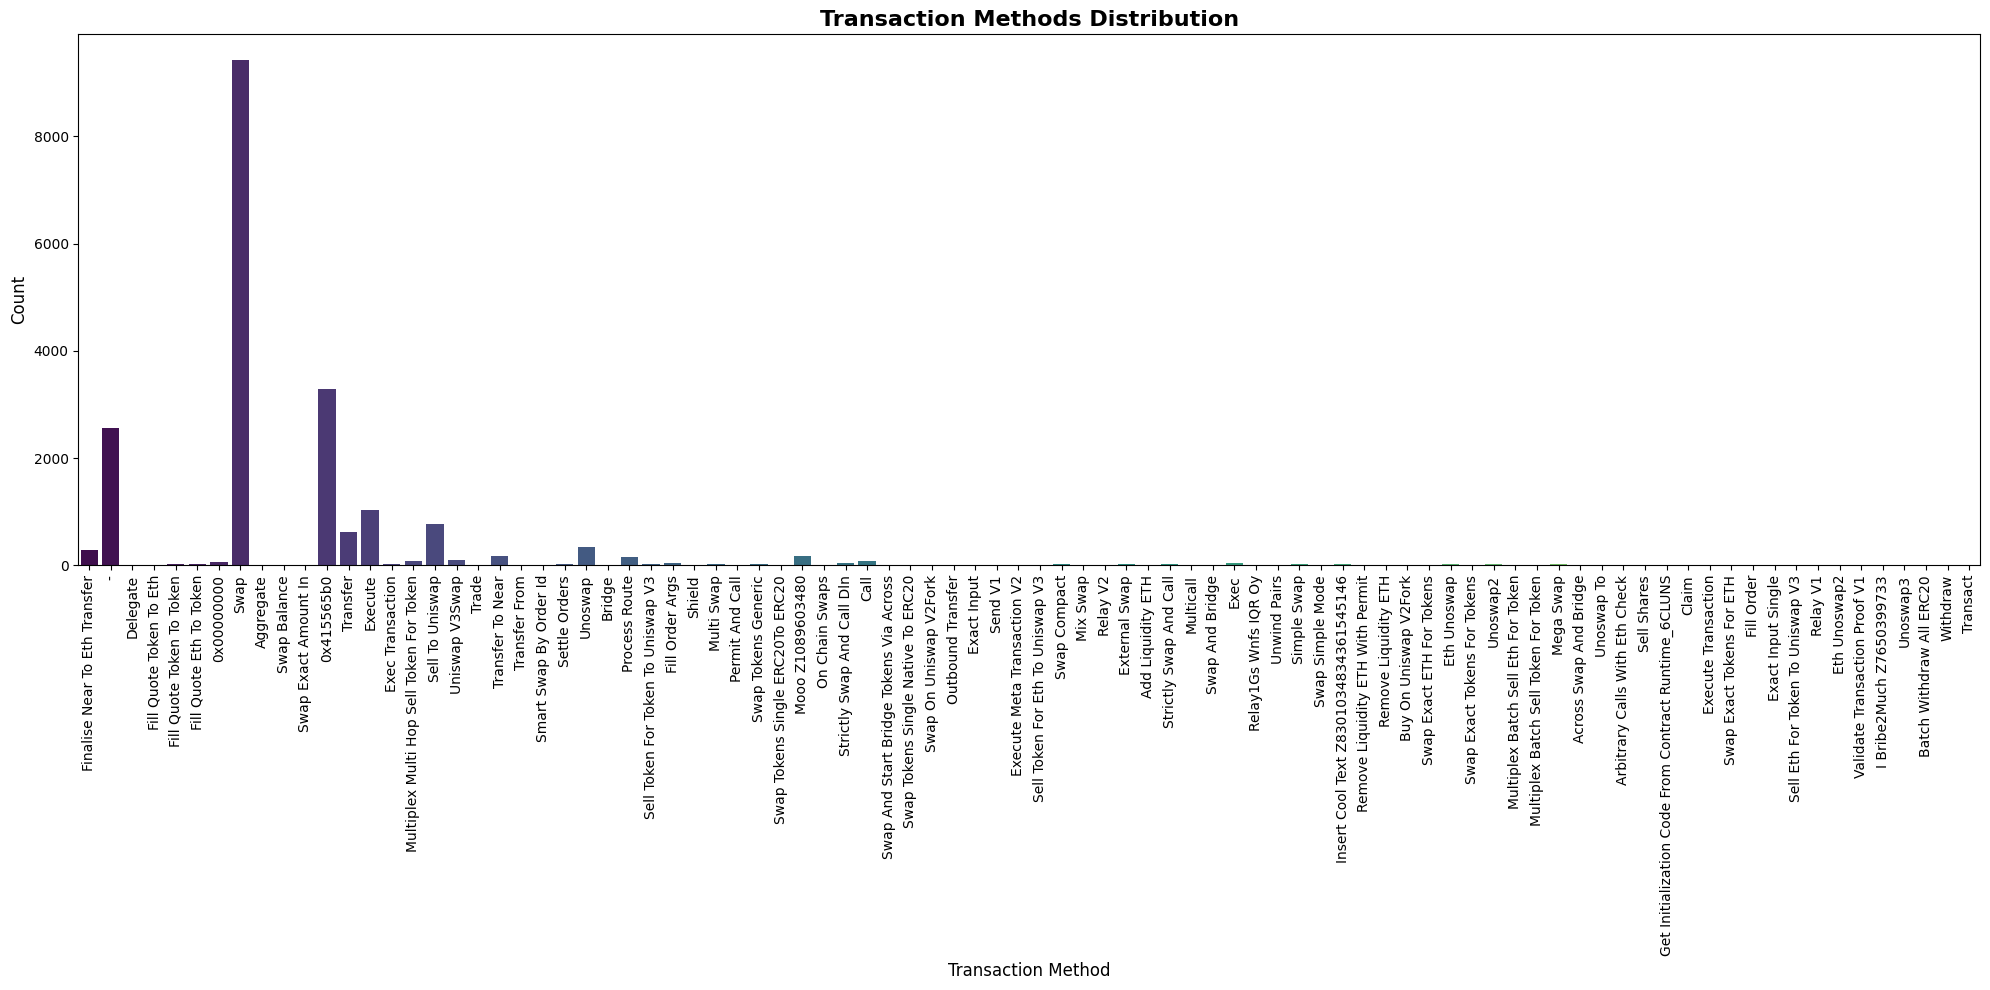

In [ ]:
import seaborn as sns # Make sure seaborn is imported
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Method', palette='viridis') # Now sns should be defined
plt.title('Transaction Methods Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

 Analyze quantity distribution

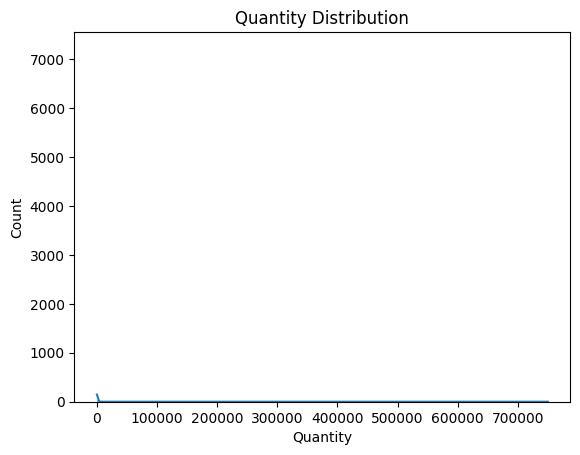

In [ ]:
sns.histplot(data=data, x='Quantity', kde=True)
plt.title('Quantity Distribution')
plt.show()

Correlation matrix

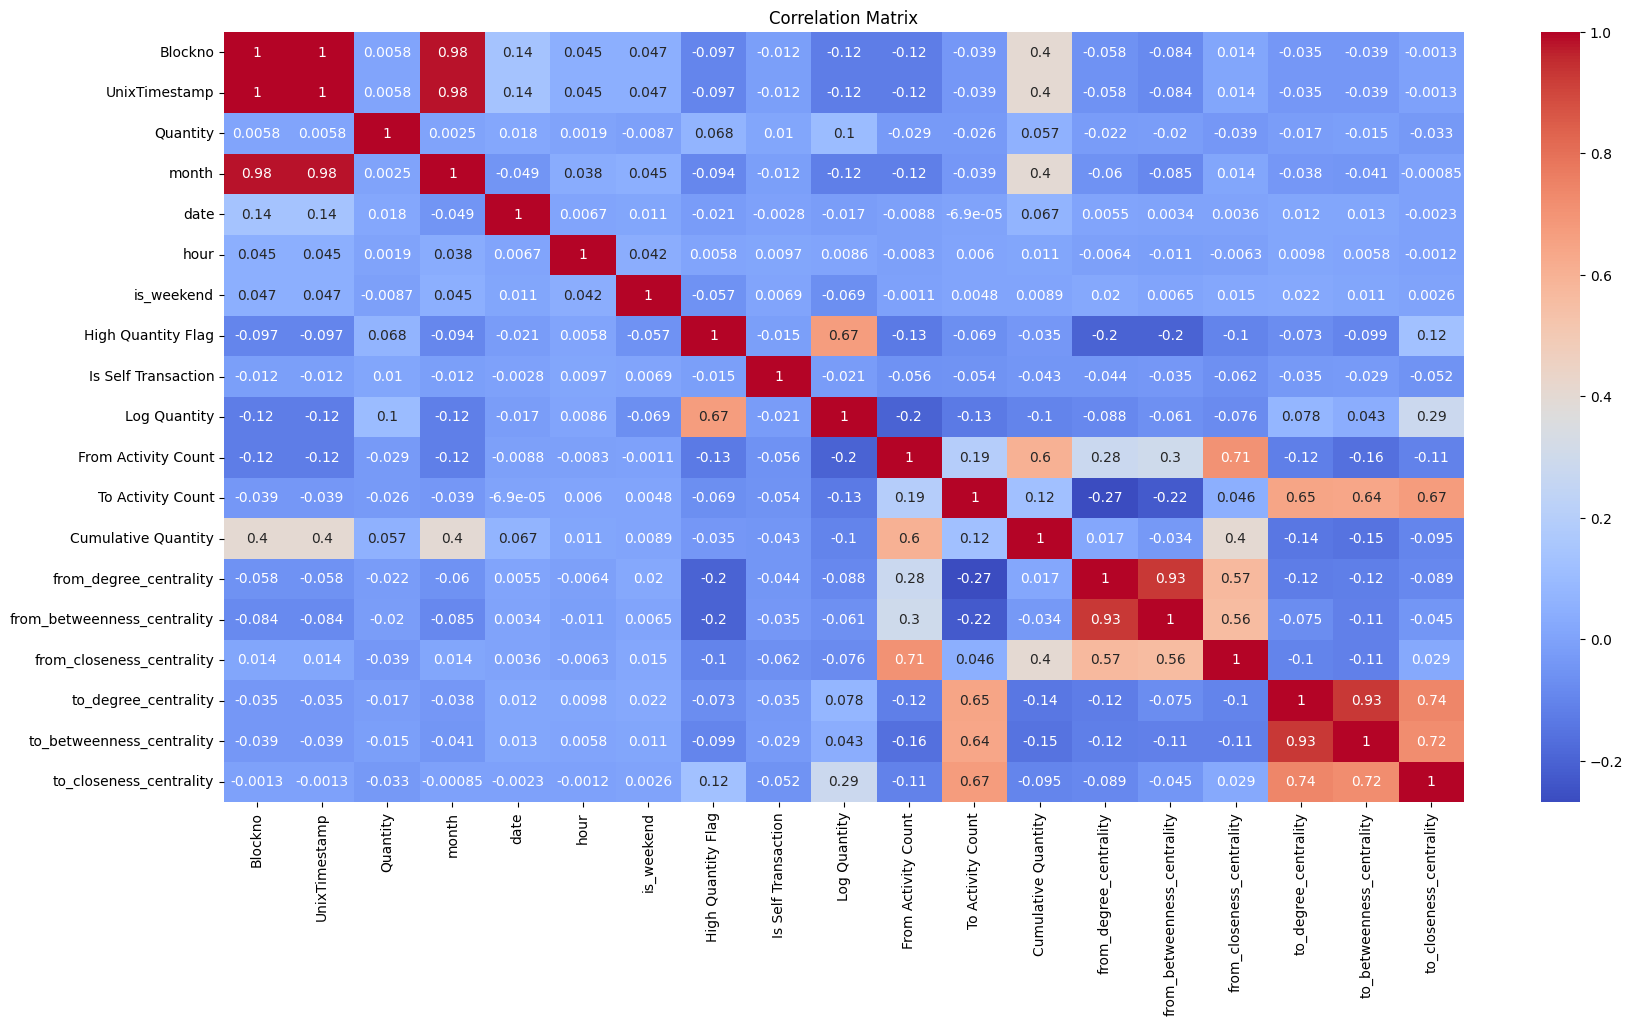

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

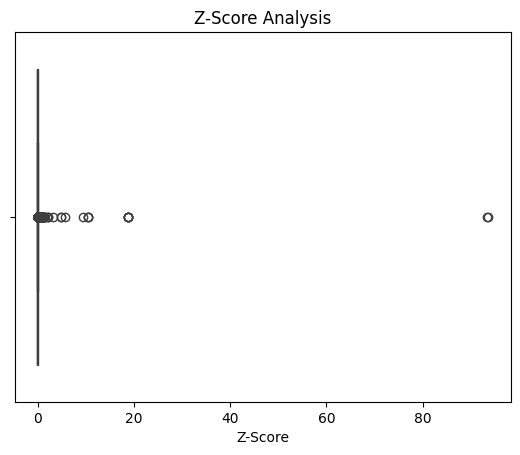

In [ ]:
"""Analyze Z-Score for outliers"""

sns.boxplot(data=data, x='Z-Score')
plt.title('Z-Score Analysis')
plt.show()

Group transactions by month , day and hour

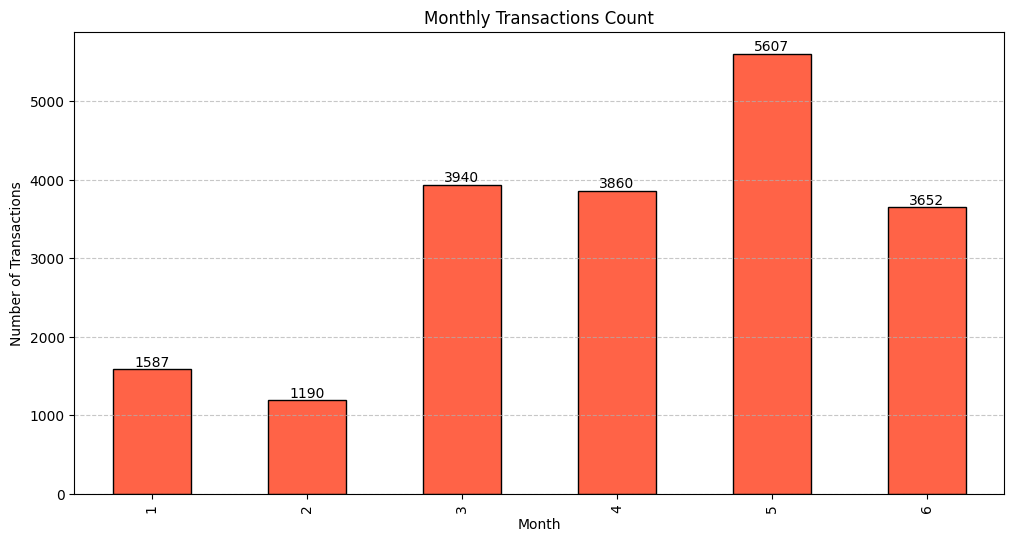

In [ ]:
plt.figure(figsize = (12,6))
monthly_transactions = data.groupby('month')['Transaction Hash'].count()
monthly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Monthly Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(monthly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Month')
plt.show()

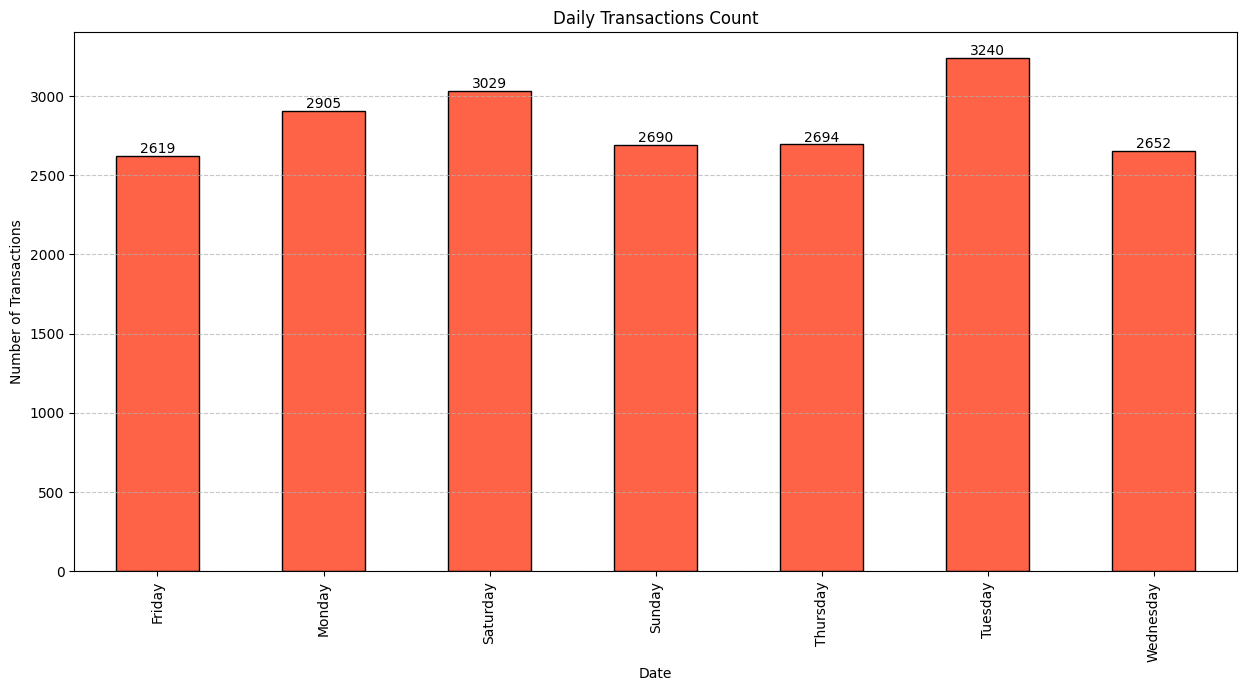

In [ ]:
plt.figure(figsize = (15,7))
daily_transactions = data.groupby('day_of_week')['Transaction Hash'].count()
daily_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Daily Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(daily_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.show()

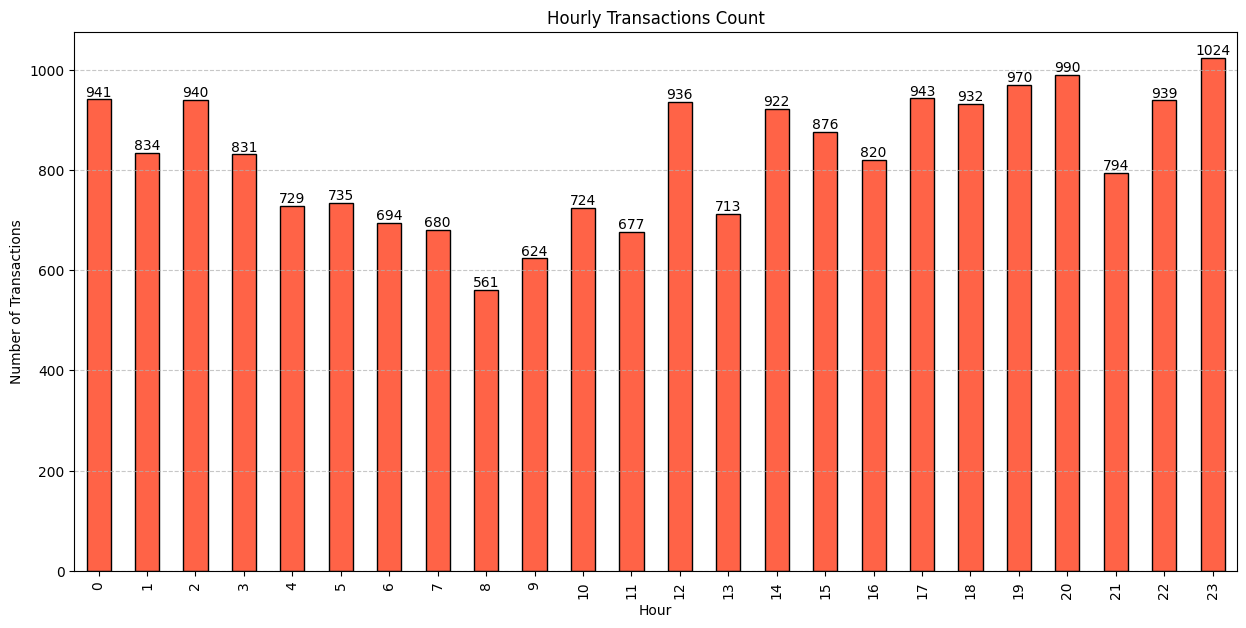

In [ ]:
plt.figure(figsize = (15,7))
hourly_transactions = data.groupby('hour')['Transaction Hash'].count()
hourly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Hourly Transactions Count')
plt.ylabel('Number of Transactions')
plt.xlabel('Hour')
for i, count in enumerate(hourly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Weekend vs. Weekday transactions

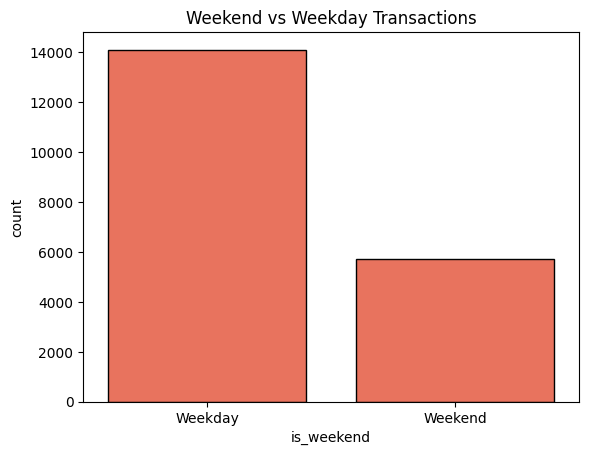

In [ ]:
sns.countplot(data=data, x='is_weekend' , color = "tomato" , edgecolor = "k")
plt.title('Weekend vs Weekday Transactions')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

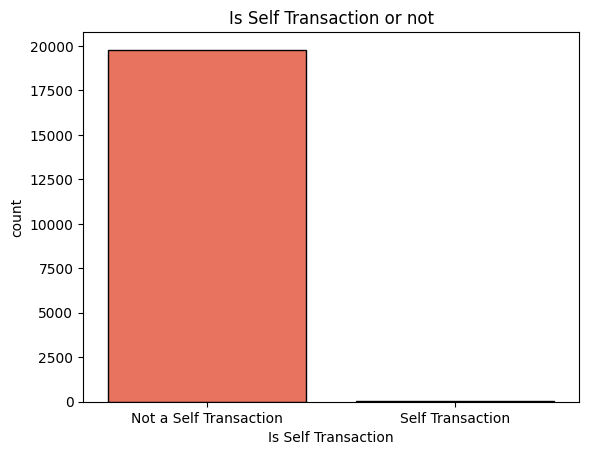

In [ ]:
sns.countplot(data=data, x='Is Self Transaction' , color = "tomato" , edgecolor = "k")
plt.title('Is Self Transaction or not')
plt.xticks([0, 1], ['Not a Self Transaction', 'Self Transaction'])
plt.show()

In [ ]:
#data.to_csv("processed_near_token_data.csv", index=False)
#this processed dataset in Group2/Dataset folder

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19836 entries, 2024-01-01 10:30:59 to 2024-05-01 02:30:35
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction Hash             19836 non-null  object        
 1   Blockno                      19836 non-null  int64         
 2   UnixTimestamp                19836 non-null  int64         
 3   DateTime (UTC)               19836 non-null  datetime64[ns]
 4   From                         19836 non-null  object        
 5   To                           19836 non-null  object        
 6   Quantity                     19836 non-null  float64       
 7   Method                       19836 non-null  object        
 8   month                        19836 non-null  int32         
 9   date                         19836 non-null  int32         
 10  hour                         19836 non-null  int32         
 11  day_of

Convert Categorical Columns to Numerical

In [ ]:
# Transforming 'hour' and 'month' feature into sine and cosine representation to handle its cyclical nature
data["hour_sin"] = np.sin(2 * np.pi * data["hour"] / 24)
data["hour_cos"] = np.cos(2 * np.pi * data["hour"] / 24)
data["month_sin"] = np.sin(2 * np.pi * data["month"] / 12)
data["month_cos"] = np.cos(2 * np.pi * data["month"] / 12)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Converting Categorical column into binary
categorical_columns = ['is_weekend', 'High Quantity Flag', 'Is Self Transaction', 'Is Outlier']
for col in categorical_columns:
    data[col] = data[col].astype(int)

label_encoder = LabelEncoder()
categorical_to_encode = ['day_of_week', 'Method', 'Quantity Category']
for col in categorical_to_encode:
    data[col] = label_encoder.fit_transform(data[col])


Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_columns = [
    'Quantity', 'Log Quantity','Z-Score','From Activity Count',
    'To Activity Count', 'Cumulative Quantity',
    'from_degree_centrality', 'from_betweenness_centrality',
    'from_closeness_centrality', 'to_degree_centrality',
    'to_betweenness_centrality', 'to_closeness_centrality',
    'date', 'month'
]

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [ ]:
# Define the feature columns
features = [
    'Quantity', 'Log Quantity','Z-Score','From Activity Count',
    'To Activity Count', 'Cumulative Quantity','High Quantity Flag',
    'Is Self Transaction', 'Is Outlier','hour_sin',
    'hour_cos','month_sin','month_cos',
    'is_weekend','from_degree_centrality',
    'from_betweenness_centrality',
    'from_closeness_centrality', 'to_degree_centrality',
    'to_betweenness_centrality', 'to_closeness_centrality'
]

# Extract the features for modeling
X = data[features]

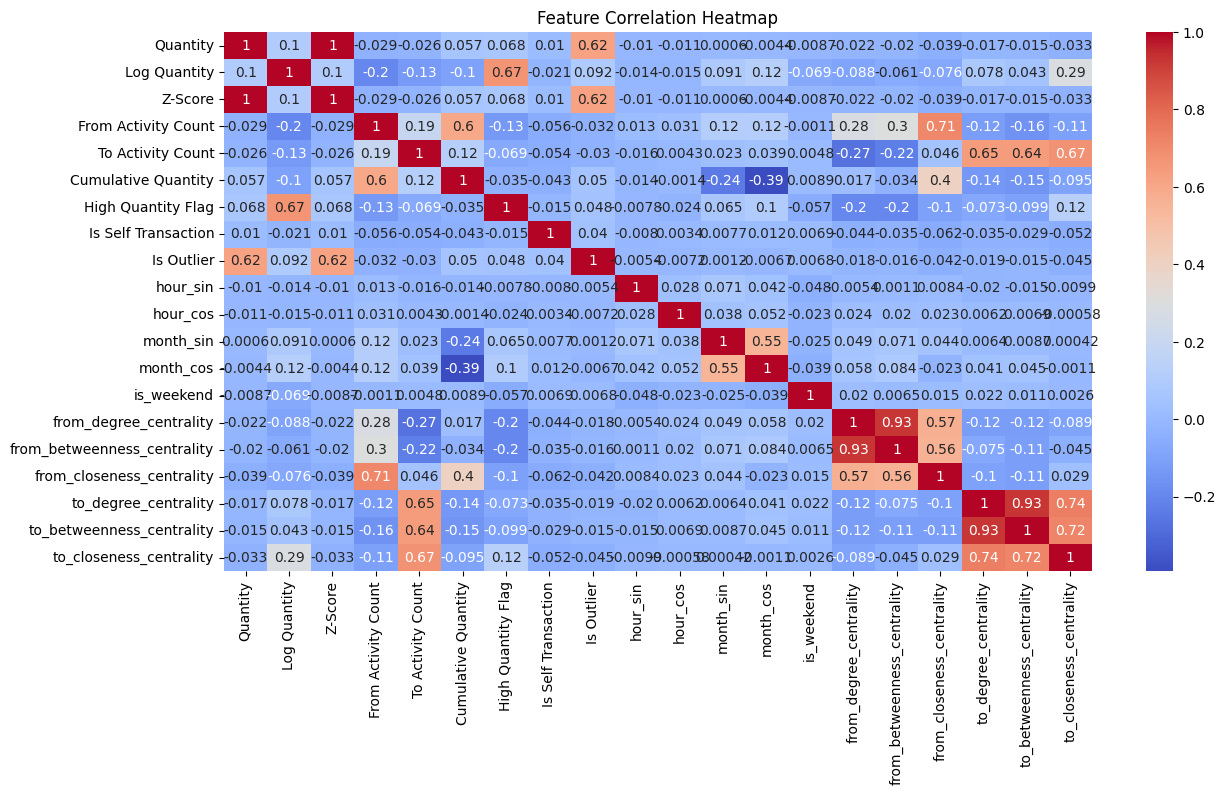

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# **Sprint 2**

## **Isolation forest for anomalies detection**





Train the Isolation Forest Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.05,
    random_state=42
)

# Fit the model on the dataset
iso_forest.fit(X_scaled)

# Predict anomalies (-1: anomaly, 1: normal)
data['isolation_anomaly'] = iso_forest.predict(X)


Visualize Anomalies

In [ ]:
#Anomaly Distribution
print(data['isolation_anomaly'].value_counts())


isolation_anomaly
 1    19174
-1      655
Name: count, dtype: int64


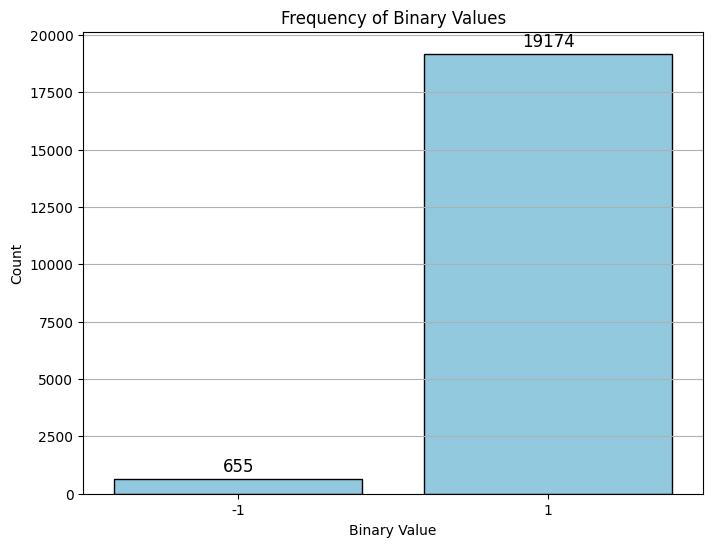

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='isolation_anomaly', data=data, color='skyblue', edgecolor='black')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Get the count
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position text in the middle of the bar
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Frequency of Binary Values')
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()


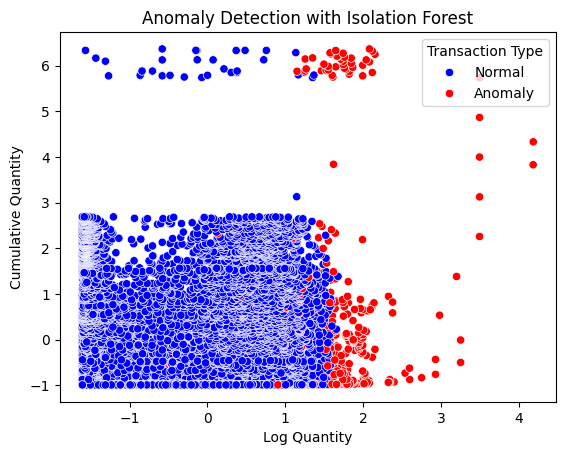

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot anomalies vs normal transactions
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=data['isolation_anomaly'].map({-1: 'Anomaly', 1: 'Normal'}),
    hue_order=['Normal', 'Anomaly'],
    palette=['blue', 'red']
)
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(title="Transaction Type")
plt.show()


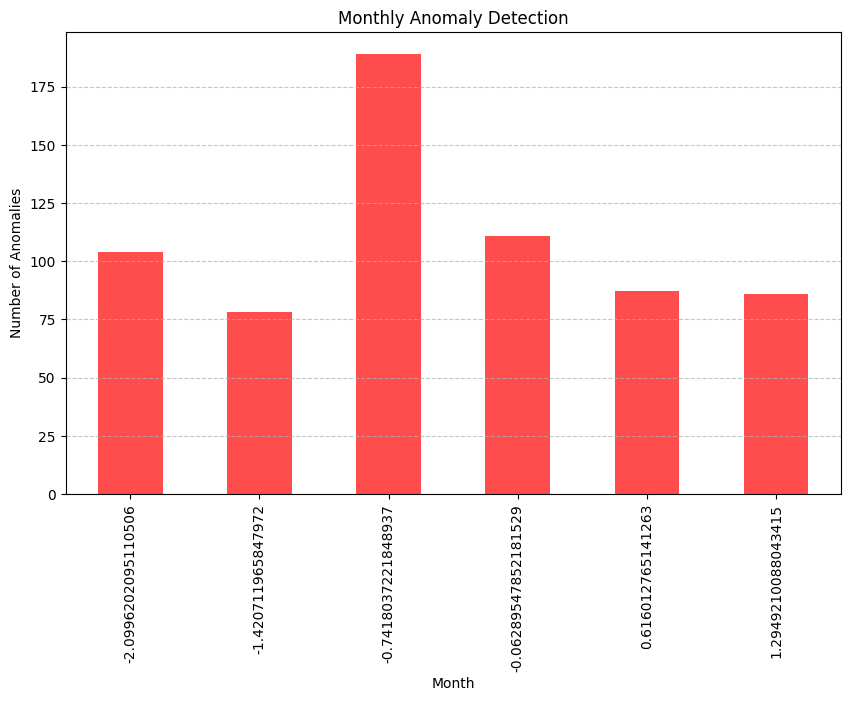

In [ ]:
import matplotlib.pyplot as plt

# Group by month and count anomalies
monthly_anomalies = data[data['isolation_anomaly'] == -1].groupby('month').size()

# Plot monthly anomalies
plt.figure(figsize=(10, 6))
monthly_anomalies.plot(kind='bar', color='red', alpha=0.7)
plt.title("Monthly Anomaly Detection")
plt.xlabel("Month")
plt.ylabel("Number of Anomalies")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


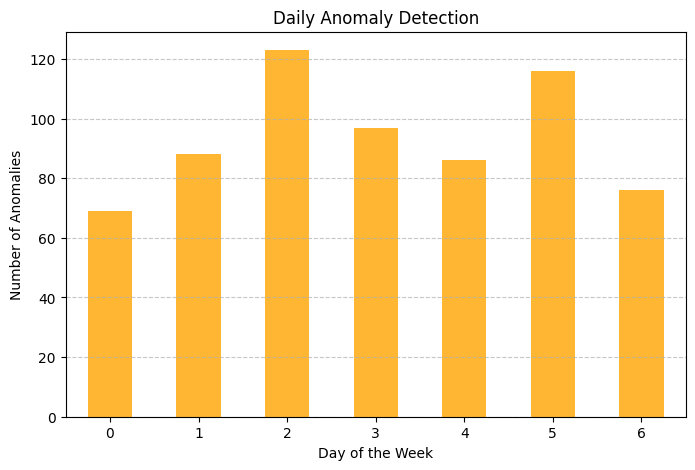

In [ ]:
# Group by day_of_week and count anomalies
daily_anomalies = data[data['isolation_anomaly'] == -1].groupby('day_of_week').size()

# Plot daily anomalies
plt.figure(figsize=(8, 5))
daily_anomalies.plot(kind='bar', color='orange', alpha=0.8)
plt.title("Daily Anomaly Detection")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Anomalies")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


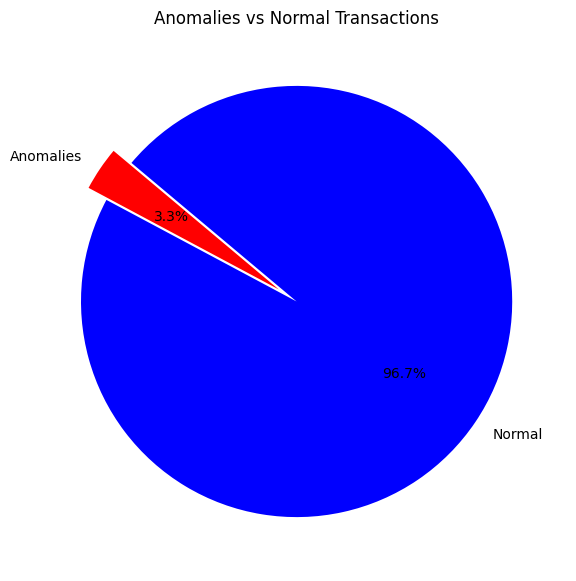

In [ ]:
# Calculate anomaly percentage
total_transactions = len(data)
anomaly_count = (data['isolation_anomaly'] == -1).sum()
normal_count = total_transactions - anomaly_count

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    [anomaly_count, normal_count],
    labels=['Anomalies', 'Normal'],
    autopct='%1.1f%%',
    colors=['red', 'blue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title("Anomalies vs Normal Transactions")
plt.show()


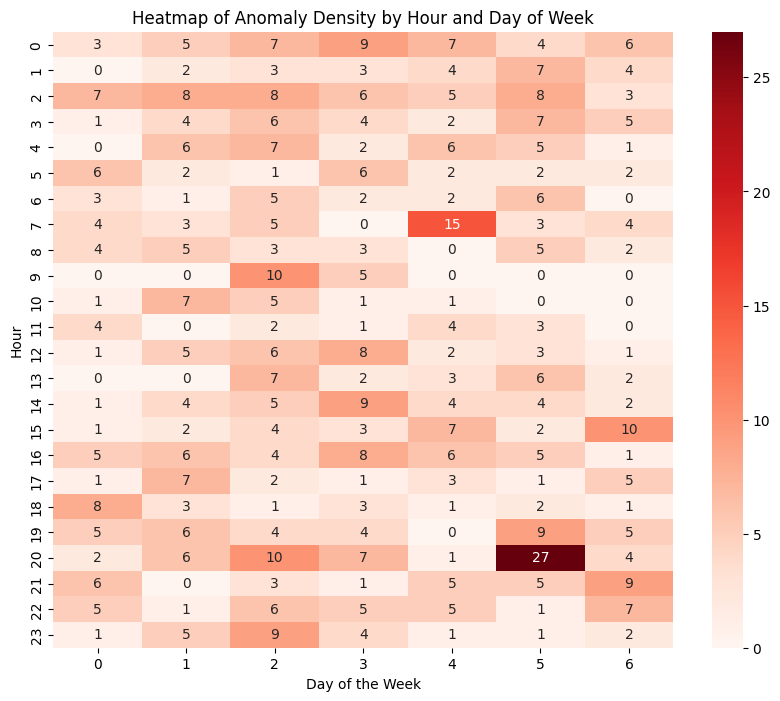

In [ ]:
import seaborn as sns

# Create a pivot table for heatmap
heatmap_data = data[data['isolation_anomaly'] == -1].pivot_table(
    index='hour', columns='day_of_week', values='isolation_anomaly', aggfunc='count', fill_value=0
)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt='d')
plt.title("Heatmap of Anomaly Density by Hour and Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour")
plt.show()


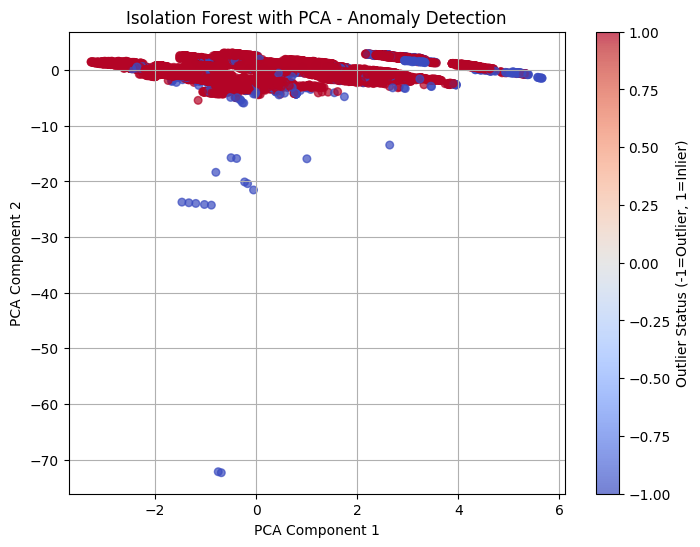

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA Algo to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['isolation_anomaly'], cmap='coolwarm', s=30, alpha=0.7)

plt.title('Isolation Forest with PCA - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


## **Local Outlier Factor**

### Train LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors = 20 , metric = 'euclidean' , contamination = 0.02)

predictions = lof.fit_predict(X_scaled)

anomaly_scores = lof.negative_outlier_factor_

data['lof_scores'] = anomaly_scores
data['lof_outliers'] = predictions


In [ ]:
outlier_count = (data['lof_outliers'] == -1).sum()
print(f"Number of outliers detected: {outlier_count}")


Number of outliers detected: 397


### Visualize and Detecting Anomalies

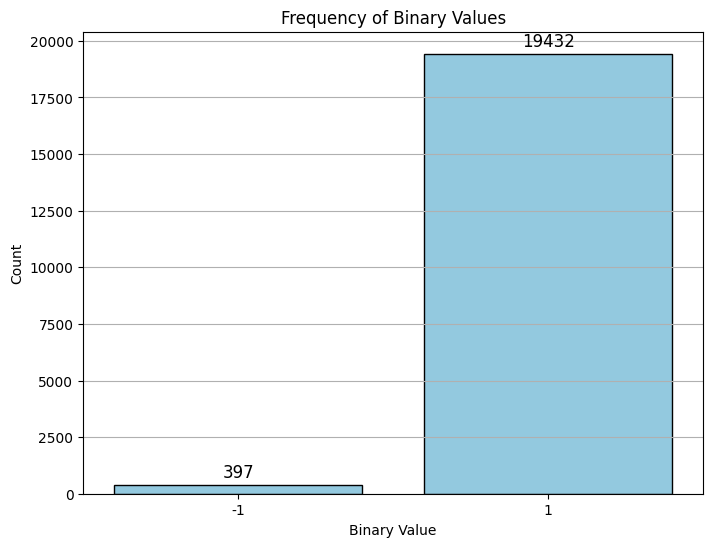

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='lof_outliers', data=data, color='skyblue', edgecolor='black')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )
plt.title('Frequency of Binary Values')
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()


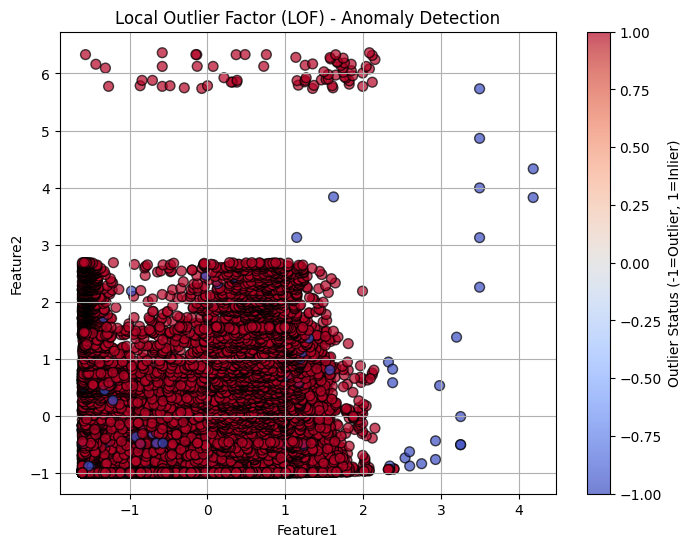

In [ ]:
plt.figure(figsize=(8, 6))

# Plot inliers (1) and outliers (-1) with different colors
plt.scatter(data['Log Quantity'], data['Cumulative Quantity'], c=data['lof_outliers'], cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.title('Local Outlier Factor (LOF) - Anomaly Detection')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Display the colorbar for outlier status
plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


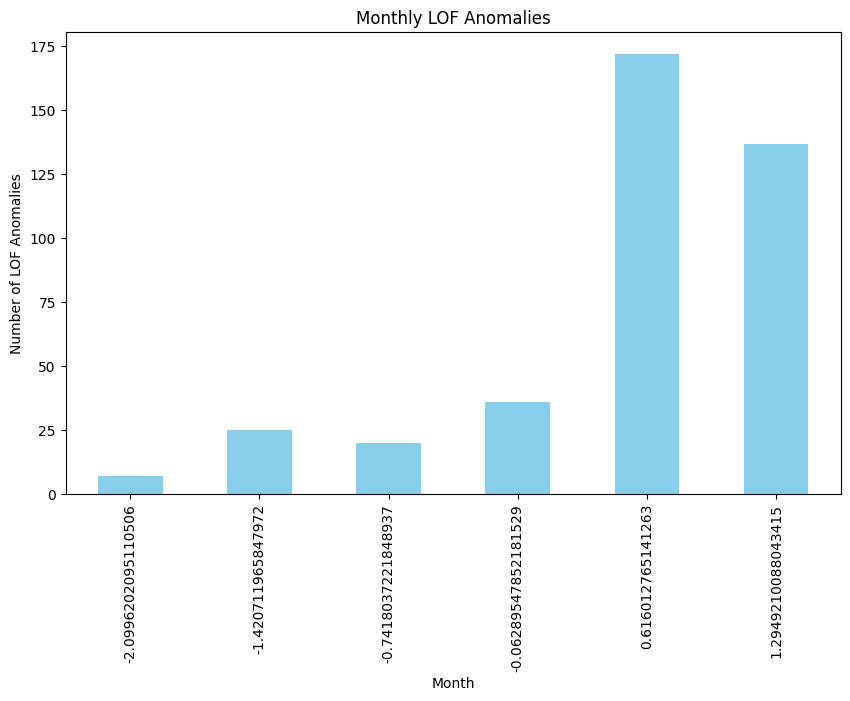

In [ ]:
 # Group by month and count LOF anomalies
monthly_lof_anomalies = data[data['lof_outliers'] == -1].groupby('month').size()

# Plot monthly LOF anomalies
plt.figure(figsize=(10, 6))
monthly_lof_anomalies.plot(kind='bar', color='skyblue')
plt.title("Monthly LOF Anomalies")
plt.xlabel("Month")
plt.ylabel("Number of LOF Anomalies")
plt.xticks(rotation=90)
plt.show()

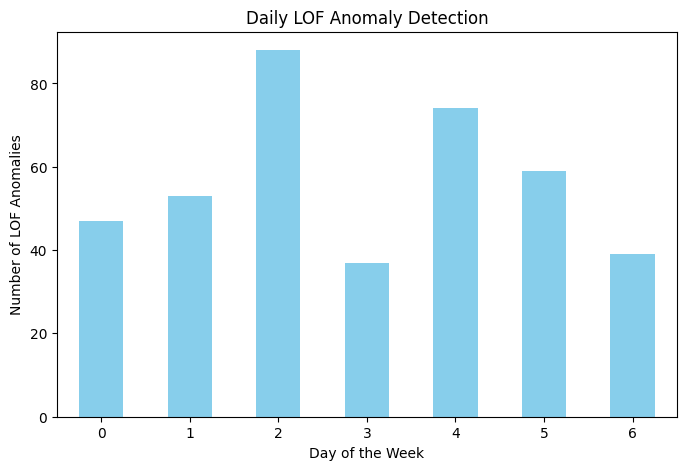

In [ ]:
# Group by day_of_week and count LOF anomalies
daily_lof_anomalies = data[data['lof_outliers'] == -1].groupby('day_of_week').size()

# Plot daily LOF anomalies
plt.figure(figsize=(8, 5))
daily_lof_anomalies.plot(kind='bar', color='skyblue')
plt.title("Daily LOF Anomaly Detection")
plt.xlabel("Day of the Week")
plt.ylabel("Number of LOF Anomalies")
plt.xticks(rotation=0)
plt.show()

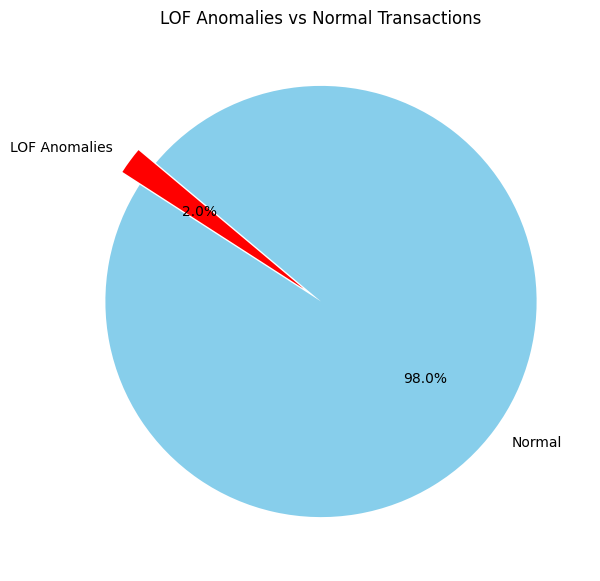

In [ ]:
# Calculate anomaly percentage for LOF
total_transactions = len(data)
lof_anomaly_count = (data['lof_outliers'] == -1).sum()
lof_normal_count = total_transactions - lof_anomaly_count

# Pie chart for LOF
plt.figure(figsize=(7, 7))
plt.pie(
    [lof_anomaly_count, lof_normal_count],
    labels=['LOF Anomalies', 'Normal'],
    autopct='%1.1f%%',
    colors=['red', 'skyblue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title("LOF Anomalies vs Normal Transactions")
plt.show()

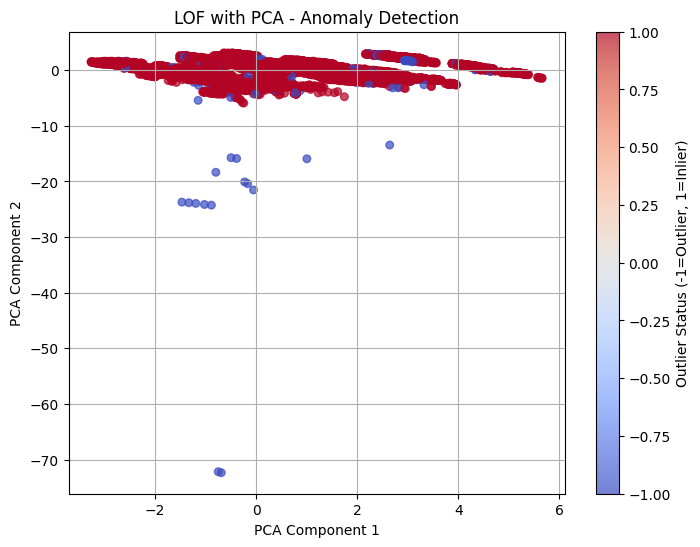

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['lof_outliers'], cmap='coolwarm', s=30, alpha=0.7)

plt.title('LOF with PCA - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


## **One Class SVM**

### Train SVM

In [ ]:
from sklearn.svm import OneClassSVM

# Initialize and fit One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
ocsvm.fit(X_scaled)

data['ocsvm_anomaly'] = ocsvm.predict(X_scaled)

In [ ]:
# Add anomaly scores
anomaly_scores = ocsvm.decision_function(X_scaled)
data['ocsvm_scores'] = anomaly_scores

# Count anomalies
anomaly_count = (data['ocsvm_anomaly'] == -1).sum()
print(f"Number of anomalies detected: {anomaly_count}")


Number of anomalies detected: 993


### Visualize and Detecting Anomalies

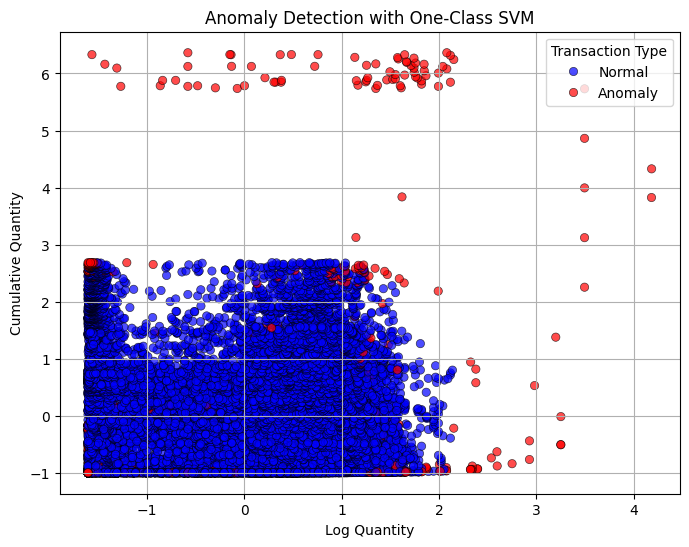

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=data['ocsvm_anomaly'].map({-1: 'Anomaly', 1: 'Normal'}),
    hue_order=['Normal', 'Anomaly'],
    palette=['blue', 'red'],
    edgecolor='k', alpha=0.7
)
plt.title("Anomaly Detection with One-Class SVM")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(title="Transaction Type")
plt.grid(True)
plt.show()

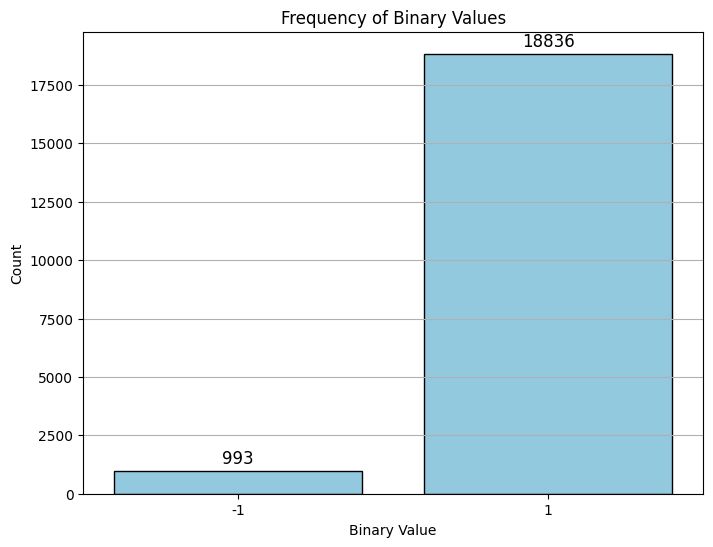

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='ocsvm_anomaly', data=data, color='skyblue', edgecolor='black')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Frequency of Binary Values')
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

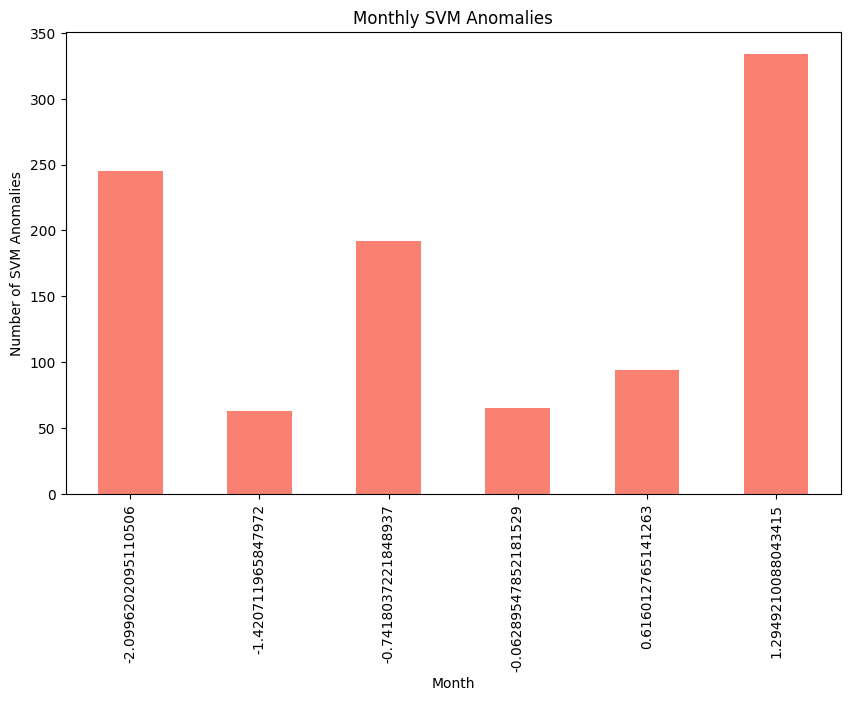

In [ ]:
# Group by month and count SVM anomalies
monthly_svm_anomalies = data[data['ocsvm_anomaly'] == -1].groupby('month').size()

# Plot monthly SVM anomalies
plt.figure(figsize=(10, 6))
monthly_svm_anomalies.plot(kind='bar', color='salmon')
plt.title("Monthly SVM Anomalies")
plt.xlabel("Month")
plt.ylabel("Number of SVM Anomalies")
plt.xticks(rotation=90)
plt.show()

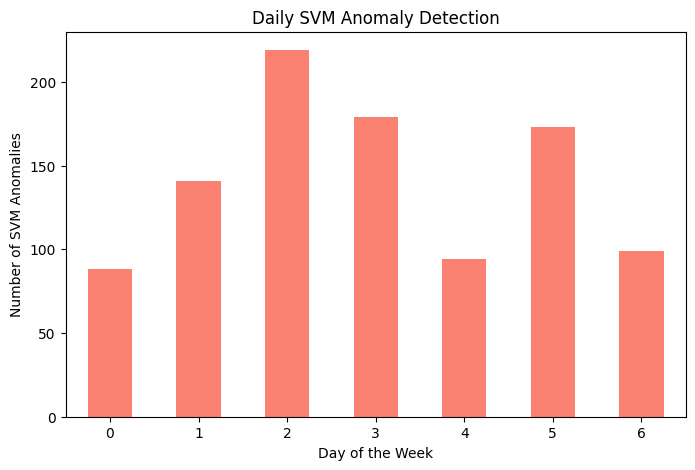

In [ ]:
# Group by day_of_week and count SVM anomalies
daily_svm_anomalies = data[data['ocsvm_anomaly'] == -1].groupby('day_of_week').size()

# Plot daily SVM anomalies
plt.figure(figsize=(8, 5))
daily_svm_anomalies.plot(kind='bar', color='salmon')
plt.title("Daily SVM Anomaly Detection")
plt.xlabel("Day of the Week")
plt.ylabel("Number of SVM Anomalies")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

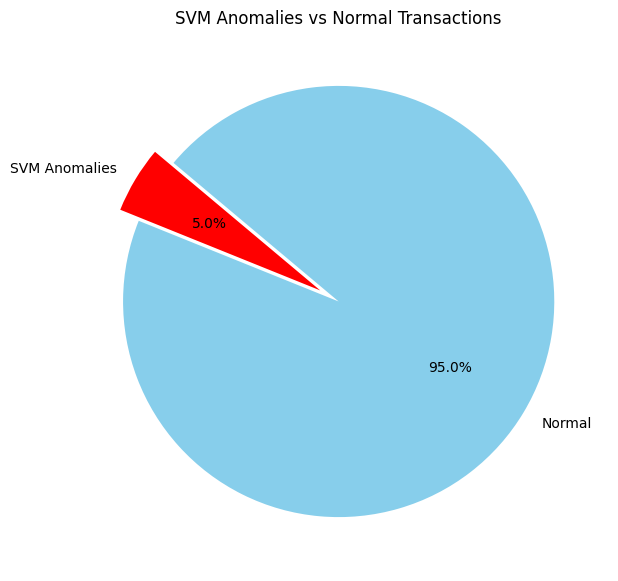

In [ ]:
# Calculate anomaly percentage for SVM
total_transactions = len(data)
svm_anomaly_count = (data['ocsvm_anomaly'] == -1).sum()
svm_normal_count = total_transactions - svm_anomaly_count

# Pie chart for SVM
plt.figure(figsize=(7, 7))
plt.pie(
    [svm_anomaly_count, svm_normal_count],
    labels=['SVM Anomalies', 'Normal'],
    autopct='%1.1f%%',
    colors=['red', 'skyblue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title("SVM Anomalies vs Normal Transactions")
plt.show()

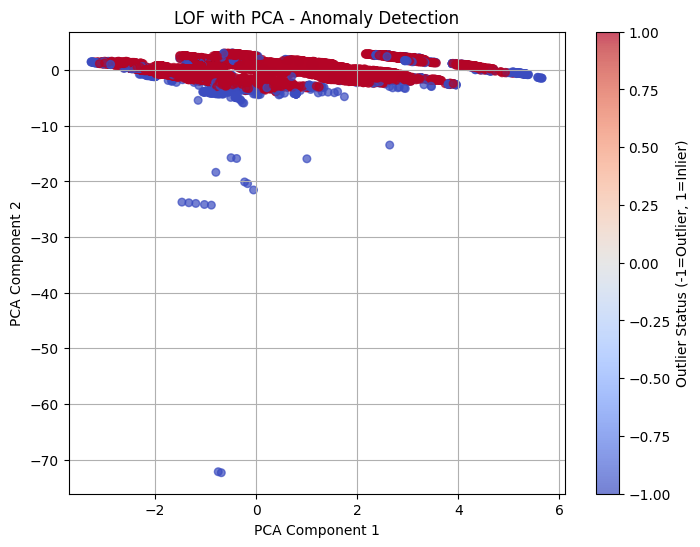

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['ocsvm_anomaly'], cmap='coolwarm', s=30, alpha=0.7)

plt.title('LOF with PCA - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


## **Comparison between models in detecting Anomaly**


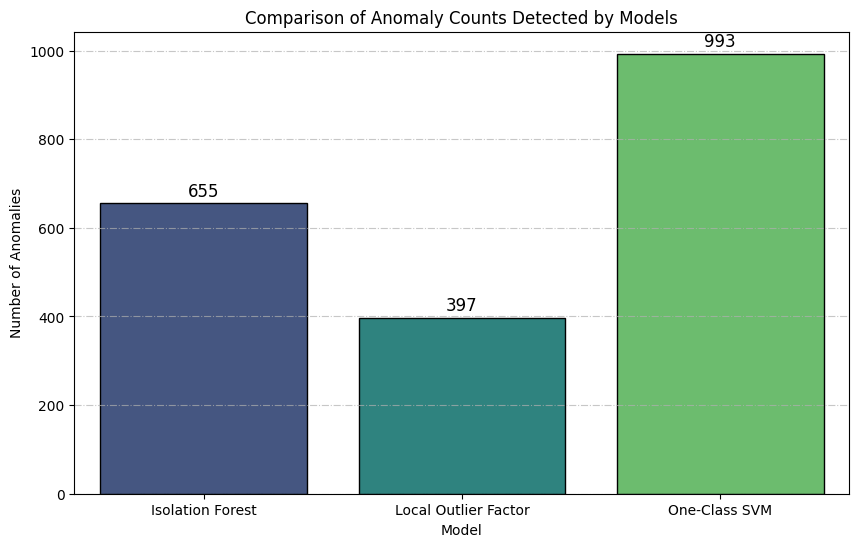

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate anomaly counts
anomaly_counts = pd.DataFrame({
    'Model': ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM'],
    'Anomalies': [
        (data['isolation_anomaly'] == -1).sum(),
        (data['lof_outliers'] == -1).sum(),
        (data['ocsvm_anomaly'] == -1).sum()
    ]
})

# Plot anomaly counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Anomalies', data=anomaly_counts, palette='viridis', edgecolor='k')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )


plt.title('Comparison of Anomaly Counts Detected by Models')
plt.ylabel('Number of Anomalies')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.show()

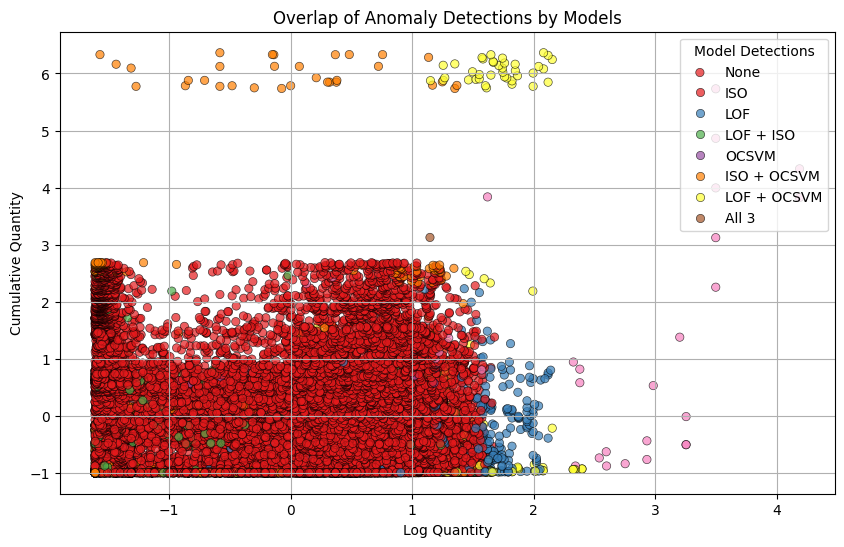

In [ ]:
# Visualize overlap between models
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=(data['isolation_anomaly'] == -1).astype(int) +  # Changed 'Anomaly' to 'isolation_anomaly'
         (data['lof_outliers'] == -1).astype(int) * 2 +
         (data['ocsvm_anomaly'] == -1).astype(int) * 4,
    palette='Set1', edgecolor='k', alpha=0.7
)
plt.title("Overlap of Anomaly Detections by Models")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(
    title="Model Detections",
    labels=[
        "None", "ISO", "LOF", "LOF + ISO",
        "OCSVM", "ISO + OCSVM", "LOF + OCSVM", "All 3"
    ],
    loc='upper right'
)
plt.grid(True)
plt.show()

## **Ensemble Voting**

### Applying Ensemble

In [ ]:
from scipy.stats import mode

# Here we are Converting labels to binary (1 for normal, 0 for anomaly)
models_labels = np.array([
    np.where(data['isolation_anomaly'] == 1, 1, 0),
    np.where(data['lof_outliers'] == 1, 1, 0),
    np.where(data['ocsvm_anomaly'] == 1, 1, 0)
])

# Ensemble voting
ensemble_labels = mode(models_labels, axis=0).mode.flatten()

data['ensemble_output'] = pd.DataFrame({
    'ensemble_labels': ensemble_labels
})

In [ ]:
# Calculate agreement scores
agreement_scores = np.mean(models_labels == ensemble_labels, axis=1)

# Model names for clarity
model_names = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']

# Print agreement scores
for model, score in zip(model_names, agreement_scores):
    print(f"{model} agreement with ensemble: {score:.2f}")


Isolation Forest agreement with ensemble: 0.98
Local Outlier Factor agreement with ensemble: 0.97
One-Class SVM agreement with ensemble: 0.97


Visualizing and Detecting Anomalies

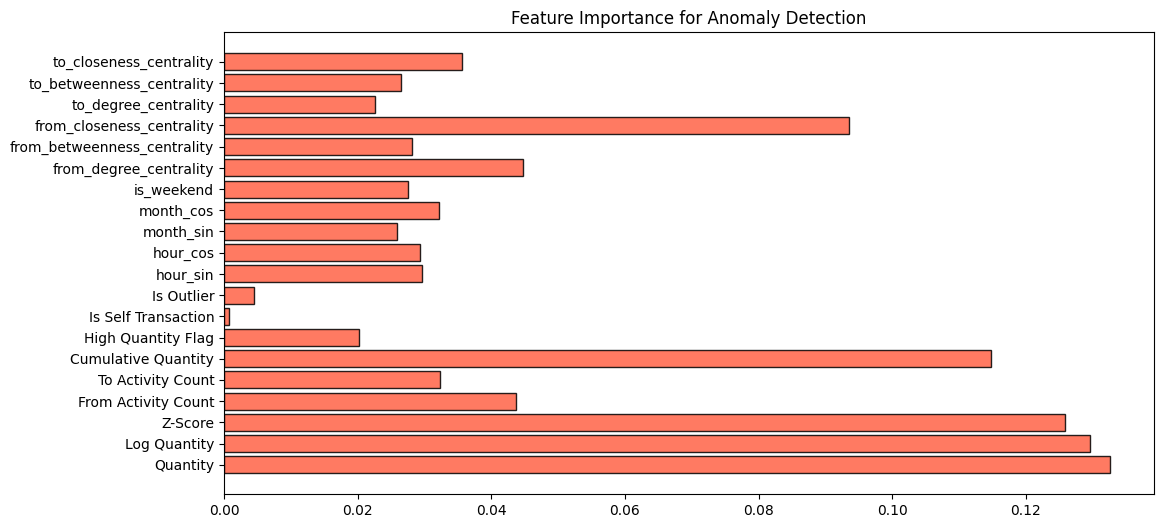

In [ ]:
## Visualizing the Feature Importance in Ensemble Voting

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(data[features], ensemble_labels)
importance = rf.feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(features, importance , color = 'tomato' , alpha = 0.85 , edgecolor = 'k')
plt.title("Feature Importance for Anomaly Detection")
plt.show()


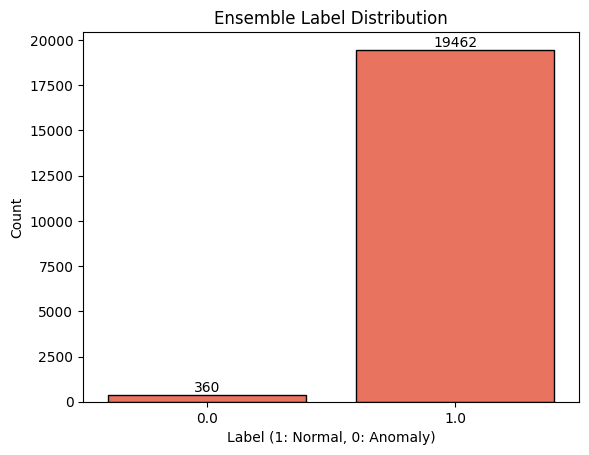

In [ ]:
## Countplot between Normal and Anomalous Data Points
sns.countplot(x=data['ensemble_output'] , color = 'tomato' , edgecolor = 'k')
plt.title("Ensemble Label Distribution")
plt.xlabel("Label (1: Normal, 0: Anomaly)")
plt.ylabel("Count")
for bar in plt.gca().patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, count + 0.1, str(count), ha='center', va='bottom' )

plt.show()


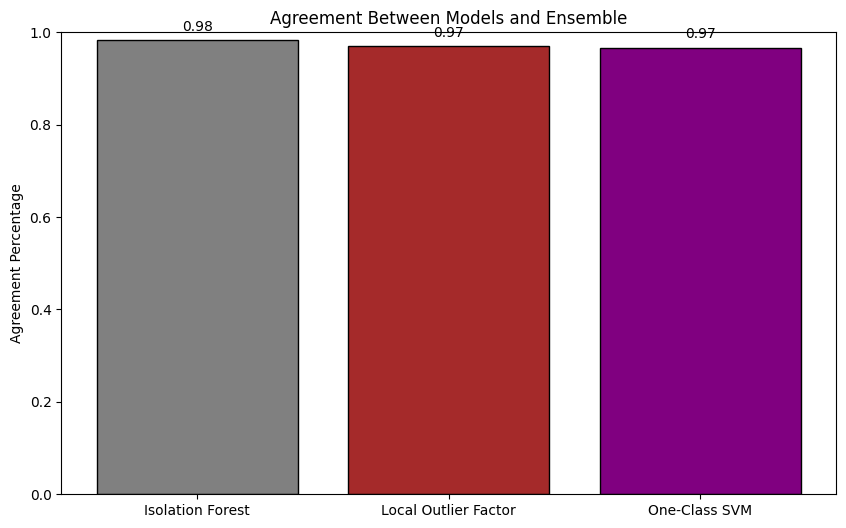

In [ ]:
agreement = np.mean(models_labels == ensemble_labels, axis=1)

plt.figure(figsize=(10, 6))
models = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']
plt.bar(models, agreement, color=['grey', 'brown', 'purple'] , edgecolor= 'k')
plt.title("Agreement Between Models and Ensemble")
plt.ylabel("Agreement Percentage")
plt.ylim(0, 1)
for i, value in enumerate(agreement):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

plt.show()


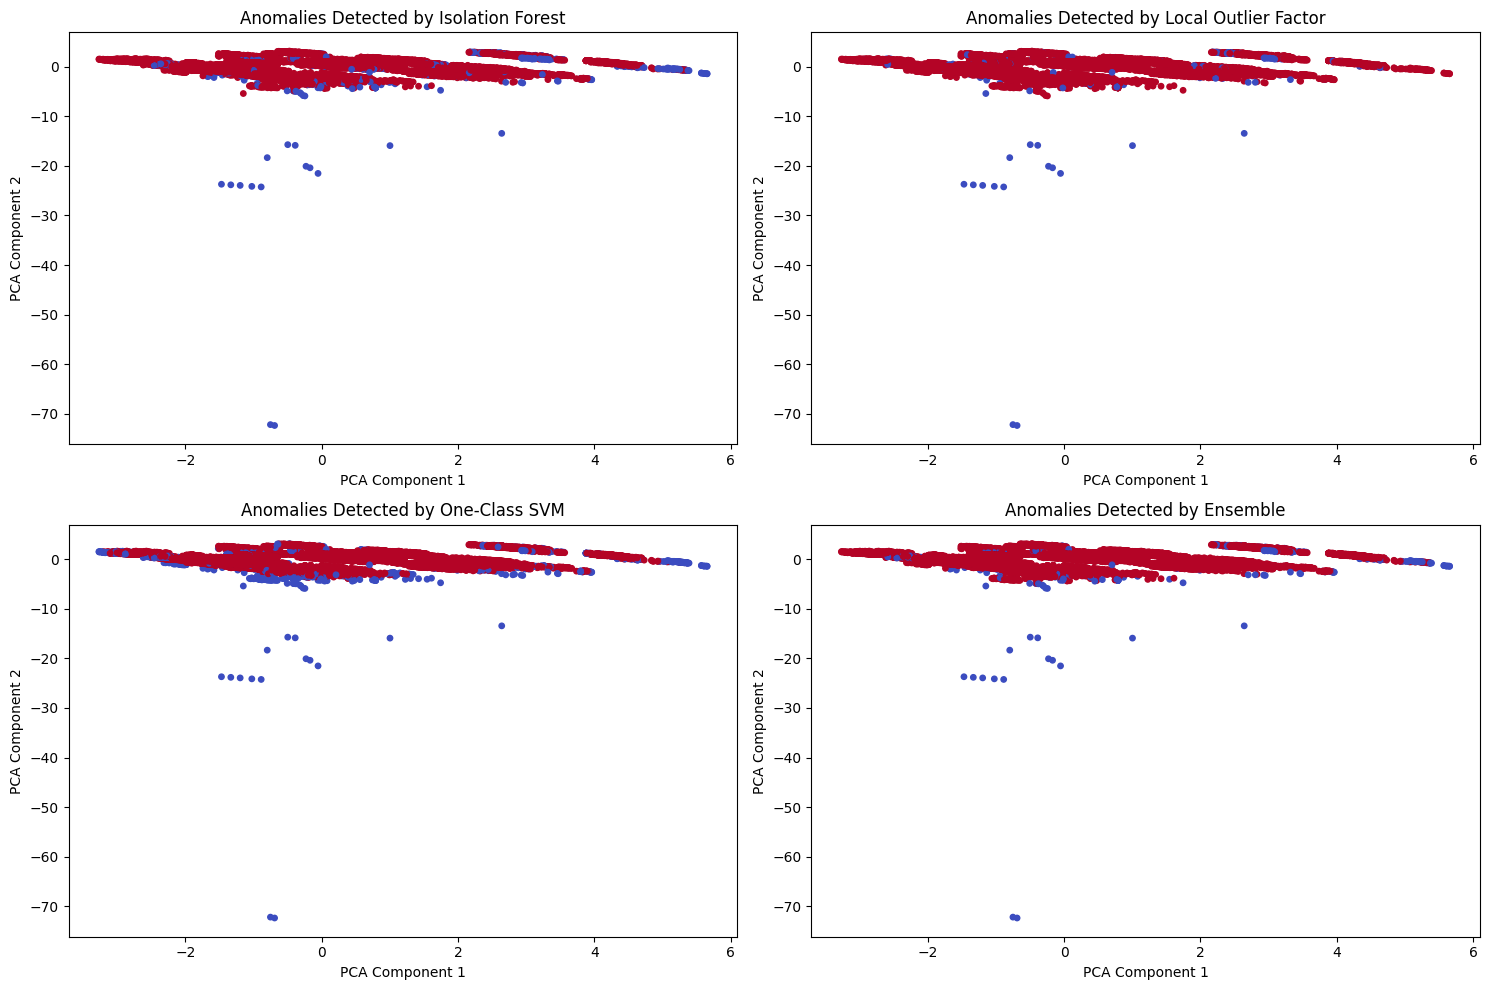

In [ ]:
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Plot anomalies for each model and the ensemble
plt.figure(figsize=(15, 10))
models = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Ensemble']
for i, model_labels in enumerate(list(models_labels) + [ensemble_labels]):
    plt.subplot(2, 2, i + 1)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=model_labels, cmap='coolwarm', s=15)
    plt.title(f"Anomalies Detected by {models[i]}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


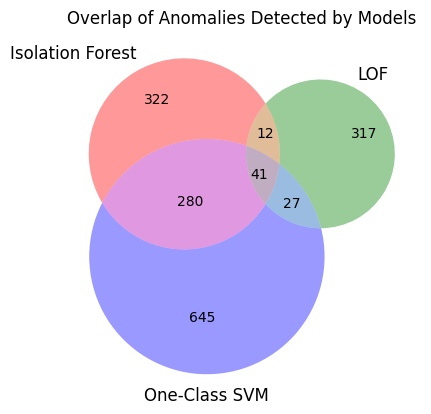

In [ ]:
from matplotlib_venn import venn3

# Convert model labels to binary sets for Venn diagram
if_anomalies = set(np.where(models_labels[0] == 0)[0])
lof_anomalies = set(np.where(models_labels[1] == 0)[0])
oc_anomalies = set(np.where(models_labels[2] == 0)[0])
ensemble_anomalies = set(np.where(ensemble_labels == 0)[0])

# Venn Diagram
venn3([if_anomalies, lof_anomalies, oc_anomalies], ('Isolation Forest', 'LOF', 'One-Class SVM'))
plt.title("Overlap of Anomalies Detected by Models")
plt.show()


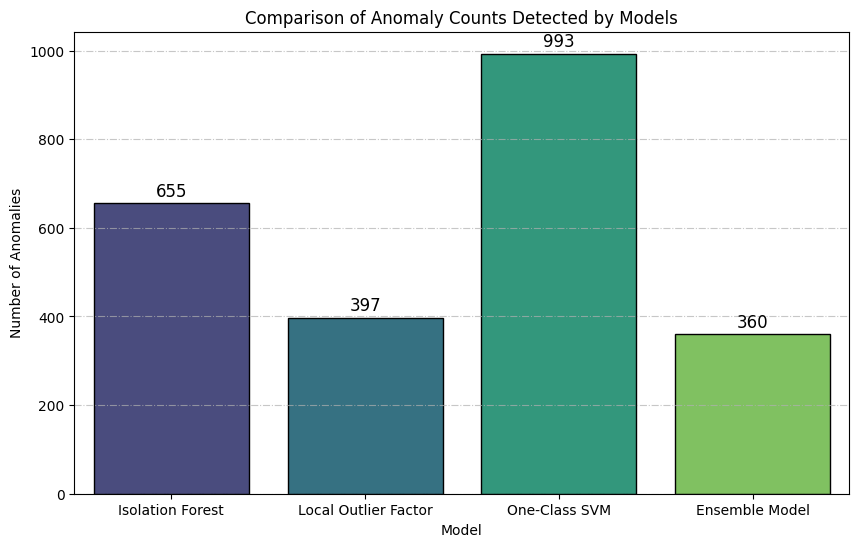

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate anomaly counts
anomaly_counts = pd.DataFrame({
    'Model': ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM',"Ensemble Model"],
    'Anomalies': [
        (data['isolation_anomaly'] == -1).sum(),  # Replace 'Anomaly' with 'isolation_anomaly'
        (data['lof_outliers'] == -1).sum(),
        (data['ocsvm_anomaly'] == -1).sum(),
        (data['ensemble_output'] == 0).sum()

    ]
})

# Plot anomaly counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Anomalies', data=anomaly_counts, palette='viridis', edgecolor='k')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )


plt.title('Comparison of Anomaly Counts Detected by Models')
plt.ylabel('Number of Anomalies')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.show()

# **Sprint 3**


### **ARIMA**

In [ ]:
pip install statsmodels pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.4 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/NEAR_token_transaction_data.xlsx')

In [ ]:
df['Quantity'].dropna(inplace = True)
df["Quantity"].drop_duplicates(inplace = True)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime (UTC)'])
df.set_index('DateTime', inplace=True)
df = df.sort_index()


In [ ]:
df.head()

Transaction Hash  \
DateTime                                                                 
2024-01-01 00:25:35  0x27797428fc8aaf088cc707c8788b5d13580696418c79...   
2024-01-01 00:36:11  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...   
2024-01-01 00:36:11  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...   
2024-01-01 00:36:11  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...   
2024-01-01 00:51:59  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...   

                      Blockno  UnixTimestamp      DateTime (UTC)  \
DateTime                                                           
2024-01-01 00:25:35  18909018     1704068735 2024-01-01 00:25:35   
2024-01-01 00:36:11  18909070     1704069371 2024-01-01 00:36:11   
2024-01-01 00:36:11  18909070     1704069371 2024-01-01 00:36:11   
2024-01-01 00:36:11  18909070     1704069371 2024-01-01 00:36:11   
2024-01-01 00:51:59  18909149     1704070319 2024-01-01 00:51:59   

                                                           From  \
DateTime                                                          
2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                                             To    Quantity  \
DateTime                                                                      
2024-01-01 00:25:35  0x776a0725094cbf984e31b43d17e8aaec3c88294a   36.593837   
2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  104.984275   
2024-01-01 00:36:11  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.079035   
2024-01-01 00:36:11  0xd98d9d8c5a70df5d5d8e39847ce254347a59816b  104.984275   
2024-01-01 00:51:59  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   10.247435   

                              Method  
DateTime                              
2024-01-01 00:25:35  Sell To Uniswap  
2024-01-01 00:36:11       0x415565b0  
2024-01-01 00:36:11       0x415565b0  
2024-01-01 00:36:11       0x415565b0  
2024-01-01 00:51:59       0x415565b0

In [ ]:
target = df['Quantity'].resample('D').sum()

train_data = target[:-30]
test_data = target[-30:]

print(len(train_data))
print(len(test_data))

147
30


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(train_data)

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] <= 0.05:
  print("Reject the null hypothesis (H0). The time series is stationary.")
else:
  print("Fail to reject the null hypothesis (H0). The time series is not stationary.")

ADF Statistic: -4.43115581683401
p-value: 0.0002613314766798959
Reject the null hypothesis (H0). The time series is stationary.


In [ ]:
auto_model = auto_arima(
    train_data,
    seasonal=False,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)

print(auto_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3559.782, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3592.855, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3576.171, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3577.191, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3590.858, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3573.952, Time=2.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3573.851, Time=2.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3549.679, Time=0.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3551.441, Time=1.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3555.235, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3552.967, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3555.207, Time=1.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3546.389, Time=0.67 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3550.840, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3546.490, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3547.482, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=3545.890, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=3543.900, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3542.433, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3541.076, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3572.877, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0]             : AIC=3542.605, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3571.955, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=3544.093, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3549.764, Time=0.06 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 13.883 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  147
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -1766.538
Date:                Mon, 20 Jan 2025   AIC                           3541.076
Time:                        16:52:23   BIC                           3553.010
Sample:                    01-01-2024   HQIC                          3545.925
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print(auto_model.order)   ## These parameters were yeilding poor result , so we use the (5,1,3) as parameters

(0, 1, 3)


In [ ]:
arima = ARIMA(train_data, order=auto_model.order)
model_fit = arima.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  147
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -1766.538
Date:                Mon, 20 Jan 2025   AIC                           3541.076
Time:                        16:52:29   BIC                           3553.010
Sample:                    01-01-2024   HQIC                          3545.925
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4198      0.051     -8.224      0.000      -0.520      -0.320
ma.L2       -7.22e-05      0.046     -0.002      0.999      -0.090       0.090
ma.L3         -0.5060      0.040    -12.671      0.0

In [ ]:
forecast = model_fit.forecast(steps=len(test_data))
print(forecast)
### Here the prediction is bad as we are getting redundant value

2024-05-27     9082.655624
2024-05-28    42507.863998
2024-05-29    60970.183504
2024-05-30    60970.183504
2024-05-31    60970.183504
2024-06-01    60970.183504
2024-06-02    60970.183504
2024-06-03    60970.183504
2024-06-04    60970.183504
2024-06-05    60970.183504
2024-06-06    60970.183504
2024-06-07    60970.183504
2024-06-08    60970.183504
2024-06-09    60970.183504
2024-06-10    60970.183504
2024-06-11    60970.183504
2024-06-12    60970.183504
2024-06-13    60970.183504
2024-06-14    60970.183504
2024-06-15    60970.183504
2024-06-16    60970.183504
2024-06-17    60970.183504
2024-06-18    60970.183504
2024-06-19    60970.183504
2024-06-20    60970.183504
2024-06-21    60970.183504
2024-06-22    60970.183504
2024-06-23    60970.183504
2024-06-24    60970.183504
2024-06-25    60970.183504
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
forecast.shape

(30,)

In [ ]:
#Bollinger Bands
rolling_mean = target.rolling(window=20).mean()
rolling_std = target.rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)

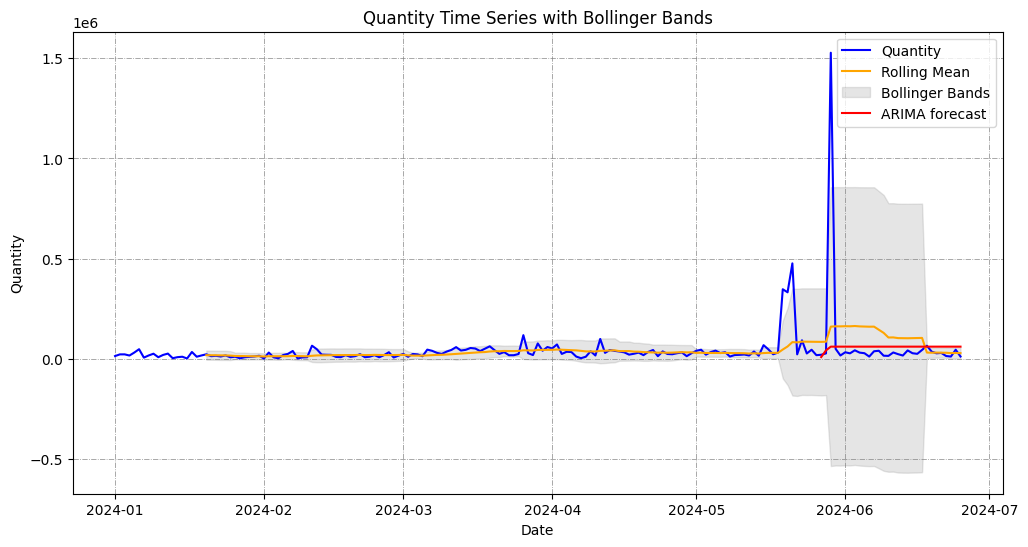

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(target, label = 'Quantity', color = 'blue')
plt.plot(rolling_mean, label = 'Rolling Mean', color = 'orange')
plt.fill_between(target.index, upper_band, lower_band, color = 'grey', alpha = 0.2,label='Bollinger Bands')
plt.plot(forecast, label = 'ARIMA forecast', color = 'red')
plt.title('Quantity Time Series with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(color='gray', linestyle='-.', linewidth=0.6, alpha=0.8)
plt.show()

## We can see that ARIMA Forecast(red line) is parallel to x axis showing the constant(same) prediction over time

In [ ]:
### We use the value of p,d,q are (5,1,3) that is given in pdf

In [ ]:
arima = ARIMA(train_data, order=(5,1,3))
model_fit = arima.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  147
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -1765.273
Date:                Mon, 20 Jan 2025   AIC                           3548.547
Time:                        16:52:44   BIC                           3575.399
Sample:                    01-01-2024   HQIC                          3559.458
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8659      1.137      0.761      0.446      -1.363       3.095
ar.L2         -0.6587      1.032     -0.638      0.523      -2.681       1.363
ar.L3         -0.1208      0.412     -0.293      0.7

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = model_fit.forecast(steps=len(test_data))
print(forecast)

2024-05-27      260.528486
2024-05-28    22789.942618
2024-05-29    76958.068400
2024-05-30    92618.040614
2024-05-31    66580.196716
2024-06-01    43443.057560
2024-06-02    58863.698415
2024-06-03    82821.627203
2024-06-04    78925.935137
2024-06-05    53973.616056
2024-06-06    46234.187355
2024-06-07    63812.504996
2024-06-08    78383.353009
2024-06-09    69200.556753
2024-06-10    52853.487848
2024-06-11    53842.258090
2024-06-12    68716.357553
2024-06-13    74239.859114
2024-06-14    63692.084167
2024-06-15    54281.641004
2024-06-16    59444.778798
2024-06-17    69853.436671
2024-06-18    69837.187002
2024-06-19    60730.523726
2024-06-20    56826.535276
2024-06-21    63088.993401
2024-06-22    69200.626034
2024-06-23    66366.079460
2024-06-24    59812.391112
2024-06-25    59461.370207
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
forecast.shape

(30,)

In [ ]:
#Bollinger Bands
rolling_mean = target.rolling(window=20).mean()
rolling_std = target.rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)

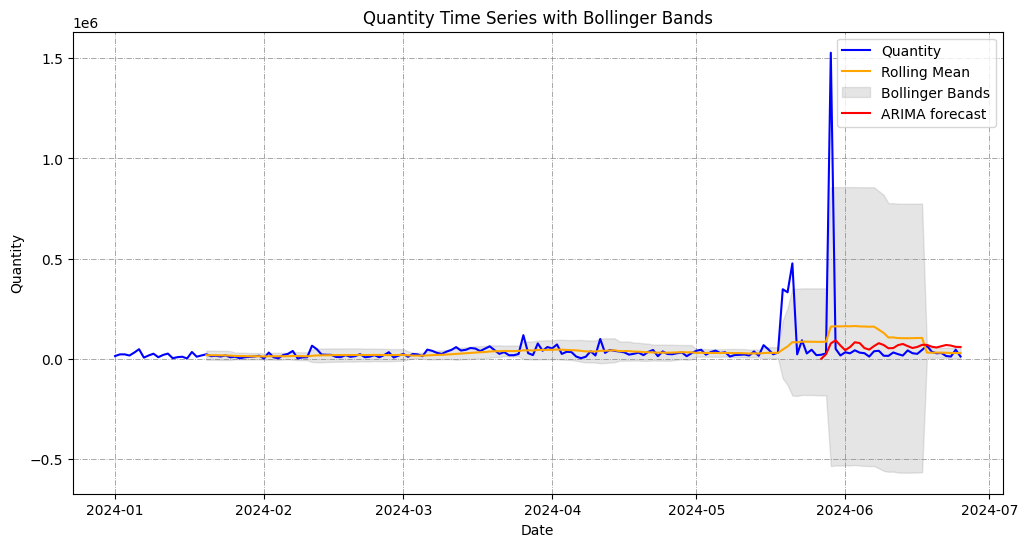

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(target, label = 'Quantity', color = 'blue')
plt.plot(rolling_mean, label = 'Rolling Mean', color = 'orange')
plt.fill_between(target.index, upper_band, lower_band, color = 'grey', alpha = 0.2,label='Bollinger Bands')
plt.plot(forecast, label = 'ARIMA forecast', color = 'red')
plt.title('Quantity Time Series with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(color='gray', linestyle='-.', linewidth=0.6, alpha=0.8)
plt.show()

## **Hyper Parameter Tuning of ARIMA**

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
import optuna
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('/content/NEAR_token_transaction_data.xlsx')

df.dropna(subset=['Quantity'], inplace=True)
df.drop_duplicates(inplace=True)

df['DateTime'] = pd.to_datetime(df['DateTime (UTC)'])
df.set_index('DateTime', inplace=True)
df = df.sort_index()

target = df['Quantity'].resample('D').sum()

## Scaling the data
scaler = MinMaxScaler()
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1)).flatten()
train_data = target_scaled[:-30]
test_data = target_scaled[-30:]

print(len(train_data))
print(len(test_data))

147
30


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -4.4311537618626335
p-value: 0.0002613336795092048


In [ ]:
def objective(trial):
    # Suggest hyperparameters for ARIMA
    p = trial.suggest_int('p', 0, 5)
    d = trial.suggest_int('d', 0, 1)
    q = trial.suggest_int('q', 0, 3)

    try:
        # Train ARIMA model
        model = ARIMA(train_data, order=(p, d, q))
        model_fit = model.fit()

        # Make predictions
        predictions = model_fit.forecast(steps=len(test_data))
        error = mean_squared_error(test_data, predictions)
        return error
    except:
        return float('inf')  # Handle non-converging models

# Create Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best hyperparameters and score
print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2025-01-20 19:32:58,198] A new study created in memory with name: no-name-fd75152d-d313-4fd7-95b2-d612504e5dad
[I 2025-01-20 19:33:03,421] Trial 0 finished with value: 0.031703698125054004 and parameters: {'p': 4, 'd': 0, 'q': 1}. Best is trial 0 with value: 0.031703698125054004.
[I 2025-01-20 19:33:06,256] Trial 1 finished with value: 0.03171575286931186 and parameters: {'p': 5, 'd': 0, 'q': 3}. Best is trial 0 with value: 0.031703698125054004.
[I 2025-01-20 19:33:06,340] Trial 2 finished with value: 0.03237316341336878 and parameters: {'p': 1, 'd': 1, 'q': 0}. Best is trial 0 with value: 0.031703698125054004.
[I 2025-01-20 19:33:07,966] Trial 3 finished with value: 0.03097365343267055 and parameters: {'p': 5, 'd': 1, 'q': 1}. Best is trial 3 with value: 0.03097365343267055.
[I 2025-01-20 19:33:09,985] Trial 4 finished with value: 0.029658631162311377 and parameters: {'p': 5, 'd': 1, 'q': 2}. Best is trial 4 with value: 0.029658631162311377.
[I 2025-01-20 19:33:11,936] Trial 5 fini

Best parameters: {'p': 5, 'd': 1, 'q': 2}
Best RMSE: 0.029658631162311377


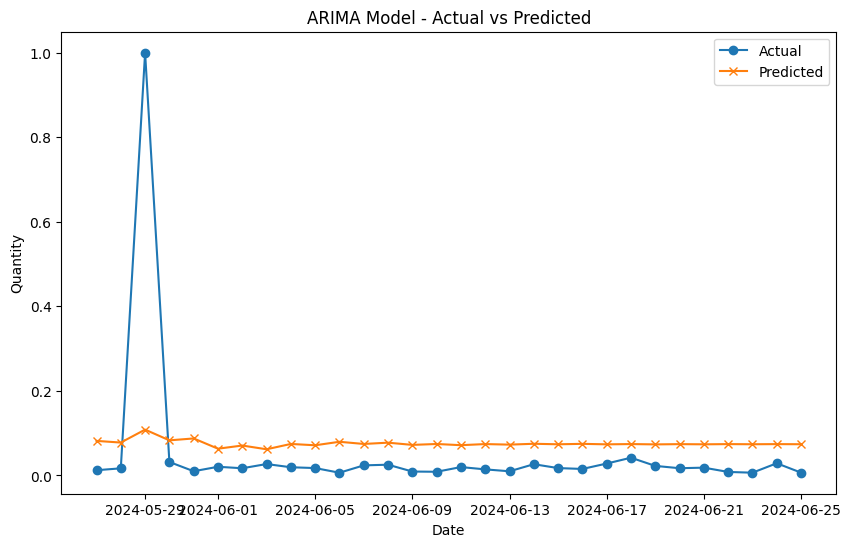

In [ ]:
test_data_series = pd.Series(test_data, index=target[-30:].index)

# Generating predictions
model = ARIMA(train_data, order=(5, 1, 2))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test_data))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(test_data_series.index, test_data, label='Actual', marker='o')
plt.plot(test_data_series.index, predictions, label='Predicted', marker='x')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


In [ ]:
print(predictions)

[0.0816447  0.07772754 0.10833433 0.08296532 0.08743824 0.06321343
 0.07068073 0.06183137 0.07442711 0.07129904 0.07954742 0.07441791
 0.07744098 0.07220109 0.07432946 0.07150644 0.07413513 0.07282356
 0.07484775 0.0736334  0.07467462 0.0735002  0.07414404 0.07337357
 0.07397983 0.07355346 0.07404354 0.07372562 0.07402719 0.07374987]


In [ ]:
rolling_mean = target.rolling(window=30).mean()
rolling_std = target.rolling(window=30).std()
upper_band = rolling_mean + (2 * rolling_std)
lower_band = rolling_mean - (2 * rolling_std)

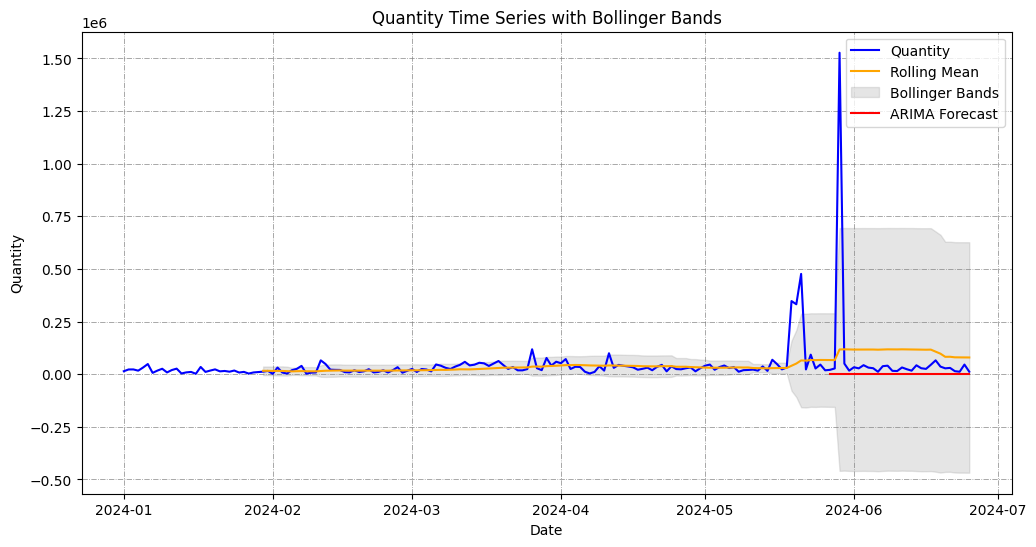

In [ ]:
plt.figure(figsize=(12, 6))

predictions_series = pd.Series(predictions, index=target[-30:].index)

plt.plot(target, label='Quantity', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.fill_between(target.index, upper_band, lower_band, color='grey', alpha=0.2, label='Bollinger Bands')
plt.plot(predictions_series, label='ARIMA Forecast', color='red')

plt.title('Quantity Time Series with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(color='gray', linestyle='-.', linewidth=0.6, alpha=0.8)

plt.show()


### Mann-Whitney U test

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

date = '2024-03-29'


till_29_march = df[df['DateTime (UTC)'] <= date]['Quantity']
after_29_march = df[df['DateTime (UTC)'] > date]['Quantity']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(after_29_march,till_29_march,alternative='two-sided')

print(f"Mann-Whitney U statistic: {stat}")
print(f"p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis - There is a significant difference in transaction volumes")
else:
    print("Fail to reject null hypothesis - No significant difference in transaction volumes")

Mann-Whitney U statistic: 35990313.0
p-value: 1.557107274421816e-73
Reject null hypothesis - There is a significant difference in transaction volumes


# **LSTM**

In [ ]:
data.head()

Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
2  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
3  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
4  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...  18909149     1704070319   

       DateTime (UTC)                                        From  \
0 2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
1 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3 2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4 2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                           To    Quantity           Method  
0  0x776a0725094cbf984e31b43d17e8aaec3c88294a   36.593837  Sell To Uniswap  
1  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  104.984275       0x415565b0  
2  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.079035       0x415565b0  
3  0xd98d9d8c5a70df5d5d8e39847ce254347a59816b  104.984275       0x415565b0  
4  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   10.247435       0x415565b0

In [ ]:
numerical_columns = [
    'Quantity','From Activity Count',
    'To Activity Count', 'Cumulative Quantity',
    'from_degree_centrality', 'from_betweenness_centrality',
    'from_closeness_centrality', 'to_degree_centrality',
    'to_betweenness_centrality', 'to_closeness_centrality',
]



In [ ]:
lstm_data = data[numerical_columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(lstm_data)

sequence_length = 30
X, y = [], []
for i in range(sequence_length, len(normalized_data)):
    X.append(normalized_data[i-sequence_length:i])
    y.append(normalized_data[i,0])

X, y = np.array(X), np.array(y)

X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.80 , random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15844, 30, 14)
(3962, 30, 14)
(15844,)
(3962,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout ,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

# LSTM Architecture
model = Sequential([
    LSTM(64, input_shape=(sequence_length,X_train.shape[2]), return_sequences=True,kernel_regularizer=l2(0.001)),
    LeakyReLU(0.01),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(32, return_sequences=False,kernel_regularizer=l2(0.001)),
    LeakyReLU(0.01),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1)
])

## Early Stopping is used to prevent overfitting of the model while training
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0005,
    patience=5,
    verbose=1,
    mode="auto",
    restore_best_weights=True,
)

## Model Compilation
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,057 (129.13 KB)

 Trainable params: 32,865 (128.38 KB)

 Non-trainable params: 192 (768.00 B)

None


In [ ]:
## Model Training
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.7916 - mae: 0.6222 - val_loss: 0.0973 - val_mae: 0.0718
Epoch 2/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2535 - mae: 0.3153 - val_loss: 0.0764 - val_mae: 0.0398
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1268 - mae: 0.1812 - val_loss: 0.0617 - val_mae: 0.0163
Epoch 4/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0785 - mae: 0.1090 - val_loss: 0.0507 - val_mae: 0.0095
Epoch 5/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0548 - mae: 0.0624 - val_loss: 0.0418 - val_mae: 0.0053
Epoch 6/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0415 - mae: 0.0324 - val_loss: 0.0346 - val_mae: 0.0035
Epoch 7/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0333 - mae: 0.0161 - val_loss: 0.0287 - val_mae: 0.0017
Epoch 8/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0272 - mae: 0.0070 - val_loss: 0.0239 - val_mae: 9.9827e-04
Epoch 9/100
248/248 ━━━━━━━━━━━━━━━━━━━━

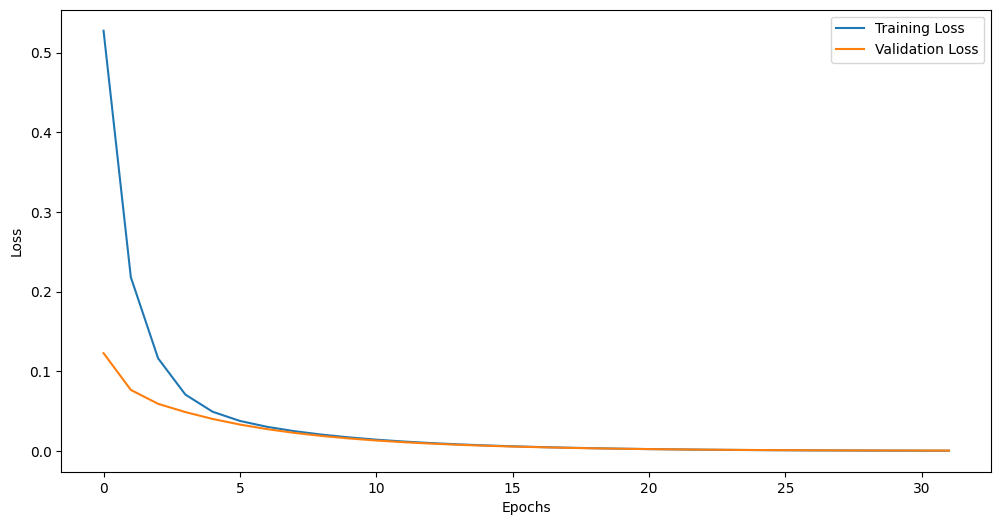

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

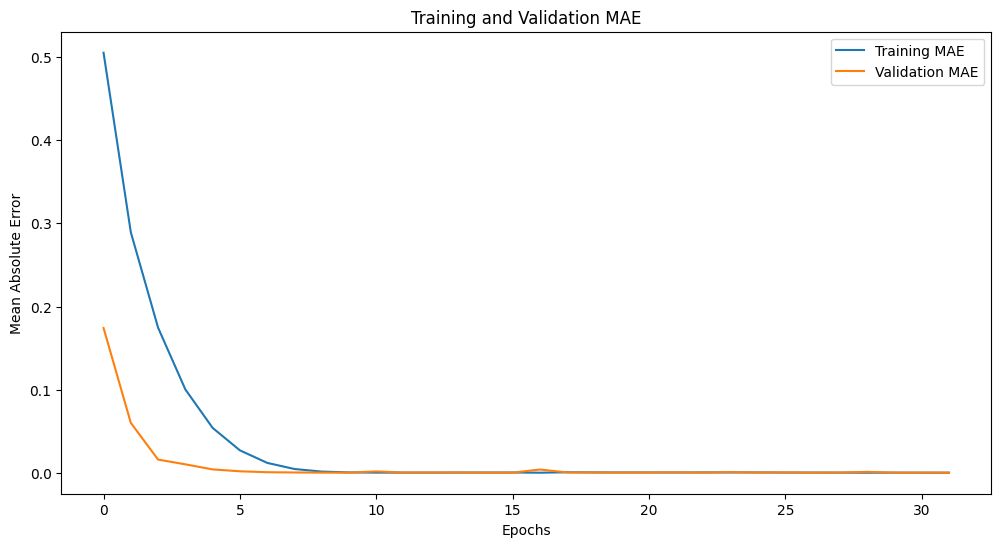

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error: 0.0002846816706258387
Mean Absolute Error: 0.002540943328087892


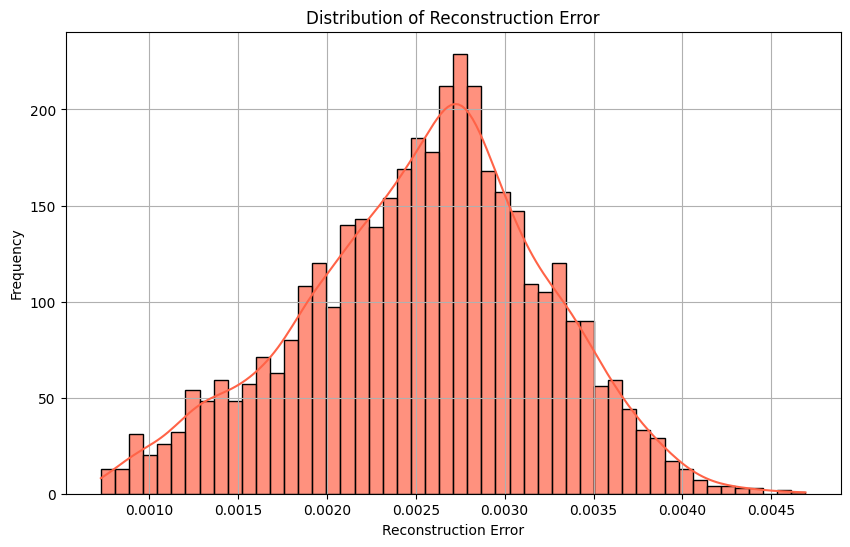

In [ ]:
reconstruction_error = np.mean(np.abs(predictions - y_test), axis=1)

plt.figure(figsize=(10,6))
sns.histplot(reconstruction_error, bins=50, color='tomato', alpha=0.7,kde = True)
plt.title("Distribution of Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


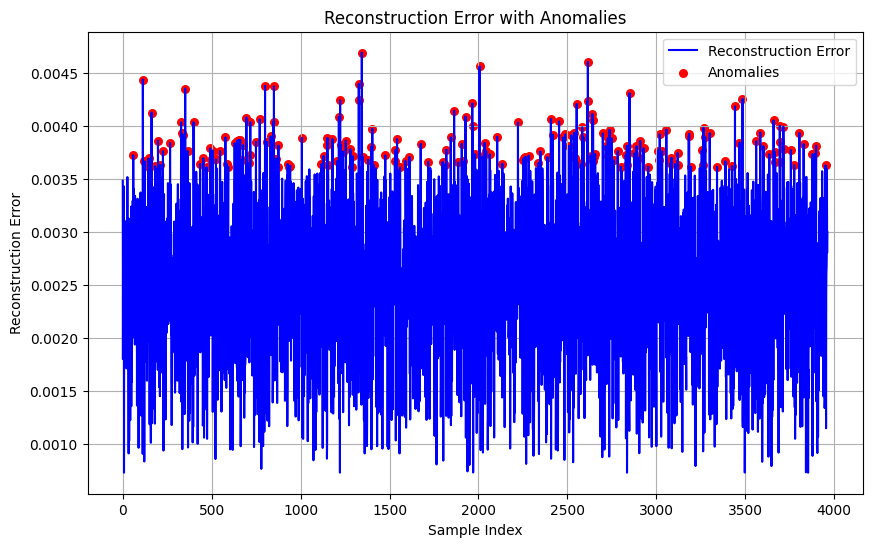

In [ ]:
threshold = np.percentile(reconstruction_error, 95)

anomalies = reconstruction_error > threshold

# Plot the reconstruction error with anomalies marked
plt.figure(figsize=(10,6))
plt.plot(reconstruction_error, label="Reconstruction Error", color='blue')
plt.scatter(np.where(anomalies), reconstruction_error[anomalies], color='red', label="Anomalies", s=30)
plt.title("Reconstruction Error with Anomalies")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.grid(True)
plt.show()


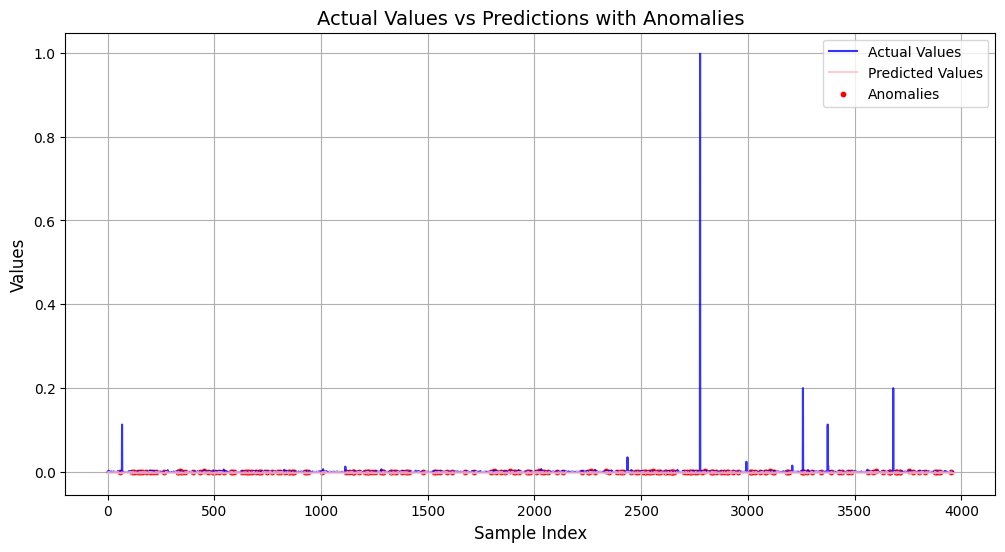

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Values", color="blue", alpha=0.8)
plt.plot(predictions, label="Predicted Values", color="pink", alpha=0.8)
# Mark anomalies
plt.scatter(
    np.where(anomalies)[0],  # Indices of anomalies
    y_test[np.where(anomalies)[0]],  # Actual values corresponding to anomalies
    color="red", label="Anomalies",s=10
)
plt.title("Actual Values vs Predictions with Anomalies", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Total Number of Anomalies detected by LSTM are:-",anomalies.sum())

Total Number of Anomalies detected by LSTM are:- 199


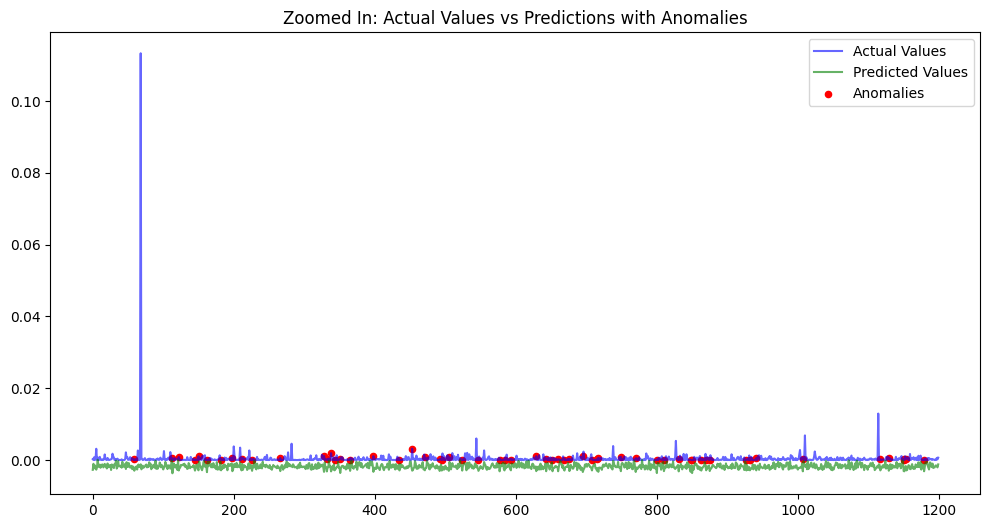

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:1200], label="Actual Values", color="blue", alpha=0.6)
plt.plot(predictions[:1200], label="Predicted Values", color="green", alpha=0.6)
plt.scatter(
    np.where(anomalies[:1200])[0],
    y_test[np.where(anomalies[:1200])[0]],
    color="red", label="Anomalies",s = 20
)
plt.title("Zoomed In: Actual Values vs Predictions with Anomalies")
plt.legend()
plt.show()


# **Hyperparameter Tuning of LSTM Model**

### **Keras Tuner**

In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
#### Hyper Parameter Tuning On LSTM model
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

# LSTM Architecture with tunable hyperparameters
def build_model(hp):
    model = Sequential([
        LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
             activation='relu',
             input_shape=(sequence_length, X_train.shape[2]),
             return_sequences=True),
        BatchNormalization(),
        Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),

        LSTM(units=hp.Int('units_2', min_value=16, max_value=64, step=16),
             activation='relu',
             return_sequences=False),
        BatchNormalization(),
        Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),

        Dense(1)
    ])

    # Compile the model with a tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='mse',
        metrics=['mae']
    )

    return model


In [ ]:
# Set up the tuner with search space and objective
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of models to test
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='lstm_tuning'
)

# Start the search
tuner.search(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)


Trial 10 Complete [00h 00m 46s]
val_loss: 0.0009194833692163229

Best val_loss So Far: 0.0002780876529868692
Total elapsed time: 00h 10m 00s
{'units_1': 96, 'dropout_1': 0.4, 'units_2': 16, 'dropout_2': 0.2, 'learning_rate': 0.000981817647031268}


In [ ]:
best_model = build_model(best_hyperparameters)
historyy = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),callbacks = [early_stopping])

Epoch 1/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 1.0601 - mae: 0.6489 - val_loss: 0.0092 - val_mae: 0.0815
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.1012 - mae: 0.2074 - val_loss: 0.0017 - val_mae: 0.0279
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0341 - mae: 0.1170 - val_loss: 5.5917e-04 - val_mae: 0.0120
Epoch 4/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0120 - mae: 0.0674 - val_loss: 4.6261e-04 - val_mae: 0.0108
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0038 - mae: 0.0384 - val_loss: 2.9965e-04 - val_mae: 0.0041
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


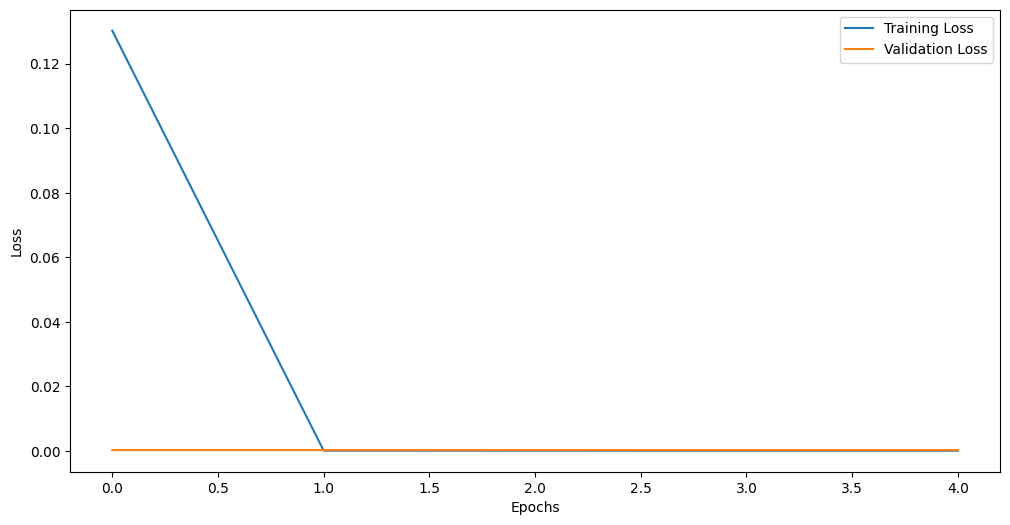

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(historyy.history['loss'] , label = 'Training Loss')
plt.plot(historyy.history['val_loss'] , label = "Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

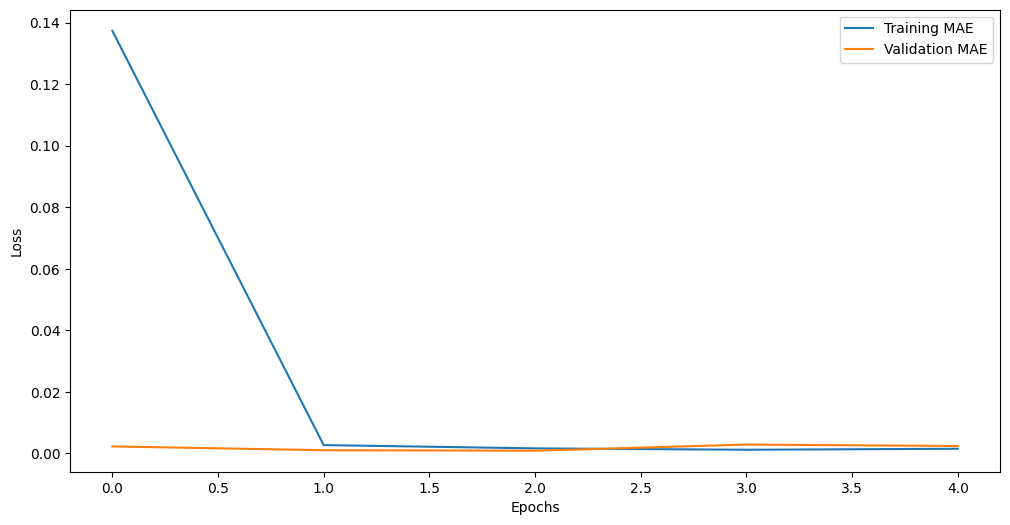

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(historyy.history['mae'] , label = 'Training MAE')
plt.plot(historyy.history['val_mae'] , label = "Validation MAE")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error:", mae)

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Mean Squared Error: 0.009223287006457423
Mean Absolute Error: 0.08149314319788606


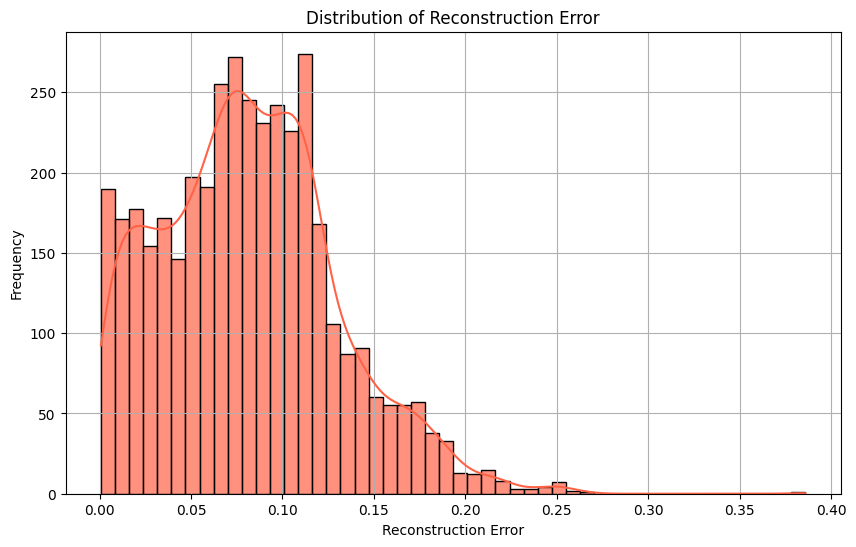

In [ ]:
recnstruction_error = np.mean(np.abs(pred - y_test), axis=1)

plt.figure(figsize=(10,6))
sns.histplot(recnstruction_error, bins=50, color='tomato', alpha=0.7,kde = True)
plt.title("Distribution of Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


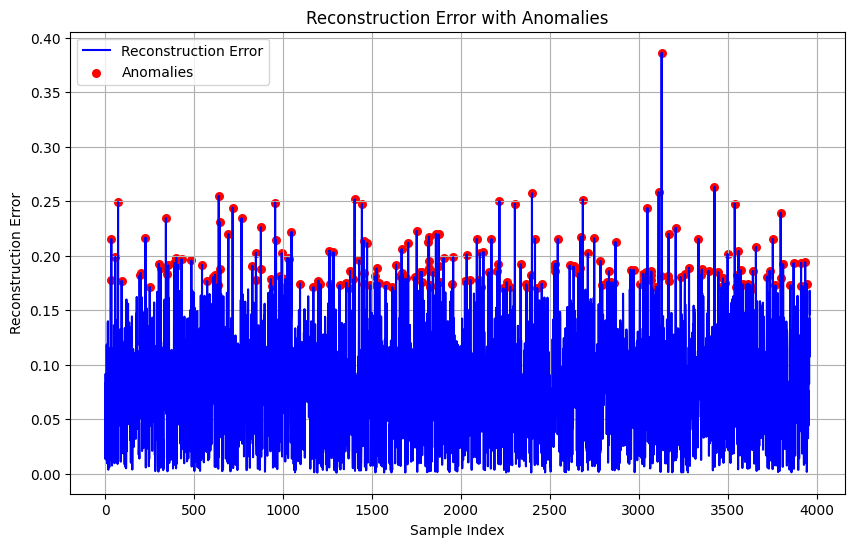

In [ ]:
threshold = np.percentile(recnstruction_error, 95)

anomalies = recnstruction_error > threshold

plt.figure(figsize=(10,6))
plt.plot(recnstruction_error, label="Reconstruction Error", color='blue')
plt.scatter(np.where(anomalies), recnstruction_error[anomalies], color='red', label="Anomalies", s=30)
plt.title("Reconstruction Error with Anomalies")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.grid(True)
plt.show()


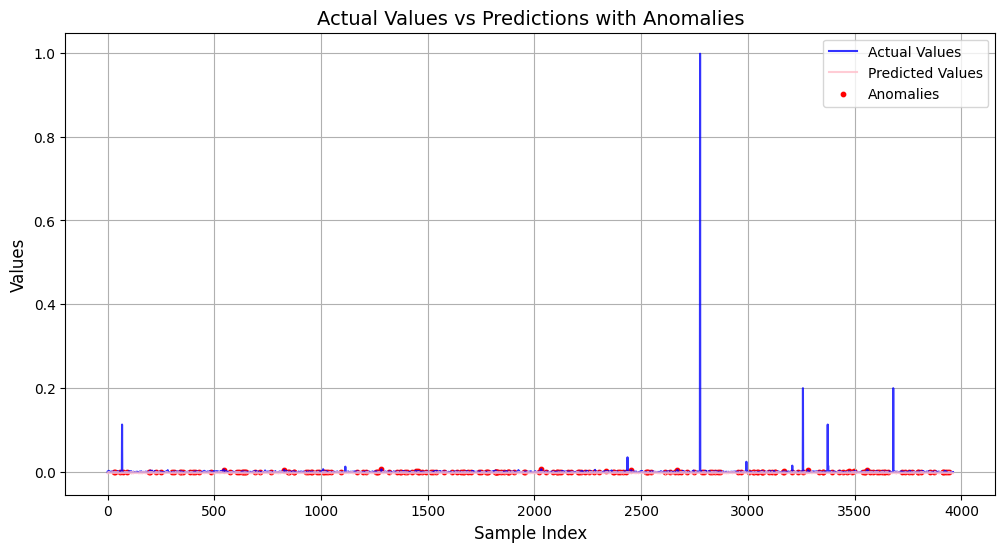

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Values", color="blue", alpha=0.8)
plt.plot(predictions, label="Predicted Values", color="pink", alpha=0.8)
# Mark anomalies
plt.scatter(
    np.where(anomalies)[0],  # Indices of anomalies
    y_test[np.where(anomalies)[0]],  # Actual values corresponding to anomalies
    color="red", label="Anomalies",s=10
)
plt.title("Actual Values vs Predictions with Anomalies", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Total Number of Anomalies detected by LSTM are:-",anomalies.sum())

Total Number of Anomalies detected by LSTM are:- 199


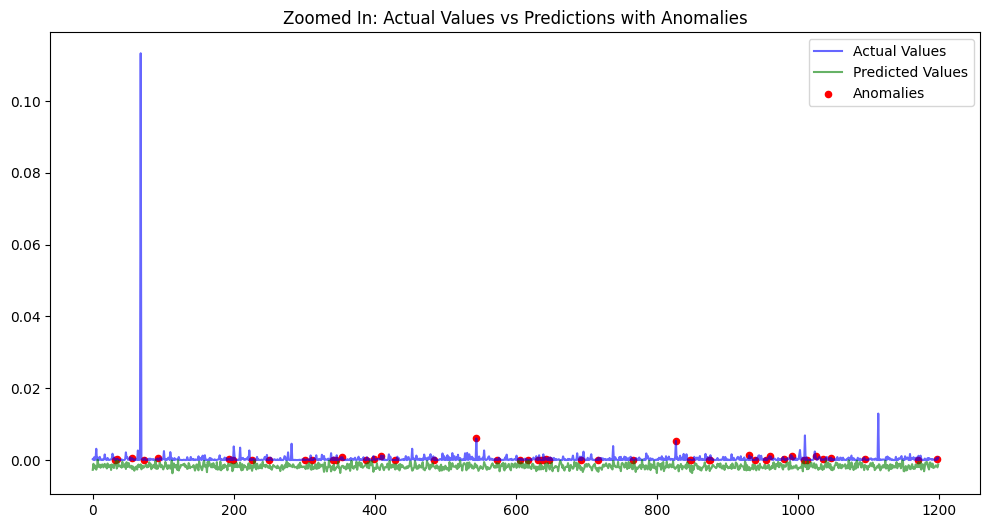

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:1200], label="Actual Values", color="blue", alpha=0.6)
plt.plot(predictions[:1200], label="Predicted Values", color="green", alpha=0.6)
plt.scatter(
    np.where(anomalies[:1200])[0],
    y_test[np.where(anomalies[:1200])[0]],
    color="red", label="Anomalies",s = 20
)
plt.title("Zoomed In: Actual Values vs Predictions with Anomalies")
plt.legend()
plt.show()


# **Advance Feature Engineering**

### **Recursive Feature Elimination**

In [ ]:
print("The total number of features are :-",data[features].shape[1])

The total number of features are :- 20


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Is Outlier']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=10, step=1)  # Select 10 features
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("\n--- Recursive Feature Elimination Results ---")
print("Selected Features:")
for feature in selected_features:
    print(f"- {feature}")

# Optional: Train model on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


model.fit(X_train_selected, y_train)
accuracy = model.score(X_test_selected, y_test)

# Display model accuracy
print("\n--- Model Performance ---")
print(f"Model Accuracy on Test Data: {accuracy:.2%}")



--- Recursive Feature Elimination Results ---
Selected Features:
- Quantity
- Log Quantity
- Z-Score
- To Activity Count
- Cumulative Quantity
- High Quantity Flag
- Is Outlier
- from_betweenness_centrality
- from_closeness_centrality
- to_closeness_centrality

--- Model Performance ---
Model Accuracy on Test Data: 100.00%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_selected)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3963    0]
 [   0    3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3963
           1       1.00      1.00      1.00         3

    accuracy                           1.00      3966
   macro avg       1.00      1.00      1.00      3966
weighted avg       1.00      1.00      1.00      3966



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [1.         1.         1.         0.99974786 1.        ]
Mean CV accuracy: 0.9999495713565306


### **Feature Importance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


X = data[features]
y = data['Is Outlier']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print(model.score(X_test , y_test))

1.0


In [ ]:
importances = dict(zip(data[features], model.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}


In [ ]:
importances

{'Quantity': 0.2678808680278896,
 'Z-Score': 0.2550363796595338,
 'Log Quantity': 0.22012655647579482,
 'Is Outlier': 0.21074670945676746,
 'Cumulative Quantity': 0.015791345310845625,
 'to_betweenness_centrality': 0.00996037664550774,
 'To Activity Count': 0.006751040518564233,
 'From Activity Count': 0.004046789513904182,
 'from_closeness_centrality': 0.0028973371166330464,
 'to_closeness_centrality': 0.002264475015858891,
 'from_degree_centrality': 0.0019290420904154182,
 'hour_cos': 0.0014547635673629593,
 'hour_sin': 0.0006660832366467102,
 'from_betweenness_centrality': 0.0002706120029814183,
 'High Quantity Flag': 0.00017343555179636353,
 'month_sin': 4.185809497825118e-06,
 'Is Self Transaction': 0.0,
 'month_cos': 0.0,
 'is_weekend': 0.0,
 'to_degree_centrality': 0.0}

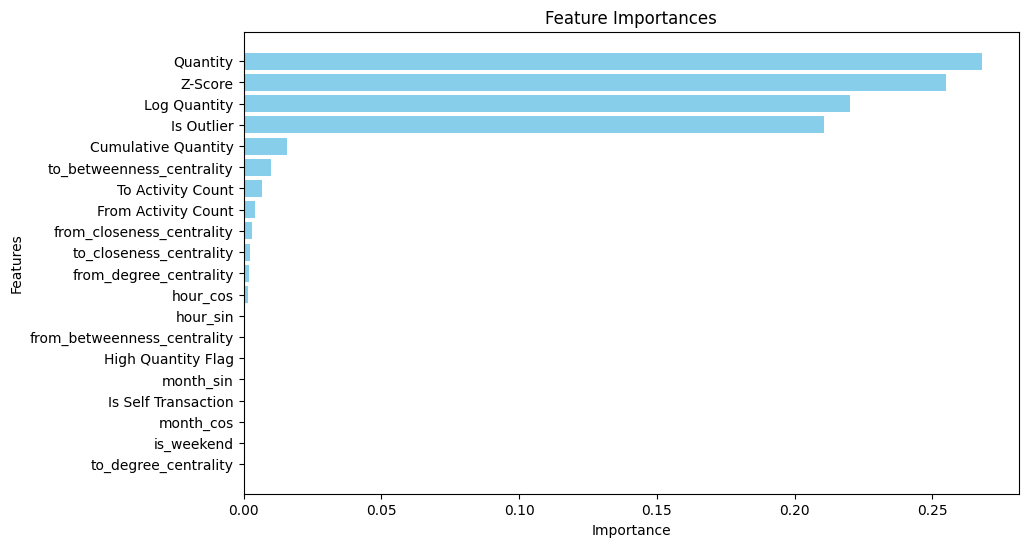

In [ ]:
# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(list(importances.keys()), list(importances.values()), color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()


### **Principle Component Analysis (PCA)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#It checks how much variance each component explains
print(pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))


[0.17344052 0.13970558]
Total Explained Variance: 0.3131461055392233


In [ ]:
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
print(pca_df.head())

        PC1       PC2
0 -0.852601 -1.888684
1 -0.676920 -2.150166
2  0.125961 -2.421254
3  0.362687 -2.808759
4 -0.830245 -1.915500


In [ ]:
final_data = pd.concat([data.reset_index(drop=True), pca_df], axis=1)
final_data

Transaction Hash   Blockno  \
0      0xda5acf232bb67ef707bddd1100399de22958ec868d78...  18912008   
1      0x268988274d6fdeaa8ea69cfe5216fb4b2417c13db973...  18918107   
2      0xa241e495ac6b8cb3cbe202f92360e7bdd7d94fe9c2b0...  18924295   
3      0x674849bc2e38e09e1646b4634d45b1660dabb6f94813...  18929448   
4      0x024e31e1259dc4ce9b66c7c6281fd648d33116fc83df...  18932221   
...                                                  ...       ...   
19824  0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...  19968454   
19825  0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...  19534197   
19826  0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...  18928394   
19827  0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...  19765229   
19828  0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...  19772311   

       UnixTimestamp      DateTime (UTC)  \
0         1704105059 2024-01-01 10:30:59   
1         1704179207 2024-01-02 07:06:47   
2         1704254159 2024-01-03 03:55:59   
3         1704316679 2024-01-03 21:17:59   
4         1704350195 2024-01-04 06:36:35   
...              ...                 ...   
19824     1716900371 2024-05-28 12:46:11   
19825     1711648847 2024-03-28 18:00:47   
19826     1704303815 2024-01-03 17:43:35   
19827     1714445183 2024-04-30 02:46:23   
19828     1714530635 2024-05-01 02:30:35   

                                             From  \
0      0x0000000000000000000000000000000000000000   
1      0x0000000000000000000000000000000000000000   
2      0x0000000000000000000000000000000000000000   
3      0x0000000000000000000000000000000000000000   
4      0x0000000000000000000000000000000000000000   
...                                           ...   
19824  0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7   
19825  0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19   
19826  0xffdd86656bfda703ef8274241eb87f4106d621f3   
19827  0xffdf1088b819160a606e831006d26545ee6247cb   
19828  0xfff86f2d5c12985592ec73795a6c1705fafdd25e   

                                               To  Quantity  Method   Z-Score  \
0      0x5de0be2b0530fbf72f7f01dc1f9a789226cd2d03 -0.046785      27 -0.046785   
1      0x3e720e486eeda2a69ca8a4c8f27fa22e30bbae30 -0.029103      27 -0.029103   
2      0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675  0.003810      27  0.003810   
3      0x6889de313803839ce3e15996a86167f639b4a634  0.452257      27  0.452257   
4      0xa5b7b4eb029295159d9b3df038b343a2169032d3 -0.046085      27 -0.046085   
...                                           ...       ...     ...       ...   
19824  0xe37e799d5077682fa0a244d46e5649f71457bd09 -0.046809      60 -0.046809   
19825  0x6469b34a2a4723163c4902dbbdea728d20693c12 -0.038067      81 -0.038067   
19826  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  0.008382       1  0.008382   
19827  0xc0ca6621368471b9ee92bedc5573e241ceb6254c -0.028207      76 -0.028207   
19828  0xe37e799d5077682fa0a244d46e5649f71457bd09 -0.044048      60 -0.044048   

          month  ...  from_closeness_centrality  to_degree_centrality  \
0     -2.099620  ...                  -1.117979             -0.796468   
1     -2.099620  ...                  -1.117979             -0.793819   
2     -2.099620  ...                  -1.117979             -0.769980   
3     -2.099620  ...                  -1.117979             -0.769980   
4     -2.099620  ...                  -1.117979             -0.796468   
...         ...  ...                        ...                   ...   
19824  0.616013  ...                  -1.485672              0.098813   
19825 -0.741804  ...                  -0.841454              2.016515   
19826 -2.099620  ...                  -4.454954              1.394056   
19827 -0.062895  ...                  -1.149259             -0.793819   
19828  0.616013  ...                  -1.108667              0.098813   

       to_betweenness_centrality  to_closeness_centrality      hour_sin  \
0                      -0.654089                -1.743583  5.000000e-01   
1                      -0.654089 

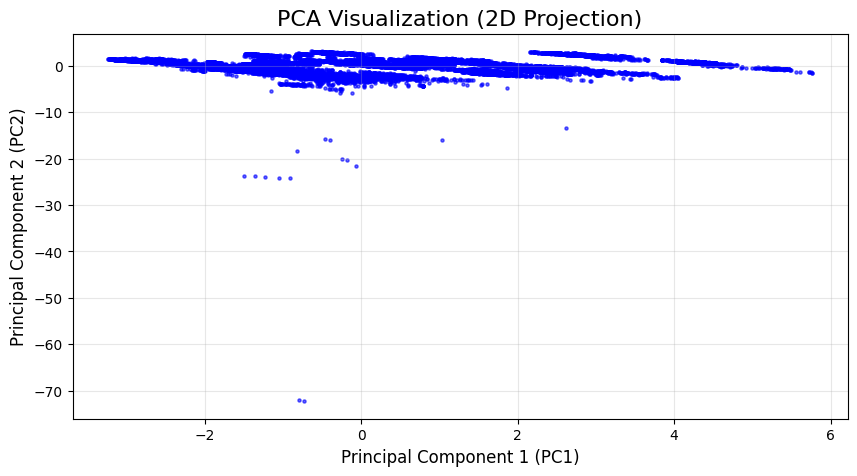

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(final_data["PC1"], final_data["PC2"], alpha=0.6, s=5, c="b")
plt.title("PCA Visualization (2D Projection)", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)", fontsize=12)
plt.ylabel("Principal Component 2 (PC2)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### **Linear Discriminant Analysis (LDA)**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler

features = [
    'Quantity', 'Log Quantity','Z-Score','From Activity Count',
    'To Activity Count', 'Cumulative Quantity','High Quantity Flag',
    'Is Self Transaction','hour_sin',
    'hour_cos','month_sin','month_cos',
    'is_weekend','from_degree_centrality',
    'from_betweenness_centrality',
    'from_closeness_centrality', 'to_degree_centrality',
    'to_betweenness_centrality', 'to_closeness_centrality'
]
X = data[features]
y = data['Is Outlier']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
lda = LDA(n_components = 1)
X_lda = lda.fit_transform(X_scaled, y)

lda_df = pd.DataFrame(X_lda, columns=['LD1'])
lda_df['Class'] = y

In [ ]:
print(f"Number of components created by LDA: {X_lda.shape[1]}")

Number of components created by LDA: 1


In [ ]:
# 1 new feature (LD1), which is a linear combination of the original features that maximizes class separation.
final_data = pd.concat([lda_df, pd.DataFrame(X_scaled, columns=[f"Feature_{i+1}" for i in range(X_scaled.shape[1])])], axis=1)
final_data.head()

LD1  Class  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0 -0.012365    0.0   0.000005   0.109523   0.000005   0.079272   0.000000   
1  0.266117    0.0   0.000193   0.368397   0.000193   0.079272   0.000000   
2  0.003910    0.0   0.000545   0.444651   0.000545   0.079272   0.033584   
3  0.750743    0.0   0.005333   0.613129   0.005333   0.079272   0.137343   
4  0.056711    0.0   0.000012   0.170211   0.000012   0.079272   0.000000   

   Feature_6  Feature_7  Feature_8  ...  Feature_10  Feature_11  Feature_12  \
0   0.000003        0.0        0.0  ...    0.066987         0.0         0.0   
1   0.000117        0.0        0.0  ...    0.370590         0.0         0.0   
2   0.000438        1.0        0.0  ...    0.853553         0.0         0.0   
3   0.003584        1.0        0.0  ...    0.853553         0.0         0.0   
4   0.003591        0.0        0.0  ...    0.500000         0.0         0.0   

   Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  \
0         0.0     0.23258    0.123075    0.607831    0.000000         0.0   
1         0.0     0.23258    0.123075    0.607831    0.000942         0.0   
2         0.0     0.23258    0.123075    0.607831    0.009416         0.0   
3         0.0     0.23258    0.123075    0.607831    0.009416         0.0   
4         0.0     0.23258    0.123075    0.607831    0.000000         0.0   

   Feature_19  
0    0.462445  
1    0.462213  
2    0.673717  
3    0.670761  
4    0.462445  

[5 rows x 21 columns]

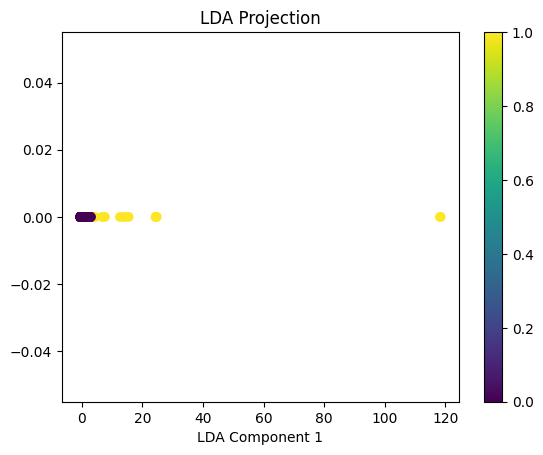

In [ ]:
# This visualization tells how well the classes are separated along that axis
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap='viridis')
plt.title('LDA Projection')
plt.xlabel('LDA Component 1')
plt.colorbar()
plt.show()

# **Hyper Parameter Tuning**

### **Isolation Forest**

**Random Search**

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV

X = data[features]
model = IsolationForest()

params = {
    'n_estimators':[50,100,200,300],
    'max_samples':['auto',0.5,0.8],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [1, 2, 3],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=params,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1,)

random_search.fit(X)
print("Best Parameters:" , random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'max_samples': 0.8, 'max_features': 2, 'contamination': 0.1, 'bootstrap': False}


In [ ]:
from sklearn.metrics import silhouette_score
best_model = random_search.best_estimator_

pred = best_model.predict(X)

num_outliers = np.sum(pred == -1)
print(f"Number of outliers detected: {num_outliers}")

sil_score = silhouette_score(X, pred)
print("Silhouette Score of the best model:", sil_score)

Number of outliers detected: 1983
Silhouette Score of the best model: 0.11304706892662555


**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_model = IsolationForest()

param_grid = {
     'n_estimators':[50,100,200,300],
    'max_samples':['auto',0.5,0.8],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [1, 2, 3],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(
    grid_model,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1)


grid_search.fit(X)

print(f"Best parameters using Grid Search: {grid_search.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters using Grid Search: {'bootstrap': True, 'contamination': 0.01, 'max_features': 1, 'max_samples': 'auto', 'n_estimators': 50}


In [ ]:
from sklearn.metrics import silhouette_score
best_model = grid_search.best_estimator_

grid_pred = best_model.predict(X)

num_outliers = np.sum(grid_pred == -1)
print(f"Number of outliers detected: {num_outliers}")

sil_score = silhouette_score(X, grid_pred)
print("Silhouette Score of the best model:", sil_score)

Number of outliers detected: 199
Silhouette Score of the best model: 0.407460647852069


**Optuna**

In [ ]:
import optuna

def objective_iso_forest(trial):
    n_estimators = trial.suggest_int('n_estimators', 50,300,step = 50)
    max_samples = trial.suggest_categorical('max_samples',['auto', 0.5,0.8])
    contamination = trial.suggest_float('contamination', 0.01,0.1,step = 0.01)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    max_features = trial.suggest_float('max_features',0.5,1.0, step = 0.1)

    optuna_model = IsolationForest(
        n_estimators=n_estimators,
        max_samples=max_samples,
        contamination=contamination,
        bootstrap=bootstrap,
        max_features=max_features)

    optuna_model.fit(X)

    optuna_pred = model.fit_predict(X)
    optuna_pred = [1 if x == -1 else 0 for x in optuna_pred]

    optuna_score = silhouette_score(X, optuna_pred)

    return optuna_score

study = optuna.create_study(direction='maximize')
study.optimize(objective_iso_forest, n_trials=50)

print(f"Best parameters found by Optuna: {study.best_params}")

[I 2025-01-20 12:36:33,609] A new study created in memory with name: no-name-b8a11075-aa25-4587-a547-065cf2ee3e0a
[I 2025-01-20 12:36:41,162] Trial 0 finished with value: 0.08411757889569405 and parameters: {'n_estimators': 200, 'max_samples': 0.5, 'contamination': 0.060000000000000005, 'bootstrap': False, 'max_features': 0.8}. Best is trial 0 with value: 0.08411757889569405.
[I 2025-01-20 12:36:49,485] Trial 1 finished with value: 0.06973442798885314 and parameters: {'n_estimators': 150, 'max_samples': 0.8, 'contamination': 0.09, 'bootstrap': True, 'max_features': 0.6}. Best is trial 0 with value: 0.08411757889569405.
[I 2025-01-20 12:36:57,313] Trial 2 finished with value: 0.07939866719187304 and parameters: {'n_estimators': 200, 'max_samples': 0.8, 'contamination': 0.060000000000000005, 'bootstrap': True, 'max_features': 0.8}. Best is trial 0 with value: 0.08411757889569405.
[I 2025-01-20 12:37:07,304] Trial 3 finished with value: 0.08326374958511566 and parameters: {'n_estimators':

Best parameters found by Optuna: {'n_estimators': 100, 'max_samples': 0.8, 'contamination': 0.09, 'bootstrap': False, 'max_features': 0.7}


In [ ]:
from sklearn.metrics import silhouette_score

best_model = IsolationForest(
    n_estimators=study.best_params['n_estimators'],
    max_samples=study.best_params['max_samples'],
    contamination=study.best_params['contamination'],
    bootstrap=study.best_params['bootstrap'],
    max_features=study.best_params['max_features']
)

best_model.fit(X)

optuna_pred = best_model.predict(X)

num_outliers = np.sum(optuna_pred == -1)
print(f"Number of outliers detected: {num_outliers}")

sil_score = silhouette_score(X, optuna_pred)
print("Silhouette Score of the best model:", sil_score)

Number of outliers detected: 1785
Silhouette Score of the best model: 0.154833550385563


**HyperOpt**

In [ ]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score

def objective_iso_forest(params):
    n_estimators = params['n_estimators']
    max_samples = params['max_samples']
    contamination = params['contamination']
    bootstrap = params['bootstrap']
    max_features = params['max_features']

    # Initializing hyperparameters
    model = IsolationForest(n_estimators=n_estimators, max_samples=max_samples, contamination=contamination,
                            bootstrap=bootstrap, max_features=max_features)

    model.fit(X)

    pred = model.predict(X)
    pred = [1 if x == -1 else 0 for x in pred]
    best_model = model
    score = silhouette_score(X, pred)

    return -score

# Define the search space for Hyperopt
space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200, 300]),
    'max_samples': hp.uniform('max_samples', 0.5, 1.0),
    'contamination': hp.uniform('contamination', 0.01, 0.1),
    'bootstrap': hp.choice('bootstrap', [True, False]),
    'max_features': hp.uniform('max_features', 0.5, 1.0)
}

trials = Trials()
best = fmin(fn=objective_iso_forest, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print(f"Best parameters found by Hyperopt: {best}")

100%|██████████| 50/50 [07:07<00:00,  8.55s/trial, best loss: -0.39751964791685207]
Best parameters found by Hyperopt: {'bootstrap': 1, 'contamination': 0.010419332630487865, 'max_features': 0.9811594999290787, 'max_samples': 0.7091004616238848, 'n_estimators': 2}


In [ ]:
if best_model:
    best_pred = best_model.predict(X)

    # Count the number of outliers (-1) in the prediction
    num_outliers = np.sum(best_pred == -1)
    print(f"Number of outliers detected: {num_outliers}")

    best_pred = [1 if x == -1 else 0 for x in best_pred]
    sil_score = silhouette_score(X, best_pred)
    print(f"Silhouette Score of the best model: {sil_score}")

Number of outliers detected: 1785
Silhouette Score of the best model: 0.154833550385563


### **Local Outlier Factor**

**Random Search**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV

X = data[features]

# LOF Model
lof = LocalOutlierFactor()

# Random Search parameter distribution
param_dist = {
    'n_neighbors': [5, 10, 20, 30],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2],  # L1 or L2 distance
    'novelty': [False]
}

# Randomized Search
random_search = RandomizedSearchCV(lof, param_dist, n_iter=10, cv=5, random_state=42, scoring='accuracy')
random_search.fit(X)

print(f"Best parameters using Random Search: {random_search.best_params_}")


Best parameters using Random Search: {'p': 1, 'novelty': False, 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 50}


In [ ]:
best_lof = random_search.best_estimator_
lof_pred = best_lof.fit_predict(X)
num_outliers = np.sum(lof_pred == -1)
print(f"Number of outliers detected: {num_outliers}")

# Convert LOF predictions to 0 for normal, 1 for outliers for silhouette score
lof_pred_silhouette = [1 if x == -1 else 0 for x in lof_pred]

# Calculate the silhouette score
sil_score = silhouette_score(X, lof_pred_silhouette)
print(f"Silhouette Score of the best LOF model: {sil_score}")

Number of outliers detected: 1192
Silhouette Score of the best LOF model: 0.05956879317073604


**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

lof = LocalOutlierFactor()

# Grid Search parameter grid
param_grid = {
    'n_neighbors': [5, 10],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [20, 30],
    'p': [1, 2],
    'novelty': [False]
}

# Grid Search
grid_search = GridSearchCV(lof, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X)

print(f"Best parameters using Grid Search: {grid_search.best_params_}")


Best parameters using Grid Search: {'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 5, 'novelty': False, 'p': 1}


In [ ]:
best_lof = grid_search.best_estimator_
lof_pred = best_lof.fit_predict(X)
num_outliers = np.sum(lof_pred == -1)
print(f"Number of outliers detected: {num_outliers}")

lof_pred_silhouette = [1 if x == -1 else 0 for x in lof_pred]

# Calculate the silhouette score
sil_score = silhouette_score(X, lof_pred_silhouette)
print(f"Silhouette Score of the best LOF model: {sil_score}")

Number of outliers detected: 835
Silhouette Score of the best LOF model: 0.0867635108597044


**Optuna**

In [ ]:
import optuna
from sklearn.neighbors import LocalOutlierFactor

def objective_lof(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 5, 30)
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan'])
    leaf_size = trial.suggest_int('leaf_size', 20, 50)
    p = trial.suggest_int('p', 1, 2)
    novelty = trial.suggest_categorical('novelty', [False])

    model = LocalOutlierFactor(n_neighbors=n_neighbors, metric=metric, leaf_size=leaf_size, p=p, novelty=novelty)
    model.fit(X)

    optuna_pred = model.fit_predict(X)
    optuna_pred = [1 if x == -1 else 0 for x in optuna_pred]

    optuna_score = silhouette_score(X, optuna_pred)

    return optuna_score


# Create a study object
study = optuna.create_study(direction='maximize')
study.optimize(objective_lof, n_trials=50)

print(f"Best parameters found by Optuna: {study.best_params}")

[I 2025-01-20 13:36:01,356] A new study created in memory with name: no-name-25c6b23d-2523-4a15-bd28-7476e749edd0
[I 2025-01-20 13:36:17,239] Trial 0 finished with value: 0.17505133514727678 and parameters: {'n_neighbors': 9, 'metric': 'euclidean', 'leaf_size': 20, 'p': 1, 'novelty': False}. Best is trial 0 with value: 0.17505133514727678.
[I 2025-01-20 13:36:28,707] Trial 1 finished with value: 0.238066441994273 and parameters: {'n_neighbors': 14, 'metric': 'euclidean', 'leaf_size': 49, 'p': 1, 'novelty': False}. Best is trial 1 with value: 0.238066441994273.
[I 2025-01-20 13:36:41,471] Trial 2 finished with value: 0.26863762276235825 and parameters: {'n_neighbors': 26, 'metric': 'euclidean', 'leaf_size': 31, 'p': 1, 'novelty': False}. Best is trial 2 with value: 0.26863762276235825.
[I 2025-01-20 13:37:07,459] Trial 3 finished with value: 0.2179320288530678 and parameters: {'n_neighbors': 26, 'metric': 'manhattan', 'leaf_size': 23, 'p': 2, 'novelty': False}. Best is trial 2 with valu

Best parameters found by Optuna: {'n_neighbors': 29, 'metric': 'euclidean', 'leaf_size': 32, 'p': 1, 'novelty': False}


In [ ]:
from sklearn.metrics import silhouette_score

best_model = LocalOutlierFactor(
    n_neighbors=study.best_params['n_neighbors'],
    metric=study.best_params['metric'],
    leaf_size=study.best_params['leaf_size'],
    p=study.best_params['p'],
    novelty=study.best_params['novelty']
)

best_model.fit(X)

optuna_pred = best_model.fit_predict(X)

num_outliers = np.sum(optuna_pred == -1)
print(f"Number of outliers detected: {num_outliers}")

sil_score = silhouette_score(X, optuna_pred)
print("Silhouette Score of the best model:", sil_score)

Number of outliers detected: 261
Silhouette Score of the best model: 0.30316737108632413


**HyperOpt**

In [ ]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score

# Define the objective function for LOF
def objective_lof(params):
    n_neighbors = params['n_neighbors']
    metric = params['metric']
    leaf_size = params['leaf_size']
    p = params['p']
    novelty = params['novelty']


    model = LocalOutlierFactor(n_neighbors=n_neighbors, metric=metric, leaf_size=leaf_size, p=p, novelty=novelty)

    if novelty:
        model.fit(X)
        pred = model.predict(X)
    else:
        pred = model.fit_predict(X)

    pred = [1 if x == -1 else 0 for x in pred]

    score = silhouette_score(X, pred)
    return score

# Define the search space
space = {
    'n_neighbors': hp.choice('n_neighbors', [5, 10]),
    'metric': hp.choice('metric', ['euclidean', 'manhattan']),
    'leaf_size': hp.choice('leaf_size', [20, 30]),
    'p': hp.choice('p', [1, 2]),
    'novelty': hp.choice('novelty', [True, False])
}

# Run Hyperopt
trials = Trials()
best = fmin(fn=objective_lof, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print(f"Best parameters found by Hyperopt: {best}")


100%|██████████| 50/50 [13:56<00:00, 16.72s/trial, best loss: -0.21118135583016204]
Best parameters found by Hyperopt: {'leaf_size': 0, 'metric': 0, 'n_neighbors': 1, 'novelty': 0, 'p': 1}


### **One Class SVM**

**Random Search**

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import RandomizedSearchCV

X = data[features]

# One-Class SVM Model
ocsvm = OneClassSVM()

# Random Search parameter distribution
param_dist = {
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto', 0.1],
    'nu': [0.1, 0.2, 0.5],
    'degree': [2, 3],
    'coef0': [0, 1]
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(ocsvm, param_dist, n_iter=10, cv=5, random_state=42, scoring='accuracy')
random_search.fit(X)

print(f"Best parameters using Random Search: {random_search.best_params_}")

Best parameters using Random Search: {'nu': 0.5, 'kernel': 'linear', 'gamma': 0.1, 'degree': 2, 'coef0': 1}


In [ ]:
# Using the best model to make predictions
best_svm = random_search.best_estimator_
svm_pred = best_svm.fit_predict(X)
num_outliers = np.sum(svm_pred == -1)
print(f"Number of outliers detected: {num_outliers}")

Number of outliers detected: 9918


**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid Search parameter grid
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto', 0.1],
    'nu': [0.1, 0.2],
    'degree': [2, 3],
    'coef0': [0, 1]
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(ocsvm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train)

print(f"Best parameters using Grid Search: {grid_search.best_params_}")


Best parameters using Grid Search: {'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.1}


In [ ]:
## Using the best model to make predictions
best_grid = grid_search.best_estimator_
grid_pred = best_grid.fit_predict(X)
num_outliers = np.sum(grid_pred == -1)
print(f"Number of outliers detected: {num_outliers}")

Number of outliers detected: 1969


**Optuna**

In [ ]:
import optuna
from sklearn.svm import OneClassSVM

def objective_ocsvm(trial):
  # Define the hyperparameter search space
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto', 0.1])
    nu = trial.suggest_uniform('nu', 0.1,1.0)
    degree = trial.suggest_int('degree', 2, 4)
    coef0 = trial.suggest_uniform('coef0', 0, 1)
# Initialize the model with trial-suggested parameters
    model = OneClassSVM(kernel=kernel, gamma=gamma, nu=nu, degree=degree, coef0=coef0)
    model.fit(X)
# Predict and evaluate based on the anomaly count
    optuna_pred = model.fit_predict(X)

    anomaly_count = (optuna_pred == -1).sum()
    score = -anomaly_count  # We aim to minimize anomalies as a proxy for better parameter selection
    return score

#Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective_ocsvm, n_trials=50)

print(f"Best parameters found by Optuna: {study.best_params}")


[I 2025-01-20 14:59:18,534] A new study created in memory with name: no-name-ee396701-7787-4c9b-8eac-49b9ecd45b36
[I 2025-01-20 14:59:41,682] Trial 0 finished with value: -3004.0 and parameters: {'kernel': 'rbf', 'gamma': 'auto', 'nu': 0.15151650938246508, 'degree': 2, 'coef0': 0.18159719827590715}. Best is trial 0 with value: -3004.0.
[I 2025-01-20 15:00:09,410] Trial 1 finished with value: -7055.0 and parameters: {'kernel': 'poly', 'gamma': 'auto', 'nu': 0.35569610409985997, 'degree': 4, 'coef0': 0.07479552346500151}. Best is trial 0 with value: -3004.0.
[I 2025-01-20 15:00:41,187] Trial 2 finished with value: -19534.0 and parameters: {'kernel': 'linear', 'gamma': 'scale', 'nu': 0.9851828876953427, 'degree': 3, 'coef0': 0.5801110636823334}. Best is trial 0 with value: -3004.0.
[I 2025-01-20 15:01:17,144] Trial 3 finished with value: -7619.0 and parameters: {'kernel': 'linear', 'gamma': 'scale', 'nu': 0.38427551810050775, 'degree': 3, 'coef0': 0.3086167677552156}. Best is trial 0 with

Best parameters found by Optuna: {'kernel': 'linear', 'gamma': 0.1, 'nu': 0.10009349747629076, 'degree': 3, 'coef0': 0.841890503449269}


In [ ]:
## Creating the best model with the parameters suggested by Optuna
best_model = OneClassSVM(
    kernel=study.best_params['kernel'],
    gamma=study.best_params['gamma'],
    nu=study.best_params['nu'],
    degree=study.best_params['degree'],
    coef0=study.best_params['coef0']
)

best_model.fit(X)

optuna_pred = best_model.predict(X)

num_outliers = np.sum(optuna_pred == -1)
print(f"Number of outliers detected: {num_outliers}")

Number of outliers detected: 1983


**Hyperopt**

In [ ]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.svm import OneClassSVM

# Define the objective function for One-Class SVM
def objective_ocsvm(params):
    kernel = params['kernel']
    gamma = params['gamma']
    nu = params['nu']
    degree = params['degree']
    coef0 = params['coef0']

    model = OneClassSVM(kernel=kernel, gamma=gamma, nu=nu, degree=degree, coef0=coef0)
    model.fit(X)

    predictions = model.predict(X)
    num_anomalies = np.sum(predictions == -1)

    print(f"Number of anomalies detected: {num_anomalies}")
    return num_anomalies


# Define the search space
space = {
    'kernel': hp.choice('kernel', ['rbf', 'linear', 'poly']),
    'gamma': hp.choice('gamma', ['scale', 'auto', 0.1]),
    'nu': hp.uniform('nu', 0.1,1.0),
    'degree': hp.choice('degree', [2, 3]),
    'coef0': hp.uniform('coef0', 0, 1)
}

# Run Hyperopt
trials = Trials()
best = fmin(fn=objective_ocsvm, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print(f"Best parameters found by Hyperopt: {best}")

### Here in output we can see that the '''total number of anomalies''' changes with different parameters that we used in hyperparameter tuning

Number of anomalies detected: 7641
Number of anomalies detected: 3000
Number of anomalies detected: 8199
Number of anomalies detected: 3085
Number of anomalies detected: 3254
Number of anomalies detected: 4166
Number of anomalies detected: 11128
Number of anomalies detected: 4919
Number of anomalies detected: 7425
Number of anomalies detected: 8817
Number of anomalies detected: 10095
Number of anomalies detected: 14817
Number of anomalies detected: 3226
Number of anomalies detected: 10880
Number of anomalies detected: 9784
Number of anomalies detected: 1992
Number of anomalies detected: 3388
Number of anomalies detected: 16094
Number of anomalies detected: 14078
Number of anomalies detected: 18899
Number of anomalies detected: 5856
Number of anomalies detected: 6233
Number of anomalies detected: 2250
Number of anomalies detected: 2264
Number of anomalies detected: 2039
Number of anomalies detected: 19353
Number of anomalies detected: 12496
Number of anomalies detected: 6012
Number of a